In [107]:
from collections import Counter, defaultdict
import pickle
import math

from matplotlib import pyplot as plt

In [28]:

def process_line(line, char_counter, couple_counter):
    previous_char = None
    for char in line:
        if 0x4e00 <= ord(char) <= 0x9fff:
            char_counter[char] += 1
            if previous_char:
                couple_counter[(previous_char, char)] += 1

            previous_char = char
        else:
            previous_char = None


In [29]:
char_counter = Counter()
couple_counter = Counter()

In [30]:
with open('zhwiki-latest-pages-articles.xml', 'r') as file:
    for i, line in enumerate(file):
        process_line(line, char_counter, couple_counter)

        if i % 1000000 == 0:
            print('{} / 177292781'.format(i))

0 / 177292781
1000000 / 177292781
2000000 / 177292781
3000000 / 177292781
4000000 / 177292781
5000000 / 177292781
6000000 / 177292781
7000000 / 177292781
8000000 / 177292781
9000000 / 177292781
10000000 / 177292781
11000000 / 177292781
12000000 / 177292781
13000000 / 177292781
14000000 / 177292781
15000000 / 177292781
16000000 / 177292781
17000000 / 177292781
18000000 / 177292781
19000000 / 177292781
20000000 / 177292781
21000000 / 177292781
22000000 / 177292781
23000000 / 177292781
24000000 / 177292781
25000000 / 177292781
26000000 / 177292781
27000000 / 177292781
28000000 / 177292781
29000000 / 177292781
30000000 / 177292781
31000000 / 177292781
32000000 / 177292781
33000000 / 177292781
34000000 / 177292781
35000000 / 177292781
36000000 / 177292781
37000000 / 177292781
38000000 / 177292781
39000000 / 177292781
40000000 / 177292781
41000000 / 177292781
42000000 / 177292781
43000000 / 177292781
44000000 / 177292781
45000000 / 177292781
46000000 / 177292781
47000000 / 177292781
48000000

In [32]:
couple_counter = couples_counter

In [34]:
#with open('char_counter.pickle', 'wb') as f:
#    pickle.dump(char_counter, f)
#with open('couple_counter.pickle', 'wb') as f:
#    pickle.dump(couple_counter, f)


In [ ]:
with open('char_counter.pickle', 'rb') as f:
    char_counter = pickle.load(f)
with open('couple_counter.pickle', 'rb') as f:
    couple_counter = pickle.dump(f)


# Basic stats

In [35]:
nb_unique_char = len(char_counter)
nb_unique_couple = len(couple_counter)

print('{} unique chars'.format(nb_unique_char))
print('{} unique couples'.format(nb_unique_couple))
print('Matrix is {} full'.format(nb_unique_couple/(nb_unique_char**2)))


20985 unique chars
7214055 unique couples
Matrix is 0.0163817955675818 full


In [44]:
char_occ_list = [occ for c, occ in char_counter.items()]
couple_occ_list = [occ for c, occ in couple_counter.items()]

nb_char = sum(char_occ_list)
nb_couple = sum(couple_occ_list)

print('{} chars vs {} couples ({})'.format(nb_char, nb_couple, nb_couple/nb_char))

1067752375 chars vs 831280758 couples (0.7785332793101959)


# Normalize

In [65]:
char_proba_sorted = {
    char: occ/nb_char
    for char, occ in sorted(char_counter.items(), key=lambda item: -item[1])
}

couple_proba_sorted = {
    couple: occ/nb_couple
    for couple, occ in sorted(couple_counter.items(), key=lambda item: -item[1])
}

In [66]:
char_proba_sorted

{'的': 0.01926116905148537,
 '年': 0.016256375922366832,
 '日': 0.009081366829083382,
 '月': 0.008210286584471423,
 '中': 0.008194716495011307,
 '人': 0.007882092512320565,
 '一': 0.006718806876922189,
 '大': 0.006502521710616659,
 '在': 0.0055920381352464795,
 '国': 0.004953922954280481,
 '是': 0.004943715531421787,
 '國': 0.00454533852008524,
 '有': 0.00432956564484345,
 '行': 0.003961411933174112,
 '斯': 0.003943724311547422,
 '地': 0.0037664865882410235,
 '和': 0.0037171315118826125,
 '文': 0.0036523056200179374,
 '第': 0.00342087368337626,
 '名': 0.0034114941678308136,
 '公': 0.003411473563802656,
 '部': 0.0032464015825766717,
 '為': 0.003154015929957543,
 '市': 0.0031174915438610005,
 '不': 0.0030665789902832104,
 '小': 0.003032000748300841,
 '上': 0.002990919125794499,
 '以': 0.0029558969606600033,
 '出': 0.002917733617778186,
 '定': 0.00290703263479044,
 '重': 0.0029031366003751573,
 '新': 0.0028751816168987683,
 '本': 0.0028719833098006455,
 '成': 0.0028077455692852005,
 '西': 0.002789729219754721,
 '作': 0.0027

In [70]:
couple_proba_sorted

{('定', '向'): 0.002077657859127301,
 ('重', '定'): 0.002070077989222505,
 ('中', '国'): 0.0017779239875055546,
 ('香', '港'): 0.001242400945842656,
 ('日', '本'): 0.0012400635887207677,
 ('行', '星'): 0.0011889003690856513,
 ('小', '行'): 0.001148087443159607,
 ('公', '司'): 0.0010316117530053547,
 ('人', '民'): 0.0010297387396040268,
 ('足', '球'): 0.0009724139434489352,
 ('使', '用'): 0.0009560031221124452,
 ('電', '視'): 0.0009226425520124934,
 ('行', '政'): 0.0008827282394524041,
 ('世', '界'): 0.0008826428290789331,
 ('研', '究'): 0.0008293190878839036,
 ('第', '一'): 0.0008086317330588326,
 ('人', '口'): 0.0008082299434146171,
 ('来', '源'): 0.0008056616173954552,
 ('的', '一'): 0.0008031414098965587,
 ('政', '府'): 0.0007559551859613716,
 ('美', '國'): 0.0007441096092350546,
 ('参', '考'): 0.0007382596001337974,
 ('一', '个'): 0.000735384518547944,
 ('列', '表'): 0.0007216142010110139,
 ('台', '灣'): 0.0006925217436585967,
 ('留', '言'): 0.0006908063184111378,
 ('作', '品'): 0.0006907870710030317,
 ('个', '来'): 0.000684043260387846

In [75]:
char_proba_list_sorted = [occ for c, occ in char_proba_sorted.items()]
couple_proba_list_sorted = [occ for c, occ in couple_proba_sorted.items()]


In [82]:
char_log10proba_list_sorted = [math.log10(p) for p in char_proba_list_sorted]
couple_log10proba_list_sorted = [math.log10(p) for p in couple_proba_list_sorted]


# Occurrence graphs

In [54]:
plt.rcParams['figure.figsize'] = [12, 8]

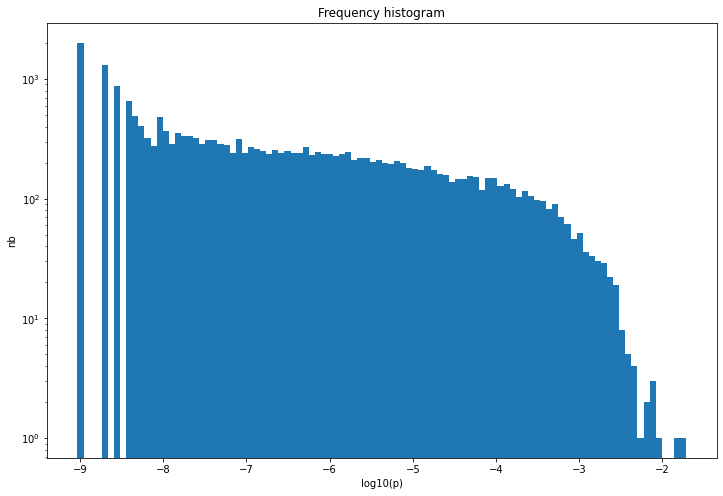

In [92]:
plt.title('Frequency histogram')
plt.xlabel('log10(p)')
plt.ylabel('nb')
_ = plt.hist(char_log10proba_list_sorted, log=True, bins=100)


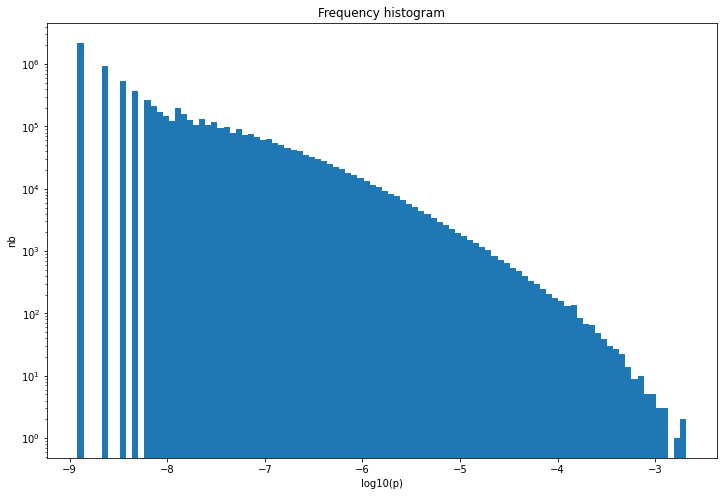

In [93]:
plt.title('Frequency histogram')
plt.xlabel('log10(p)')
plt.ylabel('nb')
_ = plt.hist(couple_log10proba_list_sorted, log=True, bins=100)


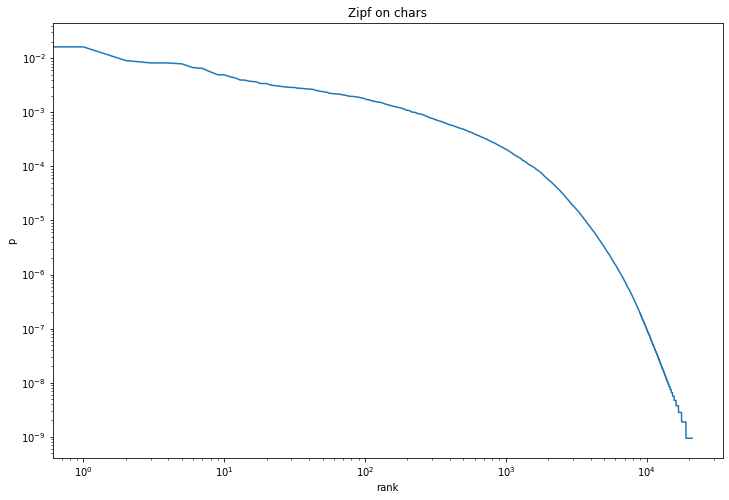

In [95]:
plt.title('Zipf on chars')
plt.xlabel('rank')
plt.ylabel('p')
_ = plt.loglog(char_proba_list_sorted)


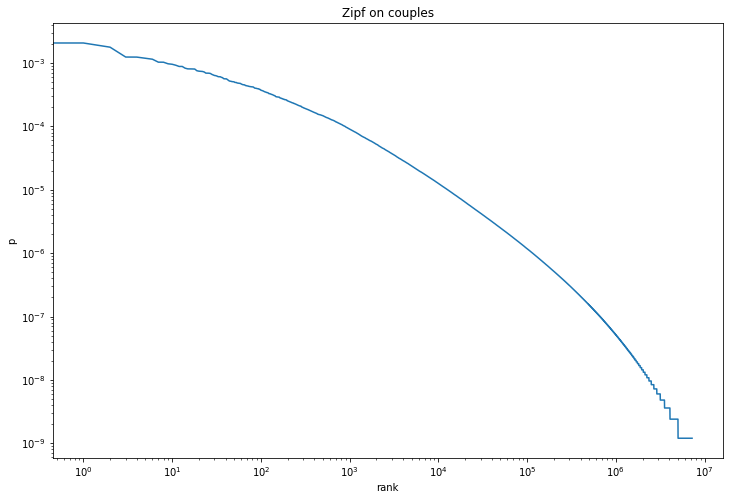

In [96]:
plt.title('Zipf on couples')
plt.xlabel('rank')
plt.ylabel('p')
_ = plt.loglog(couple_proba_list_sorted)


# Deviation from independance

In [120]:
dependance_dict = {
    couple: p_couple / (char_proba_sorted[couple[0]] * char_proba_sorted[couple[1]])
    for couple, p_couple in couple_proba_sorted.items()
}

In [99]:
dependance = [
    p_couple / (char_proba_sorted[couple[0]] * char_proba_sorted[couple[1]])
    for couple, p_couple in couple_proba_sorted.items()
]

In [105]:
dependance_log10 = [math.log10(dep) for dep in dependance]

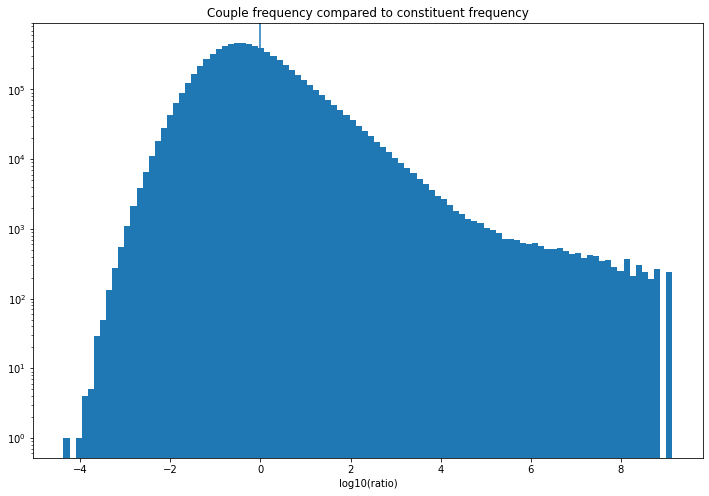

In [106]:
plt.title('Couple frequency compared to constituent frequency')
plt.xlabel('log10(ratio)')
_ = plt.hist(dependance_log10, log=True, bins=100)
_ = plt.axvline(x=0.0)

# Detect 2-char words

In [109]:
word_couple_set = defaultdict(set)

for couple, couple_proba in couple_proba_sorted.items():
    char1, char2 = couple
    word_couple_set[char1].add(couple)
    word_couple_set[char2].add(couple)


In [164]:
use_fraction = {
    couple: (couple_counter[couple]/char_counter[couple[0]], couple_counter[couple]/char_counter[couple[1]])
    for couple in couple_proba_sorted.keys()
}

In [165]:
use_fraction[('屳', '定')]

(0.4, 6.443317651372056e-07)

In [172]:
use_fraction[('决', '定')]

(0.29158977303277606, 0.02061603915733003)

In [168]:
min_use_fraction = [
    min(pair)
    for pair in use_fraction.values()
]


In [174]:
min_use_fraction_log10 = [
    math.log10(fraction)
    for fraction in min_use_fraction
]


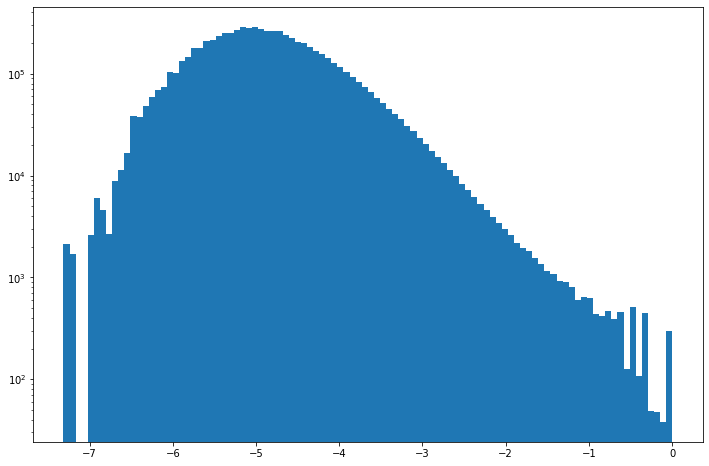

In [175]:
_ = plt.hist(min_use_fraction_log10, bins=100, log=True)

In [218]:
words = [
    couple
    for couple in couple_proba_sorted.keys()
    if (
        min(use_fraction[couple]) >= 0.01 and 
        dependance_dict[couple] >= 5 and
        couple_proba_sorted[couple] >= 0.000001
    )
]
len(words), len(couple_proba_sorted)

(10987, 7214055)

In [219]:
word_set = set(words)
word_ranks = {
    word: rank
    for rank, word in enumerate(words)
}

In [220]:
for rank, word in enumerate(words):
    print('{}\t{:10.4f}\t{}'.format(
        ''.join(word),
        math.log10(couple_proba_sorted[word]),
        word_ranks[word]
    ))

定向	   -2.6824	0
重定	   -2.6840	1
中国	   -2.7501	2
香港	   -2.9057	3
日本	   -2.9066	4
行星	   -2.9249	5
小行	   -2.9400	6
公司	   -2.9865	7
人民	   -2.9873	8
足球	   -3.0121	9
使用	   -3.0195	10
電視	   -3.0350	11
行政	   -3.0542	12
世界	   -3.0542	13
研究	   -3.0813	14
第一	   -3.0922	15
人口	   -3.0925	16
来源	   -3.0938	17
的一	   -3.0952	18
政府	   -3.1215	19
美國	   -3.1284	20
参考	   -3.1318	21
一个	   -3.1335	22
列表	   -3.1417	23
台灣	   -3.1596	24
留言	   -3.1606	25
作品	   -3.1607	26
个来	   -3.1649	27
大学	   -3.1787	28
可以	   -3.1880	29
大學	   -3.1966	30
電影	   -3.1995	31
運動	   -3.2059	32
第二	   -3.2154	33
共和	   -3.2159	34
中國	   -3.2175	35
美国	   -3.2267	36
人物	   -3.2308	37
車站	   -3.2461	38
国家	   -3.2492	39
代表	   -3.2501	40
其他	   -3.2504	41
一個	   -3.2607	42
建立	   -3.2723	43
公里	   -3.2823	44
考文	   -3.2866	45
中心	   -3.2879	46
政治	   -3.2927	47
页面	   -3.2936	48
參考	   -3.2956	49
國家	   -3.2978	50
中央	   -3.3061	51
文化	   -3.3076	52
條目	   -3.3077	53
政区	   -3.3151	54
中華	   -3.3175	55
向到	   -3.3183	56
北京	   -3.3195	57
管理	   -3.3223	58
条目	   -

淺藍	   -4.5391	3052
身高	   -4.5393	3053
田村	   -4.5393	3054
令时	   -4.5394	3055
承認	   -4.5395	3056
依然	   -4.5395	3057
屆金	   -4.5399	3058
对手	   -4.5400	3059
高山	   -4.5401	3060
季世	   -4.5403	3061
給予	   -4.5404	3062
穆罕	   -4.5404	3063
倫比	   -4.5404	3064
澎湖	   -4.5406	3065
創辦	   -4.5407	3066
全域	   -4.5407	3067
工廠	   -4.5408	3068
後期	   -4.5413	3069
太后	   -4.5414	3070
美麗	   -4.5415	3071
顧問	   -4.5416	3072
區索	   -4.5416	3073
列入	   -4.5418	3074
开通	   -4.5419	3075
打擊	   -4.5420	3076
手機	   -4.5420	3077
莱茵	   -4.5422	3078
此時	   -4.5423	3079
知府	   -4.5424	3080
化石	   -4.5426	3081
偵探	   -4.5426	3082
智慧	   -4.5427	3083
金剛	   -4.5428	3084
度尼	   -4.5432	3085
神話	   -4.5434	3086
曾经	   -4.5440	3087
共識	   -4.5442	3088
起點	   -4.5442	3089
闻网	   -4.5443	3090
商店	   -4.5444	3091
竞技	   -4.5445	3092
轉移	   -4.5451	3093
金属	   -4.5451	3094
考慮	   -4.5455	3095
埃爾	   -4.5455	3096
蒂芬	   -4.5456	3097
花园	   -4.5458	3098
元前	   -4.5460	3099
病例	   -4.5461	3100
務所	   -4.5462	3101
巴尼	   -4.5462	3102
源自	   -4.5463	3103
亞足	   -4.546

導彈	   -5.0321	6035
屋苑	   -5.0321	6036
頭角	   -5.0325	6037
嘉宾	   -5.0326	6038
姊姊	   -5.0326	6039
泰坦	   -5.0327	6040
缺陷	   -5.0330	6041
麒麟	   -5.0330	6042
甲午	   -5.0331	6043
邯郸	   -5.0332	6044
仁慕	   -5.0333	6045
遺跡	   -5.0337	6046
擴張	   -5.0338	6047
深刻	   -5.0339	6048
少卿	   -5.0340	6049
櫻井	   -5.0341	6050
游景	   -5.0342	6051
密碼	   -5.0343	6052
俄勒	   -5.0344	6053
寬備	   -5.0344	6054
廠商	   -5.0348	6055
野战	   -5.0348	6056
证实	   -5.0349	6057
漢族	   -5.0350	6058
卢森	   -5.0351	6059
纵队	   -5.0353	6060
旅館	   -5.0357	6061
陰謀	   -5.0358	6062
游客	   -5.0363	6063
災難	   -5.0364	6064
守備	   -5.0367	6065
筑师	   -5.0367	6066
粮食	   -5.0370	6067
攜帶	   -5.0372	6068
彈匣	   -5.0372	6069
剛果	   -5.0373	6070
读书	   -5.0373	6071
初始	   -5.0374	6072
渦輪	   -5.0375	6073
叛亂	   -5.0378	6074
载火	   -5.0381	6075
丁丑	   -5.0381	6076
条例	   -5.0382	6077
武警	   -5.0384	6078
彈藥	   -5.0385	6079
称呼	   -5.0388	6080
战场	   -5.0389	6081
披露	   -5.0389	6082
摩泽	   -5.0389	6083
實質	   -5.0390	6084
谋杀	   -5.0390	6085
只限	   -5.0391	6086
未婚	   -5.039

誤差	   -5.5049	8752
右丞	   -5.5049	8753
麗娜	   -5.5049	8754
苑裡	   -5.5051	8755
勘探	   -5.5053	8756
滋味	   -5.5053	8757
競逐	   -5.5056	8758
温暖	   -5.5058	8759
杰斐	   -5.5059	8760
殊榮	   -5.5063	8761
採檢	   -5.5066	8762
牽涉	   -5.5068	8763
泊闊	   -5.5070	8764
稻埕	   -5.5071	8765
袋鼠	   -5.5071	8766
夠確	   -5.5073	8767
骨干	   -5.5075	8768
輝煌	   -5.5076	8769
逍遙	   -5.5076	8770
违背	   -5.5078	8771
藍鳥	   -5.5081	8772
棕榈	   -5.5085	8773
肥皂	   -5.5085	8774
優霸	   -5.5086	8775
核试	   -5.5088	8776
靜脈	   -5.5088	8777
驚訝	   -5.5090	8778
爆裂	   -5.5090	8779
誹謗	   -5.5093	8780
答腊	   -5.5095	8781
隱私	   -5.5098	8782
聘请	   -5.5102	8783
汕尾	   -5.5102	8784
溪橋	   -5.5103	8785
駐紮	   -5.5105	8786
咖哩	   -5.5107	8787
亭侯	   -5.5107	8788
斗恶	   -5.5110	8789
征伐	   -5.5113	8790
蜻蜓	   -5.5115	8791
换符	   -5.5117	8792
徐汇	   -5.5120	8793
贩卖	   -5.5120	8794
毕竟	   -5.5122	8795
仔细	   -5.5124	8796
玲玲	   -5.5124	8797
转载	   -5.5125	8798
碌豬	   -5.5127	8799
憧憬	   -5.5129	8800
謹慎	   -5.5130	8801
準决	   -5.5130	8802
競走	   -5.5134	8803
曹丕	   -5.513

# Generate vocabulary list by char

In [156]:
def study_char(char):
    given_char_couples = sorted(word_couple_set[char], key=lambda couple: -couple_proba_sorted[couple])
    given_char_dependance = [
        dependance_dict[couple]
        for couple in given_char_couples
    ]
    given_char_couple_proba = [
        couple_proba_sorted[couple]
        for couple in given_char_couples
    ]
    given_char_fraction = [
        couple_counter[couple] / char_counter[char]
        for couple in given_char_couples
    ]
    return sorted(
        zip(given_char_couples, given_char_dependance, given_char_couple_proba, given_char_fraction),
        key=lambda item: -item[1],
    )

定_zip = study_char('定')
定_zip

定_dependance = list(zip(*定_zip))[1]
_ = plt.hist([math.log10(ratio) for ratio in 定_dependance], bins=100)

定_fraction = list(zip(*定_zip))[3]
_ = plt.hist([math.log10(fraction) for fraction in 定_fraction], bins=100, log=True)

In [221]:
interesting_chars = sorted(
    set([
        char
        for char, p in char_proba_sorted.items()
        if p >= 0.000001
    ] + [
        char
        for word in words
        for char in word
    ]),
    key = lambda char: -char_proba_sorted[char],
)

In [222]:
len(interesting_chars)

6585

In [223]:
for char in interesting_chars:
    print('word\tlog10(p)\trank\tdependance\tuse fraction\tother use fraction')
    print('{}\t{:10.4f}'.format(
        char,
        math.log10(char_proba_sorted[char]),
    ))

    given_char_couples = sorted(
        word_couple_set[char],
        key=lambda couple: -couple_proba_sorted[couple],
    )
    
    for couple in given_char_couples:
        given_couple_proba = couple_proba_sorted[couple]
        given_couple_dependance = dependance_dict[couple]
        given_couple_use_fraction = use_fraction[couple]
        given_couple_char_use_fraction = couple_counter[couple]/char_counter[char]
        other_chars = set(couple) - set([char])
        other_char = list(other_chars)[0] if other_chars else char
        given_couple_other_char_use_fraction = couple_counter[couple]/char_counter[other_char]
        
        if couple in word_set:
            print('{}\t{:10.4f}\t{}\t{:10.4f}\t{:10.4f}\t{:10.4f}'.format(
                ''.join(couple),
                math.log10(couple_proba_sorted[couple]),
                word_ranks[couple],
                given_couple_dependance,
                given_couple_char_use_fraction,
                given_couple_other_char_use_fraction,
            ))

    print()

word	log10(p)	rank	dependance	use fraction	other use fraction
的	   -1.7153
的一	   -3.0952	18	    6.2061	    0.0325	    0.0931
的新	   -3.4462	107	    6.4638	    0.0145	    0.0969
他的	   -3.5684	176	    7.1754	    0.0109	    0.1076

word	log10(p)	rank	dependance	use fraction	other use fraction
年	   -1.7890
年代	   -3.4279	99	   11.8942	    0.0179	    0.1505
年夏	   -3.4316	100	   36.0066	    0.0177	    0.4557
年度	   -3.6020	202	    9.3540	    0.0120	    0.1184

word	log10(p)	rank	dependance	use fraction	other use fraction
日	   -2.0418
日本	   -2.9066	4	   47.5457	    0.1063	    0.3362
日期	   -3.4157	95	   26.9872	    0.0329	    0.1908
日報	   -3.8505	508	   23.4357	    0.0121	    0.1657

word	log10(p)	rank	dependance	use fraction	other use fraction
月	   -2.0856
月台	   -3.8455	500	    7.6920	    0.0135	    0.0492

word	log10(p)	rank	dependance	use fraction	other use fraction
中	   -2.0865
中国	   -2.7501	2	   43.7956	    0.1689	    0.2794
中國	   -3.2175	35	   16.2713	    0.0576	    0.1038
中心	   -3.2879	46	


word	log10(p)	rank	dependance	use fraction	other use fraction
行	   -2.4021
行星	   -2.9249	5	  153.8379	    0.2337	    0.4745
小行	   -2.9400	6	   95.5863	    0.2256	    0.2948
行政	   -3.0542	12	   90.6615	    0.1735	    0.2796
進行	   -3.6112	209	   85.8848	    0.0481	    0.2649
进行	   -3.6767	269	  102.0066	    0.0414	    0.3146
發行	   -3.7420	338	   38.2933	    0.0356	    0.1181
级行	   -3.8595	523	   58.9774	    0.0272	    0.1819
流行	   -3.9105	633	   43.7484	    0.0241	    0.1349
舉行	   -3.9759	770	   64.0996	    0.0208	    0.1977
行動	   -3.9848	785	   15.8205	    0.0204	    0.0488
銀行	   -4.0472	937	  102.9144	    0.0176	    0.3174
執行	   -4.1054	1096	  141.7141	    0.0154	    0.4371
银行	   -4.1149	1122	  147.8489	    0.0151	    0.4560
执行	   -4.1386	1182	  188.2371	    0.0143	    0.5805
发行	   -4.1438	1201	   20.0033	    0.0141	    0.0617
行為	   -4.1597	1253	    5.5409	    0.0136	    0.0171
自行	   -4.1692	1289	    8.6708	    0.0133	    0.0267
行了	   -4.1826	1336	    6.8225	    0.0129	    0.0210
举行	 


word	log10(p)	rank	dependance	use fraction	other use fraction
部	   -2.4886
外部	   -3.3434	64	   85.1352	    0.1088	    0.2152
部分	   -3.3609	70	   52.8433	    0.1045	    0.1336
部連	   -3.5132	140	  141.8701	    0.0736	    0.3586
乐部	   -3.5807	189	  152.3340	    0.0630	    0.3850
部链	   -3.7164	308	  197.7037	    0.0461	    0.4997
一部	   -3.7812	388	    7.5881	    0.0397	    0.0192
樂部	   -3.7821	391	   53.9780	    0.0396	    0.1364
南部	   -3.8679	545	   17.4255	    0.0325	    0.0440
中部	   -3.8722	552	    5.0450	    0.0322	    0.0128
北部	   -3.8762	560	   18.6354	    0.0319	    0.0471
全部	   -3.9385	687	   23.0486	    0.0276	    0.0583
部长	   -4.0145	854	   31.2844	    0.0232	    0.0791
西部	   -4.0608	975	    9.5997	    0.0208	    0.0243
部份	   -4.1112	1109	   48.6383	    0.0186	    0.1229
部隊	   -4.1542	1233	   26.9484	    0.0168	    0.0681
内部	   -4.1744	1310	   20.7472	    0.0161	    0.0524
部队	   -4.1841	1343	   43.7059	    0.0157	    0.1105
內部	   -4.2078	1423	   21.2302	    0.0149	    0.0537
政部	

重定	   -2.6840	1	  245.2841	    0.5551	    0.5544
重要	   -3.6607	253	   51.8384	    0.0586	    0.1172
文重	   -3.7437	341	   17.0151	    0.0484	    0.0385
重重	   -3.7606	360	   20.5906	    0.0465	    0.0465
号重	   -3.8236	464	   62.4007	    0.0403	    0.1410
重新	   -3.8535	511	   16.7858	    0.0376	    0.0379
双重	   -3.8598	524	  174.3010	    0.0370	    0.3940
繁重	   -3.9588	728	  188.1031	    0.0295	    0.4251
重庆	   -4.0956	1072	  170.3801	    0.0215	    0.3851
重点	   -4.2555	1622	   51.2031	    0.0149	    0.1157
重建	   -4.2731	1685	    9.8404	    0.0143	    0.0222
已重	   -4.2884	1757	   15.9834	    0.0138	    0.0361
嚴重	   -4.3073	1833	  163.8245	    0.0132	    0.3703
重播	   -4.3285	1923	   23.4577	    0.0126	    0.0530
严重	   -4.3871	2232	  152.6438	    0.0110	    0.3450
動重	   -4.3952	2273	    8.3903	    0.0108	    0.0190
雙重	   -4.4184	2392	   40.5596	    0.0102	    0.0917

word	log10(p)	rank	dependance	use fraction	other use fraction
新	   -2.5413
的新	   -3.4462	107	    6.4638	    0.0969	    0.0145


word	log10(p)	rank	dependance	use fraction	other use fraction
生	   -2.5655
出生	   -3.5157	142	   38.4425	    0.0873	    0.0814
生活	   -3.6372	231	  154.0703	    0.0660	    0.3262
生物	   -3.7016	293	   36.5752	    0.0569	    0.0774
學生	   -3.7648	367	   29.8010	    0.0492	    0.0631
發生	   -3.9159	643	   37.3689	    0.0347	    0.0791
生平	   -3.9290	664	   25.2261	    0.0337	    0.0534
先生	   -3.9974	822	   76.9498	    0.0288	    0.1629
学生	   -4.0131	849	   14.9579	    0.0278	    0.0317
发生	   -4.0214	872	   38.6289	    0.0273	    0.0818
書生	   -4.0703	998	   49.7157	    0.0244	    0.1053
生产	   -4.1016	1088	   66.6087	    0.0227	    0.1410
生涯	   -4.1065	1099	  417.8655	    0.0224	    0.8847
生地	   -4.1270	1156	    7.2880	    0.0214	    0.0154
產生	   -4.1401	1189	   74.3180	    0.0207	    0.1573
生命	   -4.1551	1235	   44.3561	    0.0200	    0.0939
生產	   -4.1636	1271	   70.4109	    0.0196	    0.1491
生于	   -4.2157	1451	   14.1657	    0.0174	    0.0300
产生	   -4.2379	1545	   48.6630	    0.0166	    0.103


word	log10(p)	rank	dependance	use fraction	other use fraction
政	   -2.6094
行政	   -3.0542	12	   90.6615	    0.2796	    0.1735
政府	   -3.1215	19	  302.5642	    0.2395	    0.5790
政治	   -3.2927	47	  180.6829	    0.1615	    0.3457
政区	   -3.3151	54	   99.5364	    0.1533	    0.1905
民政	   -3.7349	328	   27.8139	    0.0583	    0.0532
政區	   -3.7792	384	   38.5421	    0.0527	    0.0738
国政	   -3.9406	692	    9.4158	    0.0363	    0.0180
市政	   -3.9670	751	   14.0814	    0.0342	    0.0269
政策	   -4.0029	832	  245.8107	    0.0315	    0.4704
政黨	   -4.1989	1388	   64.5323	    0.0200	    0.1235
政协	   -4.2083	1425	   81.6660	    0.0196	    0.1563
國政	   -4.2275	1496	    5.3008	    0.0188	    0.0101
政部	   -4.2333	1528	    7.3245	    0.0185	    0.0140
政院	   -4.3055	1825	   14.3213	    0.0157	    0.0274
政单	   -4.3761	2168	   41.2947	    0.0133	    0.0790
省政	   -4.4035	2319	   11.1342	    0.0125	    0.0213
政党	   -4.4131	2358	   32.3323	    0.0122	    0.0619
政权	   -4.4569	2610	   42.7847	    0.0111	    0.0819




word	log10(p)	rank	dependance	use fraction	other use fraction
法	   -2.6486
法国	   -3.5336	151	   26.3072	    0.1015	    0.0460
法院	   -3.8127	439	   48.7480	    0.0534	    0.0852
立法	   -3.8240	466	   36.6997	    0.0520	    0.0642
法國	   -3.8380	491	   14.2250	    0.0503	    0.0249
方法	   -3.8994	607	   25.5791	    0.0437	    0.0447
法律	   -3.9140	638	  184.8025	    0.0423	    0.3231
無法	   -3.9690	757	   63.1516	    0.0372	    0.1104
魔法	   -4.0258	879	  145.6798	    0.0327	    0.2547
司法	   -4.2682	1669	   19.6941	    0.0187	    0.0344
法委	   -4.2710	1678	   25.1418	    0.0186	    0.0440
无法	   -4.2808	1716	   62.0205	    0.0182	    0.1084
法蘭	   -4.3336	1948	   28.1425	    0.0161	    0.0492
法會	   -4.3596	2088	    7.8618	    0.0151	    0.0137
民法	   -4.3773	2178	    6.9355	    0.0145	    0.0121
法官	   -4.3989	2291	   22.5407	    0.0138	    0.0394
法案	   -4.4515	2575	   30.0208	    0.0123	    0.0525
法兰	   -4.4726	2689	   27.8657	    0.0117	    0.0487
宪法	   -4.4856	2757	  275.0300	    0.0113	    0.4


word	log10(p)	rank	dependance	use fraction	other use fraction
學	   -2.6735
大學	   -3.1966	30	   46.1082	    0.2334	    0.0761
學校	   -3.5108	137	  156.0470	    0.1132	    0.2577
學院	   -3.7108	304	   65.2659	    0.0714	    0.1078
學生	   -3.7648	367	   29.8010	    0.0631	    0.0492
中學	   -3.8009	418	    9.0994	    0.0581	    0.0150
科學	   -3.8315	480	   32.6110	    0.0541	    0.0538
文學	   -3.9902	801	   13.2028	    0.0375	    0.0218
小學	   -3.9975	823	   15.6394	    0.0369	    0.0258
學家	   -4.0096	842	   16.6235	    0.0359	    0.0274
理學	   -4.1846	1344	   16.1423	    0.0240	    0.0267
醫學	   -4.2622	1641	  104.3064	    0.0201	    0.1722
學習	   -4.3140	1870	  178.6916	    0.0178	    0.2951
學系	   -4.3181	1878	   20.7434	    0.0176	    0.0343
化學	   -4.3414	1984	   16.0406	    0.0167	    0.0265
學會	   -4.3495	2036	    8.5205	    0.0164	    0.0141
學者	   -4.3685	2124	   13.3494	    0.0157	    0.0220
學園	   -4.4501	2562	   38.1273	    0.0130	    0.0630
哲學	   -4.4642	2650	  115.7665	    0.0126	    0.191


word	log10(p)	rank	dependance	use fraction	other use fraction
下	   -2.7037
以下	   -3.7006	292	   34.0727	    0.0784	    0.0525
下辖	   -3.8996	608	  378.6359	    0.0496	    0.5832
地下	   -3.9138	637	   16.3684	    0.0480	    0.0252
下一	   -4.0196	868	    7.1922	    0.0376	    0.0111
天下	   -4.2518	1606	   12.9746	    0.0220	    0.0200
上下	   -4.2737	1687	    8.9988	    0.0210	    0.0139
下午	   -4.2775	1707	  222.2298	    0.0208	    0.3423
旗下	   -4.3298	1932	  104.2495	    0.0184	    0.1606
如下	   -4.3418	1985	   26.6524	    0.0179	    0.0410
之下	   -4.3529	2057	    8.4592	    0.0175	    0.0130
留下	   -4.4028	2313	   21.3313	    0.0156	    0.0329
下車	   -4.4581	2616	   12.9367	    0.0137	    0.0199
況下	   -4.4989	2828	  128.0413	    0.0125	    0.1972
况下	   -4.5201	2959	  149.0422	    0.0119	    0.2295
下列	   -4.5659	3226	    9.0997	    0.0107	    0.0140
閣下	   -4.5875	3354	  130.2961	    0.0102	    0.2007

word	log10(p)	rank	dependance	use fraction	other use fraction
目	   -2.7038
條目	   -3.3077	53	  3


word	log10(p)	rank	dependance	use fraction	other use fraction
建	   -2.7290
建立	   -3.2723	43	  157.2727	    0.2228	    0.2285
建筑	   -3.6332	229	  601.7846	    0.0971	    0.8745
建築	   -3.7517	350	  616.3906	    0.0739	    0.8957
福建	   -3.9308	670	   82.2231	    0.0489	    0.1195
建设	   -4.0054	837	  118.4869	    0.0412	    0.1722
创建	   -4.0183	865	  217.8363	    0.0400	    0.3165
建制	   -4.0700	997	   49.7444	    0.0355	    0.0723
建議	   -4.1581	1246	   62.1362	    0.0290	    0.0903
建造	   -4.2269	1491	   63.5461	    0.0247	    0.0923
創建	   -4.2461	1576	   94.7715	    0.0237	    0.1377
非建	   -4.2514	1604	   38.8481	    0.0234	    0.0565
重建	   -4.2731	1685	    9.8404	    0.0222	    0.0143
建成	   -4.3224	1901	    9.0832	    0.0199	    0.0132
建設	   -4.3449	2007	   41.5032	    0.0189	    0.0603
建省	   -4.3458	2012	   16.7470	    0.0188	    0.0243
興建	   -4.3486	2029	   96.9935	    0.0187	    0.1409
始建	   -4.3502	2039	   41.1385	    0.0186	    0.0598
建议	   -4.3510	2046	   57.3163	    0.0186	    0.0


word	log10(p)	rank	dependance	use fraction	other use fraction
後	   -2.7667
最後	   -3.6962	287	   73.2554	    0.0916	    0.0976
之後	   -3.7222	316	   41.7798	    0.0863	    0.0557
後來	   -3.8827	570	   70.6820	    0.0596	    0.0942
其後	   -4.2491	1593	   17.1430	    0.0256	    0.0228
以後	   -4.3949	2269	    7.9623	    0.0183	    0.0106
然後	   -4.4243	2419	   32.9460	    0.0171	    0.0439
隨後	   -4.4271	2437	  137.0538	    0.0170	    0.1826
戰後	   -4.4472	2541	   22.6050	    0.0162	    0.0301
後被	   -4.4511	2573	   13.2333	    0.0161	    0.0176
後期	   -4.5413	3069	   10.7226	    0.0131	    0.0143
後衛	   -4.5804	3307	   54.5043	    0.0120	    0.0726
先後	   -4.5994	3418	   30.5816	    0.0114	    0.0407
束後	   -4.6537	3738	   80.3449	    0.0101	    0.1070

word	log10(p)	rank	dependance	use fraction	other use fraction
多	   -2.7672
許多	   -3.9954	818	  238.2018	    0.0460	    0.3170
很多	   -4.0391	909	  158.6088	    0.0416	    0.2111
许多	   -4.1620	1260	  225.7879	    0.0314	    0.3005
多次	   -4.1683	1284	  


word	log10(p)	rank	dependance	use fraction	other use fraction
安	   -2.7997
安全	   -3.8499	506	   57.8598	    0.0694	    0.0714
安德	   -3.9937	811	   27.1948	    0.0498	    0.0336
安徽	   -4.1086	1105	  394.1940	    0.0382	    0.4867
安納	   -4.1710	1299	  105.4616	    0.0331	    0.1302
地安	   -4.2060	1416	   10.4164	    0.0305	    0.0129
西安	   -4.2286	1501	   13.3520	    0.0290	    0.0165
安娜	   -4.3481	2025	  120.2512	    0.0220	    0.1485
安排	   -4.3802	2195	   67.0071	    0.0205	    0.0827
蒂安	   -4.5017	2835	   61.2972	    0.0155	    0.0757
保安	   -4.5134	2920	   17.6755	    0.0151	    0.0218
安東	   -4.5469	3109	   13.7019	    0.0139	    0.0169
利安	   -4.5501	3122	    8.4678	    0.0138	    0.0105
安东	   -4.5649	3222	   17.1130	    0.0134	    0.0211
平安	   -4.5756	3280	    9.7611	    0.0130	    0.0121
安县	   -4.6520	3728	   15.1349	    0.0109	    0.0187
安裝	   -4.6577	3758	   56.8792	    0.0108	    0.0702
安妮	   -4.6684	3828	  115.4434	    0.0105	    0.1425

word	log10(p)	rank	dependance	use fractio

基金	   -4.0190	866	   33.2684	    0.0492	    0.0392
金融	   -4.1636	1270	  433.1366	    0.0353	    0.5104
金曲	   -4.1906	1358	   42.6257	    0.0332	    0.0502
金山	   -4.2905	1770	   15.3356	    0.0263	    0.0181
金牌	   -4.2906	1771	   97.8769	    0.0263	    0.1153
黃金	   -4.3124	1864	   80.3337	    0.0251	    0.0947
金榜	   -4.3206	1891	  137.5821	    0.0246	    0.1621
試金	   -4.3941	2266	  125.9690	    0.0208	    0.1484
金會	   -4.3964	2278	   10.7183	    0.0207	    0.0126
金像	   -4.4518	2577	   49.8976	    0.0182	    0.0588
金屬	   -4.4558	2605	   45.0321	    0.0180	    0.0531
金鐘	   -4.4975	2819	  161.2803	    0.0164	    0.1900
屆金	   -4.5399	3058	   68.5298	    0.0148	    0.0807
金剛	   -4.5428	3084	  220.4117	    0.0147	    0.2597
金属	   -4.5451	3094	   37.3237	    0.0147	    0.0440
金馬	   -4.5739	3273	   17.4973	    0.0137	    0.0206
影金	   -4.6415	3655	   10.8617	    0.0117	    0.0128
金会	   -4.6527	3734	    8.4895	    0.0114	    0.0100
黄金	   -4.6751	3873	   51.6356	    0.0109	    0.0608
歌金	   -4.7084


word	log10(p)	rank	dependance	use fraction	other use fraction
女	   -2.8474
女子	   -3.5318	146	   79.7120	    0.1610	    0.0882
女性	   -3.7876	399	  104.8833	    0.0893	    0.1160
少女	   -3.8738	555	  146.0544	    0.0732	    0.1616
女主	   -4.2523	1609	   14.3806	    0.0306	    0.0159
女演	   -4.2741	1689	   29.2931	    0.0291	    0.0324
女兒	   -4.3311	1941	  115.5444	    0.0256	    0.1278
女孩	   -4.3407	1979	  264.1476	    0.0250	    0.2923
女王	   -4.3413	1983	   20.6170	    0.0250	    0.0228
佳女	   -4.3581	2079	   72.9121	    0.0240	    0.0807
女神	   -4.4116	2351	   34.1844	    0.0212	    0.0378
男女	   -4.4886	2780	   32.6635	    0.0178	    0.0361
女歌	   -4.5594	3193	   26.3528	    0.0151	    0.0292
女儿	   -4.5988	3417	  123.4464	    0.0138	    0.1366
女友	   -4.6512	3721	   34.1611	    0.0122	    0.0378
女配	   -4.6682	3827	   33.6733	    0.0118	    0.0373
魔女	   -4.6939	3987	   49.4341	    0.0111	    0.0547
妇女	   -4.7081	4081	  373.2219	    0.0107	    0.4129

word	log10(p)	rank	dependance	use fraction


word	log10(p)	rank	dependance	use fraction	other use fraction
使	   -2.8693
使用	   -3.0195	10	  262.9286	    0.5508	    0.2766
大使	   -3.9047	619	   14.1729	    0.0717	    0.0149
使得	   -4.1646	1275	   38.4773	    0.0394	    0.0405
天使	   -4.2327	1523	   19.8459	    0.0337	    0.0209
即使	   -4.3845	2216	   76.1982	    0.0238	    0.0802
度使	   -4.6091	3474	   11.0698	    0.0142	    0.0116
使館	   -4.6799	3902	   45.6528	    0.0120	    0.0480
使馆	   -4.7129	4115	   60.7609	    0.0112	    0.0639
使司	   -4.7166	4131	   11.6550	    0.0111	    0.0123

word	log10(p)	rank	dependance	use fraction	other use fraction
化	   -2.8731
文化	   -3.3076	52	  100.6760	    0.2863	    0.1050
化学	   -4.0424	922	   28.3938	    0.0527	    0.0296
变化	   -4.1588	1250	  213.4422	    0.0403	    0.2226
氧化	   -4.2464	1577	  570.6651	    0.0330	    0.5950
化學	   -4.3414	1984	   16.0406	    0.0265	    0.0167
彰化	   -4.3448	2005	  490.9289	    0.0263	    0.5119
變化	   -4.3539	2063	   90.5926	    0.0257	    0.0945
化合	   -4.3680	2123	   


word	log10(p)	rank	dependance	use fraction	other use fraction
次	   -2.8959
一次	   -3.6409	237	   26.7740	    0.1400	    0.0265
首次	   -3.9063	622	  115.8994	    0.0760	    0.1147
二次	   -3.9440	702	   49.1018	    0.0697	    0.0486
再次	   -4.0346	896	  167.4713	    0.0566	    0.1657
多次	   -4.1683	1284	   31.2415	    0.0416	    0.0309
次世	   -4.2133	1442	   25.8919	    0.0375	    0.0256
三次	   -4.3791	2188	   15.9297	    0.0256	    0.0158
班次	   -4.3894	2247	   64.9867	    0.0250	    0.0643
檔次	   -4.5071	2868	  135.9354	    0.0191	    0.1345
次列	   -4.6028	3438	   13.0101	    0.0153	    0.0129
次數	   -4.6056	3457	   25.0227	    0.0152	    0.0248
此次	   -4.6087	3471	   16.1522	    0.0151	    0.0160
這次	   -4.6428	3658	   24.0677	    0.0139	    0.0238
次全	   -4.7013	4038	   10.1638	    0.0122	    0.0101
每次	   -4.7203	4156	   35.2142	    0.0117	    0.0348
次郎	   -4.7285	4204	   59.0895	    0.0114	    0.0585
这次	   -4.7397	4275	   20.2800	    0.0112	    0.0201
四次	   -4.7513	4340	   11.0561	    0.0109	   


word	log10(p)	rank	dependance	use fraction	other use fraction
布	   -2.9157
分布	   -3.8940	591	   41.3932	    0.0818	    0.0391
宣布	   -3.9202	650	  267.8027	    0.0770	    0.2532
布拉	   -4.0687	994	   34.7941	    0.0547	    0.0329
公布	   -4.1466	1210	   17.2219	    0.0457	    0.0163
发布	   -4.1556	1237	   63.5129	    0.0448	    0.0600
布里	   -4.1906	1359	   26.1854	    0.0413	    0.0248
布魯	   -4.3879	2238	  145.6603	    0.0262	    0.1377
布朗	   -4.4034	2316	  112.7439	    0.0253	    0.1066
布雷	   -4.4084	2338	   54.6014	    0.0250	    0.0516
布于	   -4.4162	2379	   19.9943	    0.0246	    0.0189
布尔	   -4.4368	2487	   15.7460	    0.0234	    0.0149
布鲁	   -4.4474	2543	  113.6841	    0.0229	    0.1075
布萊	   -4.4839	2750	  105.7920	    0.0210	    0.1000
布於	   -4.5117	2906	   11.6372	    0.0197	    0.0110
阿布	   -4.5832	3322	   16.4704	    0.0167	    0.0156
布莱	   -4.5934	3387	   61.7543	    0.0164	    0.0584
發布	   -4.6057	3458	   17.0972	    0.0159	    0.0162
巴布	   -4.6627	3787	   13.5048	    0.0139	  


word	log10(p)	rank	dependance	use fraction	other use fraction
都	   -2.9391
京都	   -3.8094	430	  140.6178	    0.1049	    0.1260
都是	   -3.8598	525	   24.2777	    0.0934	    0.0217
都市	   -3.9982	825	   27.9980	    0.0680	    0.0251
成都	   -4.1252	1151	   23.2022	    0.0507	    0.0208
首都	   -4.1297	1165	   76.5435	    0.0502	    0.0686
都會	   -4.2099	1427	   21.6608	    0.0417	    0.0194
都有	   -4.2356	1538	   11.6704	    0.0393	    0.0105
都不	   -4.3966	2279	   11.3718	    0.0271	    0.0102
都統	   -4.5488	3116	   41.0197	    0.0191	    0.0367
都可	   -4.6058	3459	   12.5519	    0.0168	    0.0112
都督	   -4.6188	3520	   75.8575	    0.0163	    0.0679
都府	   -4.7827	4495	   14.1004	    0.0112	    0.0126

word	log10(p)	rank	dependance	use fraction	other use fraction
治	   -2.9401
政治	   -3.2927	47	  180.6829	    0.3457	    0.1615
自治	   -3.6455	242	   99.9316	    0.1534	    0.0893
治人	   -3.8520	509	   15.5405	    0.0954	    0.0139
治区	   -4.0148	855	   42.5520	    0.0656	    0.0380
喬治	   -4.1524	1226	  478

清水	   -4.3766	2171	   45.8599	    0.0300	    0.0390
淡水	   -4.3772	2177	  549.4046	    0.0299	    0.4668
水平	   -4.3900	2249	   21.7442	    0.0291	    0.0185
水库	   -4.3999	2300	  150.8590	    0.0284	    0.1282
水域	   -4.4285	2444	   86.6940	    0.0266	    0.0737
水利	   -4.5504	3125	   12.2981	    0.0201	    0.0104
水晶	   -4.6937	3985	  127.9970	    0.0144	    0.1088
河水	   -4.7420	4286	   18.3648	    0.0129	    0.0156
水系	   -4.7656	4413	   14.3861	    0.0122	    0.0122
深水	   -4.8083	4673	   39.2107	    0.0111	    0.0333
跳水	   -4.8258	4770	  148.8052	    0.0107	    0.1264
洪水	   -4.8461	4886	   75.4912	    0.0102	    0.0641

word	log10(p)	rank	dependance	use fraction	other use fraction
卡	   -2.9627
卡特	   -3.9825	783	   35.9899	    0.0744	    0.0305
斯卡	   -4.0006	828	   23.2338	    0.0713	    0.0197
卡斯	   -4.1044	1094	   18.2974	    0.0562	    0.0155
卡拉	   -4.1935	1373	   29.0862	    0.0458	    0.0247
卡尔	   -4.2254	1487	   28.5476	    0.0425	    0.0242
卡爾	   -4.3589	2081	   27.1830	    0.0313	 

中心	   -3.2879	46	   60.9220	    0.3887	    0.0490
心理	   -4.2628	1645	   27.7031	    0.0412	    0.0223
核心	   -4.2963	1790	  205.2001	    0.0381	    0.1649
心臟	   -4.8435	4870	  750.6217	    0.0108	    0.6032

word	log10(p)	rank	dependance	use fraction	other use fraction
亚	   -2.9875
利亚	   -3.6919	282	   94.1463	    0.1538	    0.0754
尼亚	   -3.7407	336	  129.0753	    0.1374	    0.1034
西亚	   -3.8229	461	   52.3574	    0.1137	    0.0420
亚洲	   -4.0330	893	   95.5861	    0.0701	    0.0766
亚州	   -4.1240	1147	   33.5653	    0.0569	    0.0269
比亚	   -4.2342	1532	   46.5323	    0.0441	    0.0373
里亚	   -4.3634	2103	   20.7522	    0.0328	    0.0166
亚历	   -4.3825	2207	   96.8399	    0.0314	    0.0776
维亚	   -4.3930	2261	   52.2314	    0.0306	    0.0419
亚军	   -4.7900	4550	   15.9064	    0.0123	    0.0127
米亚	   -4.8006	4624	   14.3814	    0.0120	    0.0115
亚运	   -4.8242	4759	   23.1672	    0.0113	    0.0186
迪亚	   -4.8398	4847	   31.3707	    0.0109	    0.0251
蒂亚	   -4.8595	4984	   41.4406	    0.0105	    0


word	log10(p)	rank	dependance	use fraction	other use fraction
军	   -3.0041
军事	   -3.9368	683	   68.6026	    0.0909	    0.0529
放军	   -3.9481	712	  177.1872	    0.0886	    0.1367
冠军	   -4.0496	945	  221.4694	    0.0701	    0.1708
海军	   -4.0883	1048	   41.1029	    0.0641	    0.0317
将军	   -4.2040	1408	   81.4160	    0.0491	    0.0628
陆军	   -4.2919	1777	  227.2475	    0.0401	    0.1753
空军	   -4.3019	1811	   50.1093	    0.0392	    0.0386
军队	   -4.3066	1831	  108.0309	    0.0388	    0.0833
军区	   -4.3367	1961	   23.4977	    0.0362	    0.0181
央军	   -4.6378	3630	   55.0005	    0.0181	    0.0424
军委	   -4.6917	3974	   21.6353	    0.0160	    0.0167
红军	   -4.7592	4384	   85.5606	    0.0137	    0.0660
军陆	   -4.7671	4417	   76.0757	    0.0134	    0.0587
军军	   -4.7807	4484	   16.8810	    0.0130	    0.0130
团军	   -4.7883	4538	   44.2056	    0.0128	    0.0341
亚军	   -4.7900	4550	   15.9064	    0.0127	    0.0123
军官	   -4.8246	4762	   19.1745	    0.0118	    0.0148
军总	   -4.8487	4906	   24.8863	    0.0111	  


word	log10(p)	rank	dependance	use fraction	other use fraction
樂	   -3.0257
音樂	   -3.3637	72	  391.2775	    0.3575	    0.2871
樂部	   -3.7821	391	   53.9780	    0.1364	    0.0396
俱樂	   -3.7857	395	  487.7595	    0.1353	    0.3579
娛樂	   -3.9451	705	 1297.1747	    0.0937	    0.9519
樂團	   -4.1013	1087	  155.0807	    0.0654	    0.1138
樂專	   -4.4444	2522	   74.4701	    0.0297	    0.0546
樂園	   -4.5586	3188	   66.8316	    0.0228	    0.0490
樂器	   -4.6405	3649	   28.2856	    0.0189	    0.0208
快樂	   -4.6481	3702	   76.5157	    0.0186	    0.0561
樂隊	   -4.6645	3801	   28.6624	    0.0179	    0.0210
樂壇	   -4.7498	4331	  402.5753	    0.0147	    0.2954
樂錄	   -4.7907	4554	   40.2844	    0.0134	    0.0296
歡樂	   -4.8101	4685	  115.6566	    0.0128	    0.0849
遊樂	   -4.8166	4723	   43.2828	    0.0126	    0.0318
樂類	   -4.8340	4816	   24.9284	    0.0121	    0.0183
樂節	   -4.8374	4836	   28.5116	    0.0120	    0.0209
永樂	   -4.8717	5063	   39.0495	    0.0111	    0.0287
配樂	   -4.8808	5118	   31.1163	    0.0109	    


word	log10(p)	rank	dependance	use fraction	other use fraction
開	   -3.0344
開始	   -3.5130	139	  571.2088	    0.2586	    0.4108
公開	   -3.9070	623	   39.3060	    0.1044	    0.0283
開發	   -4.0774	1017	   75.8382	    0.0705	    0.0545
離開	   -4.2496	1594	  229.1672	    0.0474	    0.1648
開賽	   -4.2930	1779	   40.5322	    0.0429	    0.0292
開放	   -4.3346	1952	   78.0249	    0.0390	    0.0561
展開	   -4.4151	2369	   66.6231	    0.0324	    0.0479
開幕	   -4.6260	3565	  197.1184	    0.0199	    0.1418
開業	   -4.6305	3586	   33.0197	    0.0197	    0.0237
開設	   -4.6886	3948	   38.0055	    0.0173	    0.0273
召開	   -4.8251	4764	  172.3981	    0.0126	    0.1240
開播	   -4.8441	4874	   22.4894	    0.0121	    0.0162
開辦	   -4.9123	5305	   61.5262	    0.0103	    0.0443
開啟	   -4.9246	5367	   86.7204	    0.0100	    0.0624

word	log10(p)	rank	dependance	use fraction	other use fraction
戰	   -3.0347
戰爭	   -3.9102	632	  578.4857	    0.1037	    0.4158
戰鬥	   -3.9998	827	  697.9661	    0.0844	    0.5016
挑戰	   -4.2480	1589	 

如果	   -3.6512	248	  425.5220	    0.2013	    0.2860
例如	   -3.8357	487	  448.3496	    0.1316	    0.3013
如何	   -4.1111	1107	  204.6946	    0.0698	    0.1376
如此	   -4.2161	1454	   58.7135	    0.0548	    0.0395
如下	   -4.3418	1985	   26.6524	    0.0410	    0.0179
比如	   -4.4483	2550	   33.8843	    0.0321	    0.0228
如今	   -4.7792	4478	   42.8766	    0.0150	    0.0288

word	log10(p)	rank	dependance	use fraction	other use fraction
夫	   -3.0652
拉夫	   -4.2332	1527	   33.6172	    0.0529	    0.0225
夫斯	   -4.2412	1555	   16.9111	    0.0519	    0.0113
科夫	   -4.3595	2086	   23.8306	    0.0395	    0.0160
丈夫	   -4.4450	2527	  960.9517	    0.0325	    0.6438
夫卡	   -4.4808	2730	   35.2453	    0.0299	    0.0236
洛夫	   -4.5050	2853	   59.1670	    0.0283	    0.0396
瑟夫	   -4.5350	3030	  281.2676	    0.0264	    0.1884
里夫	   -4.5510	3129	   16.1135	    0.0254	    0.0108
多夫	   -4.5563	3168	   18.8837	    0.0251	    0.0127
耶夫	   -4.6225	3543	  120.0725	    0.0216	    0.0804
诺夫	   -4.6452	3681	  103.2931	    0.0205	 


word	log10(p)	rank	dependance	use fraction	other use fraction
維	   -3.0891
維基	   -3.3589	69	  282.6225	    0.4183	    0.1792
維爾	   -4.2647	1654	   45.1750	    0.0520	    0.0286
維亞	   -4.3246	1909	   42.2260	    0.0453	    0.0268
維持	   -4.4372	2489	   74.4524	    0.0349	    0.0472
維奇	   -4.5101	2891	   74.2608	    0.0295	    0.0471
爾維	   -4.5495	3117	   23.4503	    0.0270	    0.0149
維多	   -4.6048	3452	   17.8433	    0.0237	    0.0113
維護	   -4.6431	3664	  102.3338	    0.0217	    0.0649
戴維	   -4.8190	4731	  126.1288	    0.0145	    0.0800
維修	   -4.8580	4973	   25.6085	    0.0133	    0.0162
維吉	   -4.8960	5212	   25.7017	    0.0121	    0.0163

word	log10(p)	rank	dependance	use fraction	other use fraction
隊	   -3.0961
球隊	   -3.7203	315	  106.3916	    0.1850	    0.0664
部隊	   -4.1542	1233	   26.9484	    0.0681	    0.0168
車隊	   -4.3046	1819	   45.4758	    0.0482	    0.0284
軍隊	   -4.3742	2152	   48.2398	    0.0410	    0.0301
戰隊	   -4.4159	2376	   51.8761	    0.0373	    0.0324
隊長	   -4.4250	2422	


word	log10(p)	rank	dependance	use fraction	other use fraction
選	   -3.1112
選舉	   -3.6492	245	  696.0730	    0.2256	    0.4195
選區	   -4.0501	947	   65.5859	    0.0896	    0.0395
選擇	   -4.1691	1288	 1441.9047	    0.0681	    0.8689
選手	   -4.1961	1379	   80.8452	    0.0640	    0.0487
會選	   -4.2586	1635	   28.7834	    0.0555	    0.0173
當選	   -4.2670	1664	  102.2368	    0.0544	    0.0616
候選	   -4.3216	1896	  270.5859	    0.0480	    0.1631
參選	   -4.5495	3118	   41.2987	    0.0284	    0.0249
精選	   -4.6413	3652	  110.7126	    0.0230	    0.0667
入選	   -4.6791	3898	   21.9020	    0.0211	    0.0132
競選	   -4.6965	4007	  250.4667	    0.0202	    0.1509
員選	   -4.7006	4029	   17.2508	    0.0200	    0.0104
評選	   -4.7226	4172	  116.4494	    0.0191	    0.0702
統選	   -4.8083	4675	   33.5471	    0.0156	    0.0202
總選	   -4.8239	4757	   30.4230	    0.0151	    0.0183
選拔	   -4.8525	4933	  120.1009	    0.0141	    0.0724
選秀	   -4.8741	5083	   62.3588	    0.0134	    0.0376
補選	   -4.9068	5271	  151.9062	    0.0125	 


word	log10(p)	rank	dependance	use fraction	other use fraction
這	   -3.1284
這個	   -3.8124	437	  166.7823	    0.1612	    0.0966
這些	   -3.9483	713	  319.0066	    0.1179	    0.1848
這是	   -4.1678	1283	   18.4721	    0.0711	    0.0107
這種	   -4.1981	1383	  177.3221	    0.0663	    0.1027
這樣	   -4.2113	1433	  404.6409	    0.0643	    0.2344
這裡	   -4.5081	2875	  271.0445	    0.0325	    0.1570
這次	   -4.6428	3658	   24.0677	    0.0238	    0.0139
這兩	   -4.7033	4049	   54.9541	    0.0207	    0.0318
但這	   -4.8856	5148	   19.0222	    0.0136	    0.0110
這麼	   -4.9015	5238	  153.5684	    0.0131	    0.0890
這項	   -4.9257	5375	   64.6867	    0.0124	    0.0375
這類	   -4.9600	5579	   23.6256	    0.0115	    0.0137
這段	   -4.9807	5710	   27.7951	    0.0109	    0.0161

word	log10(p)	rank	dependance	use fraction	other use fraction
語	   -3.1304
語言	   -3.7796	385	  196.5847	    0.1746	    0.1133
英語	   -4.0877	1045	   86.8290	    0.0859	    0.0501
粵語	   -4.2874	1755	 1221.0041	    0.0542	    0.7040
物語	   -4.4942	2812	

就是	   -3.7101	303	   55.6986	    0.2144	    0.0307
也就	   -4.4532	2583	   41.0494	    0.0387	    0.0226
就讀	   -4.5535	3147	  266.2680	    0.0307	    0.1468
就可	   -4.5636	3215	   22.4790	    0.0300	    0.0124
就任	   -4.7063	4070	   18.8846	    0.0216	    0.0104
就已	   -4.8016	4631	   20.1045	    0.0174	    0.0111
就像	   -4.8043	4649	   47.3766	    0.0173	    0.0261
就算	   -4.8509	4921	   79.6179	    0.0155	    0.0439
就读	   -4.9664	5623	  119.6397	    0.0119	    0.0659

word	log10(p)	rank	dependance	use fraction	other use fraction
武	   -3.1500
武汉	   -3.9860	793	  419.9110	    0.1136	    0.2314
武器	   -4.0414	919	  149.6185	    0.1000	    0.0825
武装	   -4.4738	2694	  292.9424	    0.0369	    0.1615
武帝	   -4.5339	3026	   85.6491	    0.0322	    0.0472
武裝	   -4.5959	3400	  146.8971	    0.0279	    0.0810
武士	   -4.7197	4150	   18.7583	    0.0210	    0.0103
宙武	   -4.7199	4154	  334.6956	    0.0210	    0.1845
武漢	   -4.7872	4533	   80.4470	    0.0180	    0.0443
洪武	   -4.7898	4548	  132.4970	    0.0178	  

名稱	   -3.4969	132	  135.3189	    0.3594	    0.0727
稱為	   -3.8671	544	   62.4050	    0.1532	    0.0335
簡稱	   -4.3714	2138	  191.2379	    0.0480	    0.1027
被稱	   -4.4051	2328	   36.4894	    0.0444	    0.0196
又稱	   -4.4156	2375	  147.4862	    0.0433	    0.0792
暱稱	   -4.5627	3209	 1828.6099	    0.0309	    0.9822
稱呼	   -4.6514	3724	  259.4161	    0.0252	    0.1393
稱號	   -4.8330	4811	   22.6151	    0.0166	    0.0121
改稱	   -4.8516	4927	   24.6950	    0.0159	    0.0133
聲稱	   -4.8739	5079	   69.9970	    0.0151	    0.0376
宣稱	   -4.9386	5447	   45.1847	    0.0130	    0.0243
俗稱	   -4.9691	5637	  221.3664	    0.0121	    0.1189

word	log10(p)	rank	dependance	use fraction	other use fraction
播	   -3.1616
播出	   -3.8139	443	   76.3327	    0.1734	    0.0410
播放	   -3.8870	579	  293.1705	    0.1465	    0.1573
廣播	   -3.8991	604	  356.4158	    0.1425	    0.1912
广播	   -4.0718	1004	  229.2959	    0.0957	    0.1230
首播	   -4.2220	1468	  103.3116	    0.0677	    0.0554
重播	   -4.3285	1923	   23.4577	    0.0530	    


word	log10(p)	rank	dependance	use fraction	other use fraction
連	   -3.1765
連結	   -3.3970	86	  799.4268	    0.4686	    0.4145
部連	   -3.5132	140	  141.8701	    0.3586	    0.0736
連續	   -4.1480	1215	  452.3094	    0.0831	    0.2345
連接	   -4.3519	2054	   73.6038	    0.0520	    0.0382
連載	   -4.5071	2869	  295.4643	    0.0364	    0.1532
言連	   -4.6664	3817	   28.3681	    0.0252	    0.0147
關連	   -4.9643	5607	   20.9319	    0.0127	    0.0109

word	log10(p)	rank	dependance	use fraction	other use fraction
体	   -3.1772
体育	   -3.8662	541	  299.3421	    0.1593	    0.1550
媒体	   -4.1460	1208	  544.4146	    0.0837	    0.2818
天体	   -4.3466	2016	   31.0235	    0.0527	    0.0161
团体	   -4.3646	2108	  174.7208	    0.0506	    0.0905
具体	   -4.6393	3639	   97.9265	    0.0269	    0.0507
体系	   -4.7000	4022	   27.4615	    0.0234	    0.0142
体操	   -4.7137	4120	  221.9096	    0.0226	    0.1149
集体	   -4.8194	4734	   19.4824	    0.0177	    0.0101
黑体	   -4.8213	4743	   46.8028	    0.0177	    0.0242
身体	   -4.8367	4832	 


word	log10(p)	rank	dependance	use fraction	other use fraction
鐵	   -3.1929
鐵路	   -3.6149	214	  171.7676	    0.2947	    0.0858
鐵道	   -3.7630	362	  119.0899	    0.2095	    0.0595
地鐵	   -4.1121	1115	   31.9846	    0.0938	    0.0160
港鐵	   -4.2782	1713	   57.9336	    0.0640	    0.0289
客鐵	   -4.3343	1951	  129.0477	    0.0562	    0.0644
灣鐵	   -4.5835	3328	   39.2848	    0.0317	    0.0196
鋼鐵	   -4.8288	4786	  363.0144	    0.0180	    0.1812
輕鐵	   -4.8853	5144	  158.8861	    0.0158	    0.0793
氣鐵	   -5.0035	5843	   47.5818	    0.0120	    0.0238
速鐵	   -5.0112	5895	   30.2547	    0.0118	    0.0151
鐵綫	   -5.0475	6144	  127.2283	    0.0109	    0.0635

word	log10(p)	rank	dependance	use fraction	other use fraction
标	   -3.1936
标记	   -3.4234	98	  989.0675	    0.4587	    0.4931
源标	   -3.4673	118	  480.1258	    0.4145	    0.2394
标准	   -4.0466	933	  726.8227	    0.1092	    0.3624
标志	   -4.2025	1403	  151.1377	    0.0763	    0.0753
锦标	   -4.2288	1503	 1047.3166	    0.0718	    0.5221
标赛	   -4.2315	1514	  1


word	log10(p)	rank	dependance	use fraction	other use fraction
铁	   -3.2084
铁路	   -3.3970	85	  293.9447	    0.5042	    0.1416
地铁	   -3.6959	285	   86.3976	    0.2533	    0.0416
国铁	   -4.1622	1262	   22.4499	    0.0866	    0.0108
铁道	   -4.4468	2538	   25.5572	    0.0450	    0.0123
铁线	   -4.6115	3481	   66.0367	    0.0308	    0.0318
速铁	   -4.8264	4772	   47.9734	    0.0188	    0.0231
际铁	   -4.9588	5570	   56.6239	    0.0138	    0.0273
铁车	   -4.9599	5578	   22.1450	    0.0138	    0.0107
钢铁	   -4.9912	5765	  382.2113	    0.0128	    0.1842
铁颜	   -5.0628	6222	  329.5210	    0.0109	    0.1588
铁铁	   -5.0776	6335	   21.8341	    0.0105	    0.0105

word	log10(p)	rank	dependance	use fraction	other use fraction
洛	   -3.2119
帕洛	   -4.1158	1127	  413.5885	    0.0971	    0.1977
洛马	   -4.1264	1153	  131.3832	    0.0948	    0.0628
洛杉	   -4.2675	1667	 1032.1987	    0.0685	    0.4934
斯洛	   -4.2863	1751	   21.3635	    0.0656	    0.0102
洛克	   -4.3358	1955	   31.0909	    0.0585	    0.0149
卡洛	   -4.4729	2690	

系統	   -3.6592	251	  334.9997	    0.2850	    0.1562
統計	   -3.8580	519	  408.0941	    0.1803	    0.1902
總統	   -3.8762	559	  348.6445	    0.1729	    0.1625
傳統	   -4.1221	1140	  248.3169	    0.0982	    0.1158
統治	   -4.3917	2256	   59.0471	    0.0528	    0.0275
都統	   -4.5488	3116	   41.0197	    0.0367	    0.0191
統府	   -4.7838	4502	   27.0258	    0.0214	    0.0126
統選	   -4.8083	4675	   33.5471	    0.0202	    0.0156
県統	   -4.8501	4915	  494.6063	    0.0184	    0.2306
統籌	   -5.0039	5848	  484.2637	    0.0129	    0.2258

word	log10(p)	rank	dependance	use fraction	other use fraction
线	   -3.2229
号线	   -3.8735	554	  269.7608	    0.1740	    0.1257
线路	   -3.9931	810	   77.0383	    0.1322	    0.0359
路线	   -4.3086	1843	   37.2518	    0.0639	    0.0174
铁线	   -4.6115	3481	   66.0367	    0.0318	    0.0308
专线	   -4.7432	4292	  104.1713	    0.0235	    0.0485
线电	   -4.7961	4595	   30.5529	    0.0208	    0.0142
无线	   -4.8062	4660	   69.4013	    0.0203	    0.0323
线车	   -4.9049	5262	   25.9909	    0.0162	    


word	log10(p)	rank	dependance	use fraction	other use fraction
失	   -3.2345
失效	   -3.4544	110	 1142.3513	    0.4693	    0.5183
为失	   -3.4668	116	  217.1028	    0.4561	    0.0985
失去	   -4.3261	1915	  183.4942	    0.0631	    0.0832
消失	   -4.4241	2418	  184.4402	    0.0503	    0.0837
失敗	   -4.4974	2818	  374.2515	    0.0425	    0.1698
失败	   -4.7040	4054	  518.5367	    0.0264	    0.2352
损失	   -4.7868	4530	  731.8234	    0.0218	    0.3320
損失	   -4.8292	4789	  579.3048	    0.0198	    0.2628
失蹤	   -4.8562	4962	  876.9972	    0.0186	    0.3979
失踪	   -5.0830	6381	  255.9667	    0.0110	    0.1161
失望	   -5.1098	6541	   47.6806	    0.0104	    0.0216

word	log10(p)	rank	dependance	use fraction	other use fraction
受	   -3.2352
受到	   -3.8531	510	  114.9211	    0.1877	    0.0521
接受	   -3.8924	588	  242.7094	    0.1714	    0.1099
受傷	   -4.5905	3373	  365.0318	    0.0344	    0.1653
最受	   -4.6026	3436	   26.7304	    0.0334	    0.0121
受歡	   -4.6237	3551	  287.8248	    0.0318	    0.1304
受害	   -4.7444	4302	 

反對	   -4.0910	1059	  154.1580	    0.1110	    0.0683
反应	   -4.1694	1290	  356.2812	    0.0926	    0.1578
反对	   -4.1915	1362	  163.2322	    0.0880	    0.0723
反應	   -4.4013	2307	  177.1081	    0.0543	    0.0785
違反	   -4.5637	3218	 1048.5155	    0.0374	    0.4645
反映	   -4.6507	3714	  229.2726	    0.0306	    0.1016
反而	   -4.6850	3932	   22.8306	    0.0283	    0.0101
相反	   -4.7214	4165	   27.3226	    0.0260	    0.0121
违反	   -4.7960	4592	  906.2639	    0.0219	    0.4015
反抗	   -4.8256	4768	  132.1926	    0.0204	    0.0586
反射	   -4.8912	5177	   76.3615	    0.0176	    0.0338
反派	   -5.0085	5880	   44.8402	    0.0134	    0.0199
反擊	   -5.0512	6165	   44.8403	    0.0122	    0.0199
反恐	   -5.1153	6573	  127.6027	    0.0105	    0.0565

word	log10(p)	rank	dependance	use fraction	other use fraction
計	   -3.2461
設計	   -3.7379	334	  552.3328	    0.2509	    0.2440
統計	   -3.8580	519	  408.0941	    0.1902	    0.1803
計劃	   -3.9758	769	  812.0859	    0.1451	    0.3588
計畫	   -4.0907	1056	  286.7265	    0.1113	  

周邊	   -4.5706	3257	  221.6957	    0.0378	    0.0956
周刊	   -4.6347	3605	  219.7397	    0.0326	    0.0948
周边	   -4.6918	3976	  240.1857	    0.0286	    0.1036
周恩	   -4.8464	4888	   57.6618	    0.0200	    0.0249
周围	   -4.8543	4947	  212.5630	    0.0197	    0.0917
每周	   -4.8944	5198	   54.0925	    0.0179	    0.0233
周圍	   -4.9163	5324	  112.5415	    0.0170	    0.0485
周末	   -4.9295	5399	  131.4635	    0.0165	    0.0567
周杰	   -5.1010	6495	   91.2066	    0.0111	    0.0393

word	log10(p)	rank	dependance	use fraction	other use fraction
打	   -3.2568
雙打	   -4.0433	925	  504.4164	    0.1273	    0.2174
單打	   -4.2209	1464	  187.5546	    0.0845	    0.0808
打算	   -4.5377	3044	  209.3778	    0.0408	    0.0902
打擊	   -4.5420	3076	  148.8739	    0.0404	    0.0642
打比	   -4.6909	3971	   30.2180	    0.0286	    0.0130
打破	   -4.7021	4041	  138.3686	    0.0279	    0.0596
打开	   -4.7596	4386	   48.1471	    0.0245	    0.0208
打造	   -4.7639	4404	   62.2048	    0.0242	    0.0268
壘打	   -4.8079	4668	  647.3027	    0.0219	


word	log10(p)	rank	dependance	use fraction	other use fraction
說	   -3.2723
小說	   -3.9079	626	   76.3217	    0.1802	    0.0317
說明	   -3.9326	676	  132.6463	    0.1702	    0.0552
傳說	   -4.2515	1605	  206.5781	    0.0817	    0.0859
片說	   -4.4130	2357	   76.2265	    0.0563	    0.0317
來說	   -4.5464	3105	   49.1014	    0.0414	    0.0204
說話	   -4.8824	5125	   65.7787	    0.0191	    0.0274
像說	   -4.9993	5814	   40.0752	    0.0146	    0.0167
據說	   -5.0813	6364	   46.2934	    0.0121	    0.0193
說服	   -5.1288	6680	   33.0797	    0.0108	    0.0138

word	log10(p)	rank	dependance	use fraction	other use fraction
九	   -3.2737
九龍	   -3.9891	799	  346.4360	    0.1499	    0.1436
十九	   -4.0563	964	  106.5676	    0.1284	    0.0442
第九	   -4.2815	1720	   28.7111	    0.0765	    0.0119
九州	   -4.3946	2268	   34.7881	    0.0589	    0.0144
九十	   -4.5768	3286	   32.1478	    0.0387	    0.0133
九届	   -4.8795	5114	  101.5491	    0.0193	    0.0421
九段	   -4.9444	5478	   42.2255	    0.0166	    0.0175
九龙	   -5.1277	6674	 


word	log10(p)	rank	dependance	use fraction	other use fraction
屬	   -3.2893
屬於	   -3.9155	641	  108.5894	    0.1841	    0.0434
所屬	   -4.1833	1341	   82.3621	    0.0994	    0.0329
隸屬	   -4.4557	2603	 1123.0386	    0.0531	    0.4491
金屬	   -4.4558	2605	   45.0321	    0.0531	    0.0180
龍屬	   -4.5269	2989	  104.1108	    0.0451	    0.0416
親屬	   -4.5628	3210	  176.2288	    0.0415	    0.0705
附屬	   -4.7506	4335	  150.3931	    0.0269	    0.0601
蝶屬	   -4.8492	4909	  289.6269	    0.0214	    0.1158
魚屬	   -4.8584	4975	  100.9269	    0.0210	    0.0404
專屬	   -5.0064	5867	   37.4602	    0.0149	    0.0150

word	log10(p)	rank	dependance	use fraction	other use fraction
廣	   -3.2894
廣播	   -3.8991	604	  356.4158	    0.1912	    0.1425
廣告	   -4.0887	1049	  321.5630	    0.1236	    0.1286
廣場	   -4.1935	1372	  123.9675	    0.0971	    0.0496
廣東	   -4.2103	1429	   91.8649	    0.0934	    0.0367
廣州	   -4.2645	1653	   48.6687	    0.0824	    0.0195
廣島	   -4.5555	3161	   99.7399	    0.0422	    0.0399
廣泛	   -4.6328	3593

動畫	   -3.6413	238	  277.1180	    0.3565	    0.1076
漫畫	   -3.8594	522	 1300.5035	    0.2158	    0.5050
計畫	   -4.0907	1056	  286.7265	    0.1267	    0.1113
畫監	   -4.8475	4895	  146.9395	    0.0222	    0.0571
畫版	   -4.8480	4901	   25.8760	    0.0222	    0.0100
畫製	   -4.9520	5522	   57.6056	    0.0174	    0.0224
插畫	   -4.9642	5606	  294.5674	    0.0170	    0.1144
繪畫	   -4.9800	5705	  394.8088	    0.0163	    0.1533
畫像	   -5.1654	6892	   29.2826	    0.0107	    0.0114
畫質	   -5.1846	7019	   64.5795	    0.0102	    0.0251

word	log10(p)	rank	dependance	use fraction	other use fraction
书	   -3.3030
书记	   -3.8720	550	  452.9450	    0.2100	    0.1755
图书	   -4.2412	1556	  202.5284	    0.0898	    0.0785
书馆	   -4.3062	1829	  420.8494	    0.0773	    0.1631
委书	   -4.3256	1911	  100.0462	    0.0739	    0.0388
秘书	   -4.3704	2129	  474.5488	    0.0667	    0.1839
全书	   -4.4019	2311	   51.7172	    0.0620	    0.0200
副书	   -4.5784	3298	  116.1884	    0.0413	    0.0450
尚书	   -4.5851	3341	  190.2735	    0.0407	  


word	log10(p)	rank	dependance	use fraction	other use fraction
瓦	   -3.3118
瓦尔	   -4.2608	1638	   58.7881	    0.0876	    0.0223
卢瓦	   -4.5546	3155	  452.4980	    0.0445	    0.1718
瓦爾	   -4.6038	3447	   34.5509	    0.0397	    0.0131
索瓦	   -4.9664	5624	   39.7984	    0.0172	    0.0151
鲁瓦	   -4.9810	5713	   82.8366	    0.0167	    0.0315
千瓦	   -5.0535	6178	   42.7926	    0.0141	    0.0163
瓦雷	   -5.0616	6216	   30.2017	    0.0138	    0.0115
瓦兹	   -5.0842	6390	  165.1144	    0.0131	    0.0627
施瓦	   -5.1239	6642	   46.0784	    0.0120	    0.0175
迪瓦	   -5.1442	6784	   32.8406	    0.0115	    0.0125
纳瓦	   -5.1454	6789	   39.0210	    0.0114	    0.0148
納瓦	   -5.1925	7068	   32.6312	    0.0102	    0.0124
瓦莱	   -5.1951	7080	   38.4695	    0.0102	    0.0146
諾瓦	   -5.1982	7098	   43.4622	    0.0101	    0.0165

word	log10(p)	rank	dependance	use fraction	other use fraction
板	   -3.3131
模板	   -3.4004	88	 1300.0624	    0.6367	    0.4922
板指	   -4.5511	3130	   84.6595	    0.0450	    0.0321
板橋	   -4.6851	3933


word	log10(p)	rank	dependance	use fraction	other use fraction
称	   -3.3235
名称	   -3.7766	380	  103.2494	    0.2742	    0.0382
称为	   -4.0537	953	   68.9694	    0.1449	    0.0255
被称	   -4.4178	2388	   51.4952	    0.0627	    0.0190
简称	   -4.4926	2808	  475.4301	    0.0527	    0.1757
又称	   -4.6560	3753	  123.2188	    0.0362	    0.0455
称号	   -4.8474	4894	   36.1137	    0.0233	    0.0133
声称	   -4.8748	5086	  195.7863	    0.0219	    0.0724
改称	   -4.9175	5327	   30.8272	    0.0198	    0.0114
对称	   -5.0302	6015	   28.3631	    0.0153	    0.0105
称呼	   -5.0388	6080	  154.4788	    0.0150	    0.0571
宣称	   -5.1088	6535	   44.3653	    0.0128	    0.0164
旧称	   -5.1577	6843	  134.0067	    0.0114	    0.0495
俗称	   -5.1955	7083	  190.9833	    0.0105	    0.0706

word	log10(p)	rank	dependance	use fraction	other use fraction
取	   -3.3235
取得	   -3.9475	710	  180.5455	    0.1851	    0.0667
取消	   -4.1353	1173	  440.1266	    0.1201	    0.1627
取代	   -4.2028	1404	   68.3943	    0.1028	    0.0253
采取	   -4.7791	4475	


word	log10(p)	rank	dependance	use fraction	other use fraction
友	   -3.3374
校友	   -3.7972	415	  372.1618	    0.2701	    0.1332
朋友	   -4.0685	992	 2173.3123	    0.1446	    0.7781
好友	   -4.5052	2856	  137.4827	    0.0529	    0.0492
友好	   -4.6261	3566	  104.0727	    0.0400	    0.0373
女友	   -4.6512	3721	   34.1611	    0.0378	    0.0122
男友	   -4.7614	4392	   53.8627	    0.0293	    0.0193
友谊	   -4.8782	5107	 1758.0184	    0.0224	    0.6294
網友	   -4.9469	5493	   45.1239	    0.0191	    0.0162
友情	   -5.0056	5859	   29.3094	    0.0167	    0.0105
友誼	   -5.0109	5893	 1311.2280	    0.0165	    0.4694
网友	   -5.0535	6177	   35.1991	    0.0150	    0.0126
盟友	   -5.2127	7176	   39.0072	    0.0104	    0.0140

word	log10(p)	rank	dependance	use fraction	other use fraction
風	   -3.3402
颱風	   -4.0794	1021	 2774.9105	    0.1419	    0.9871
風暴	   -4.2908	1774	  585.6583	    0.0872	    0.2083
風格	   -4.4672	2663	   57.7563	    0.0581	    0.0205
風雲	   -4.5475	3112	  261.5559	    0.0483	    0.0930
帶風	   -4.5792	3302


word	log10(p)	rank	dependance	use fraction	other use fraction
去	   -3.3552
去世	   -4.1433	1197	   87.5985	    0.1268	    0.0301
過去	   -4.2431	1560	  180.4417	    0.1008	    0.0620
失去	   -4.3261	1915	  183.4942	    0.0832	    0.0631
过去	   -4.7067	4071	   86.1658	    0.0347	    0.0296
死去	   -4.8590	4979	   74.0094	    0.0244	    0.0254

word	log10(p)	rank	dependance	use fraction	other use fraction
輯	   -3.3555
專輯	   -3.5679	175	 1197.4231	    0.4774	    0.4112
編輯	   -3.6701	262	  764.5761	    0.3772	    0.2626
輯摘	   -4.6119	3484	  574.9519	    0.0431	    0.1974
輯工	   -4.6901	3965	   33.3005	    0.0360	    0.0114
邏輯	   -4.9674	5630	 1525.9561	    0.0190	    0.5240
剪輯	   -4.9748	5672	  649.8027	    0.0187	    0.2231
輯榜	   -5.0889	6420	   80.4920	    0.0144	    0.0276

word	log10(p)	rank	dependance	use fraction	other use fraction
救	   -3.3555
补救	   -3.4670	117	 2373.6233	    0.6023	    0.8150
救援	   -4.5770	3291	  464.8702	    0.0468	    0.1596
拯救	   -4.7160	4125	 2490.4948	    0.0339	    0.

演唱	   -3.8095	431	  285.1873	    0.2837	    0.0945
唱片	   -3.8212	459	  373.9212	    0.2762	    0.1239
唱會	   -4.1365	1176	   69.3640	    0.1336	    0.0230
合唱	   -4.3421	1987	   69.6552	    0.0832	    0.0231
主唱	   -4.3745	2154	   36.2570	    0.0773	    0.0120
歌唱	   -4.5266	2985	   94.9290	    0.0544	    0.0314
唱歌	   -4.7005	4028	   63.6059	    0.0365	    0.0211
唱團	   -4.8571	4967	   60.2862	    0.0254	    0.0200
翻唱	   -4.8679	5043	  200.5598	    0.0248	    0.0664

word	log10(p)	rank	dependance	use fraction	other use fraction
印	   -3.3719
印度	   -3.6636	254	  310.6238	    0.3977	    0.1027
印地	   -4.1966	1380	   39.7480	    0.1166	    0.0131
印尼	   -4.3303	1938	   80.4700	    0.0857	    0.0266
印刷	   -4.5957	3398	 1297.9833	    0.0465	    0.4292
印象	   -4.7363	4257	  142.8738	    0.0336	    0.0472
封印	   -4.9807	5709	   67.3611	    0.0192	    0.0223
印章	   -5.2596	7416	   35.3217	    0.0101	    0.0117

word	log10(p)	rank	dependance	use fraction	other use fraction
初	   -3.3730
最初	   -4.1803	1330	


word	log10(p)	rank	dependance	use fraction	other use fraction
单	   -3.3825
单位	   -3.6639	255	  292.5030	    0.4073	    0.0944
护单	   -3.9700	760	  853.4863	    0.2013	    0.2754
名单	   -4.1200	1135	   53.6541	    0.1425	    0.0173
政单	   -4.3761	2168	   41.2947	    0.0790	    0.0133
单曲	   -4.4677	2667	   82.2144	    0.0640	    0.0265
简单	   -4.6440	3670	  384.3285	    0.0426	    0.1240
单独	   -4.9320	5409	  214.1998	    0.0220	    0.0691
单打	   -5.0755	6320	   36.6224	    0.0158	    0.0118
榜单	   -5.1608	6864	   72.5835	    0.0130	    0.0234

word	log10(p)	rank	dependance	use fraction	other use fraction
往	   -3.3829
前往	   -3.8839	574	  196.1477	    0.2456	    0.0632
往往	   -4.6234	3549	  138.8035	    0.0447	    0.0447
通往	   -4.7366	4259	   31.6582	    0.0345	    0.0102
來往	   -4.8001	4623	   35.3281	    0.0298	    0.0114
往返	   -4.8719	5067	  347.0100	    0.0252	    0.1119
過往	   -4.9233	5359	   40.1635	    0.0224	    0.0129
送往	   -5.0533	6175	  107.1616	    0.0166	    0.0345
遷往	   -5.1976	7095	


word	log10(p)	rank	dependance	use fraction	other use fraction
黃	   -3.3973
黃金	   -4.3124	1864	   80.3337	    0.0947	    0.0251
黃色	   -4.7359	4254	   45.9707	    0.0357	    0.0143
黃偉	   -5.0910	6432	  179.0612	    0.0158	    0.0558
黃昏	   -5.0950	6459	  894.9973	    0.0156	    0.2791
黃埔	   -5.1633	6879	  183.0395	    0.0133	    0.0571
黃蜂	   -5.1879	7043	  480.7561	    0.0126	    0.1499

word	log10(p)	rank	dependance	use fraction	other use fraction
务	   -3.3983
服务	   -3.9594	731	  653.0431	    0.2139	    0.2032
国务	   -4.0910	1058	   40.9658	    0.1580	    0.0127
务院	   -4.1287	1159	  132.3345	    0.1448	    0.0412
任务	   -4.3213	1893	   81.1888	    0.0930	    0.0253
常务	   -4.4114	2350	  122.6360	    0.0755	    0.0382
事务	   -4.4477	2545	   52.4400	    0.0695	    0.0163
职务	   -4.4537	2587	  395.7166	    0.0685	    0.1231
务委	   -4.4591	2627	   91.6226	    0.0677	    0.0285
业务	   -4.5265	2983	  127.5564	    0.0580	    0.0397
商务	   -4.6805	3909	   96.9540	    0.0407	    0.0302
务器	   -4.7979	460


word	log10(p)	rank	dependance	use fraction	other use fraction
氏	   -3.4078
姓氏	   -4.5173	2943	  234.4222	    0.0605	    0.0714
氏族	   -4.7896	4547	   60.3516	    0.0323	    0.0184
李氏	   -4.9227	5355	   34.4164	    0.0238	    0.0105
氏宗	   -5.1530	6820	   35.9389	    0.0140	    0.0109
邵氏	   -5.2571	7407	  374.2694	    0.0110	    0.1139

word	log10(p)	rank	dependance	use fraction	other use fraction
居	   -3.4093
居民	   -3.9227	655	  113.8367	    0.2387	    0.0345
居住	   -4.2138	1443	  574.7261	    0.1221	    0.1744
聚居	   -4.7089	4088	  377.4367	    0.0391	    0.1145
故居	   -4.7346	4245	  118.8493	    0.0368	    0.0361
居委	   -4.8154	4712	   41.3635	    0.0306	    0.0125
移居	   -4.9385	5446	   42.1329	    0.0230	    0.0128
鄰居	   -5.2254	7236	  222.7588	    0.0119	    0.0676

word	log10(p)	rank	dependance	use fraction	other use fraction
求	   -3.4103
要求	   -3.7642	365	  305.0404	    0.3447	    0.0923
请求	   -4.1449	1204	  823.4299	    0.1434	    0.2492
請求	   -4.2746	1691	  409.2086	    0.1064	    0


word	log10(p)	rank	dependance	use fraction	other use fraction
康	   -3.4234
健康	   -4.1752	1314	  963.7236	    0.1379	    0.2830
康熙	   -4.3361	1958	 1214.9909	    0.0952	    0.3568
永康	   -4.8218	4746	  109.4487	    0.0311	    0.0321
康乃	   -4.9576	5556	  243.7920	    0.0228	    0.0716
康辛	   -5.1983	7099	  101.9490	    0.0131	    0.0299
康涅	   -5.2191	7196	  190.2532	    0.0125	    0.0559

word	log10(p)	rank	dependance	use fraction	other use fraction
頭	   -3.4235
碼頭	   -4.4244	2420	  756.4385	    0.0777	    0.2221
片頭	   -4.6544	3743	   61.9334	    0.0457	    0.0182
頭曲	   -4.7724	4445	   44.8004	    0.0349	    0.0132
街頭	   -4.8931	5188	   62.0677	    0.0264	    0.0182
頭銜	   -4.9287	5393	  994.1192	    0.0243	    0.2919
鏡頭	   -4.9572	5554	  299.0446	    0.0228	    0.0878
頭角	   -5.0325	6037	   35.1864	    0.0192	    0.0103
頭髮	   -5.0913	6435	  440.9672	    0.0167	    0.1295
頭魚	   -5.1657	6897	   67.7341	    0.0141	    0.0199
牛頭	   -5.2059	7137	   85.4156	    0.0128	    0.0251
橋頭	   -5.2695	74


word	log10(p)	rank	dependance	use fraction	other use fraction
群	   -3.4345
群島	   -4.2380	1546	  289.3874	    0.1224	    0.0828
社群	   -4.3772	2176	   91.1797	    0.0888	    0.0261
群岛	   -4.3915	2254	  389.0919	    0.0860	    0.1114
族群	   -4.5995	3422	   99.4378	    0.0532	    0.0285
群众	   -4.8881	5163	  294.1522	    0.0274	    0.0842
墓群	   -4.9257	5372	  212.9396	    0.0251	    0.0610
群体	   -4.9757	5678	   43.2569	    0.0224	    0.0124
类群	   -5.0426	6104	   50.7789	    0.0192	    0.0145
筑群	   -5.0677	6266	  112.3294	    0.0181	    0.0322
候群	   -5.0724	6299	  101.1188	    0.0179	    0.0289
群眾	   -5.0826	6378	  109.1387	    0.0175	    0.0312

word	log10(p)	rank	dependance	use fraction	other use fraction
章	   -3.4358
文章	   -4.1901	1357	   48.2165	    0.1371	    0.0138
勋章	   -4.4492	2558	 1965.3730	    0.0755	    0.5609
勳章	   -4.5642	3219	 1129.1197	    0.0579	    0.3223
奖章	   -4.7576	4376	  163.7188	    0.0371	    0.0467
獎章	   -4.8949	5205	   51.2501	    0.0271	    0.0146
章節	   -4.9002	52

传记	   -4.9580	5564	   52.4402	    0.0243	    0.0144
传输	   -5.0153	5924	  346.0127	    0.0213	    0.0950
传递	   -5.1412	6769	 1018.3196	    0.0159	    0.2796
传佛	   -5.1691	6924	   50.6891	    0.0150	    0.0139
传达	   -5.2036	7123	   37.1695	    0.0138	    0.0102
藏传	   -5.2495	7371	   55.2064	    0.0124	    0.0152
传承	   -5.3015	7662	   59.6959	    0.0110	    0.0164
传染	   -5.3252	7802	  140.1645	    0.0104	    0.0385

word	log10(p)	rank	dependance	use fraction	other use fraction
具	   -3.4530
具有	   -3.9018	613	   82.1891	    0.2770	    0.0225
工具	   -3.9912	803	  208.4093	    0.2255	    0.0572
具体	   -4.6393	3639	   97.9265	    0.0507	    0.0269
玩具	   -4.7947	4580	  343.6425	    0.0354	    0.0943
具備	   -4.9701	5643	  107.2180	    0.0237	    0.0294
具备	   -5.1353	6725	  134.3654	    0.0162	    0.0369

word	log10(p)	rank	dependance	use fraction	other use fraction
增	   -3.4531
增加	   -3.8292	475	  215.5955	    0.3275	    0.0591
新增	   -4.2936	1781	   50.2238	    0.1124	    0.0138
增长	   -4.6749	3871	


word	log10(p)	rank	dependance	use fraction	other use fraction
选	   -3.4638
选举	   -4.2330	1524	  839.0506	    0.1325	    0.2245
选择	   -4.3400	1978	 3381.4155	    0.1035	    0.9048
当选	   -4.3518	2052	  300.6781	    0.1008	    0.0805
候选	   -4.5737	3272	  341.0446	    0.0605	    0.0913
选手	   -4.6607	3771	   62.4664	    0.0495	    0.0167
评选	   -4.6946	3990	  370.2695	    0.0458	    0.0991
入选	   -4.7394	4273	   42.9311	    0.0413	    0.0115
选刊	   -4.8579	4971	  211.8820	    0.0314	    0.0567
录选	   -4.8606	4999	  187.6913	    0.0312	    0.0502
竞选	   -5.0094	5883	  487.1051	    0.0222	    0.1303
选填	   -5.0288	6005	  279.7996	    0.0212	    0.0749
统选	   -5.0953	6462	   46.9749	    0.0182	    0.0126
选秀	   -5.1235	6638	   79.0698	    0.0170	    0.0212
预选	   -5.2197	7201	  205.2858	    0.0137	    0.0549
精选	   -5.2738	7504	   58.1052	    0.0121	    0.0155
选拔	   -5.2937	7610	   97.9140	    0.0115	    0.0262
选项	   -5.3219	7780	   78.5338	    0.0108	    0.0210

word	log10(p)	rank	dependance	use fract


word	log10(p)	rank	dependance	use fraction	other use fraction
據	   -3.4746
根據	   -3.8786	565	  807.6336	    0.3071	    0.2108
理據	   -3.9603	732	  171.1382	    0.2544	    0.0447
數據	   -4.1520	1224	  269.5970	    0.1637	    0.0704
依據	   -4.6607	3772	  249.3824	    0.0507	    0.0651
證據	   -4.6807	3910	  337.5225	    0.0484	    0.0881
據庫	   -4.8319	4803	  218.8754	    0.0342	    0.0571
據說	   -5.0813	6364	   46.2934	    0.0193	    0.0121
據點	   -5.0885	6417	   48.0814	    0.0189	    0.0126
佔據	   -5.2296	7270	  235.7384	    0.0137	    0.0615

word	log10(p)	rank	dependance	use fraction	other use fraction
户	   -3.4755
用户	   -3.5265	144	  330.4594	    0.6923	    0.0861
户贡	   -4.0930	1062	 1361.8049	    0.1878	    0.3547
户讨	   -4.6629	3790	  346.7358	    0.0506	    0.0903
户籍	   -4.7124	4110	  209.2747	    0.0451	    0.0545
客户	   -4.7846	4508	   87.7019	    0.0382	    0.0228
账户	   -4.8483	4903	 2260.8800	    0.0330	    0.5889
户页	   -5.0146	5918	   55.2778	    0.0225	    0.0144
门户	   -5.0440	6113	


word	log10(p)	rank	dependance	use fraction	other use fraction
补	   -3.4869
补救	   -3.4670	117	 2373.6233	    0.8150	    0.6023
补充	   -4.7783	4472	  354.8620	    0.0398	    0.0900
候补	   -5.0151	5923	  130.1490	    0.0231	    0.0330
替补	   -5.2973	7630	   90.8189	    0.0120	    0.0230
补给	   -5.3318	7838	   97.7610	    0.0111	    0.0248

word	log10(p)	rank	dependance	use fraction	other use fraction
澳	   -3.4874
澳門	   -3.8575	516	  780.9098	    0.3320	    0.1979
澳大	   -4.0213	871	   44.9822	    0.2277	    0.0114
澳洲	   -4.1731	1304	  218.8593	    0.1605	    0.0555
港澳	   -4.5883	3359	   55.8815	    0.0617	    0.0142
澳门	   -4.7755	4458	  144.7535	    0.0401	    0.0367
軍澳	   -4.7949	4582	   45.0781	    0.0384	    0.0114
蘇澳	   -5.2783	7518	   52.8548	    0.0126	    0.0134

word	log10(p)	rank	dependance	use fraction	other use fraction
氣	   -3.4880
氣旋	   -4.3410	1981	 1039.9140	    0.1092	    0.2632
氣象	   -4.3788	2187	  425.1182	    0.1001	    0.1076
帶氣	   -4.3872	2233	  400.7982	    0.0982	    0.


word	log10(p)	rank	dependance	use fraction	other use fraction
息	   -3.4975
信息	   -3.6661	257	  925.7957	    0.5281	    0.2292
消息	   -4.2964	1792	  453.4032	    0.1237	    0.1123
息框	   -4.4197	2396	 1464.0430	    0.0931	    0.3625
棲息	   -4.4284	2443	 2568.3617	    0.0913	    0.6359
息系	   -4.4862	2759	   93.9541	    0.0799	    0.0233
訊息	   -4.6133	3493	  338.4182	    0.0596	    0.0838
休息	   -4.8034	4641	  387.9611	    0.0385	    0.0961
栖息	   -5.0039	5847	 1518.8226	    0.0243	    0.3761
息深	   -5.1264	6660	   64.6860	    0.0183	    0.0160
息技	   -5.1938	7071	   42.8760	    0.0157	    0.0106

word	log10(p)	rank	dependance	use fraction	other use fraction
术	   -3.4975
技术	   -3.7745	375	 1125.9718	    0.4114	    0.2788
艺术	   -3.9358	681	 2059.2653	    0.2838	    0.5099
美术	   -4.4722	2688	   48.7688	    0.0825	    0.0121
术语	   -4.9031	5248	   69.4420	    0.0306	    0.0172
术馆	   -4.9769	5682	  140.5908	    0.0258	    0.0348
术协	   -5.3065	7685	   50.3332	    0.0121	    0.0125
魔术	   -5.3147	7721	

蘇州	   -4.5290	2995	   44.3984	    0.0752	    0.0106
江蘇	   -4.6238	3555	   83.7297	    0.0605	    0.0200
蘇丹	   -4.8156	4714	  158.3886	    0.0389	    0.0378
蘇達	   -4.9515	5520	   55.2611	    0.0284	    0.0132
密蘇	   -5.1529	6818	   52.4603	    0.0179	    0.0125
蘇菲	   -5.2642	7449	   63.7928	    0.0138	    0.0152
蘇澳	   -5.2783	7518	   52.8548	    0.0134	    0.0126
蘇黎	   -5.3347	7862	   73.8220	    0.0118	    0.0176
蘇珊	   -5.3852	8130	  214.0794	    0.0105	    0.0510

word	log10(p)	rank	dependance	use fraction	other use fraction
協	   -3.5140
協會	   -3.8886	582	  170.5737	    0.3286	    0.0407
協助	   -4.2278	1498	  477.8394	    0.1505	    0.1139
協議	   -4.4181	2391	  208.1525	    0.0971	    0.0496
足協	   -4.4491	2555	  110.9887	    0.0904	    0.0265
協調	   -4.8774	5102	  167.4390	    0.0337	    0.0399
權協	   -5.0626	6221	   78.0460	    0.0220	    0.0186
協盃	   -5.1244	6648	  139.5078	    0.0191	    0.0333
協奏	   -5.2801	7529	  158.1336	    0.0133	    0.0377
送協	   -5.3224	7782	   77.9962	    0.0121	

飛行	   -4.2506	1599	   47.5874	    0.1468	    0.0110
蟲飛	   -4.3106	1853	 1234.2400	    0.1278	    0.2863
飛機	   -4.3506	2043	  149.7071	    0.1166	    0.0347
飛彈	   -4.5783	3297	  485.0146	    0.0690	    0.1125
飛鳥	   -5.1889	7054	  199.7997	    0.0169	    0.0463
飛翔	   -5.3166	7741	  261.5126	    0.0126	    0.0607
飛虎	   -5.3586	7990	   98.3112	    0.0114	    0.0228
飛船	   -5.3824	8120	   64.3545	    0.0108	    0.0149
飛碟	   -5.4001	8213	  393.7781	    0.0104	    0.0913
飛鴻	   -5.4051	8230	  270.6105	    0.0103	    0.0628

word	log10(p)	rank	dependance	use fraction	other use fraction
陸	   -3.5278
大陸	   -3.9416	696	   59.2980	    0.3002	    0.0137
陸軍	   -4.0918	1060	  249.7308	    0.2125	    0.0577
登陸	   -4.7255	4184	  140.5872	    0.0494	    0.0325
陸續	   -4.7608	4391	  247.6890	    0.0455	    0.0572
陸戰	   -4.8319	4804	   53.7716	    0.0386	    0.0124
軍陸	   -4.8327	4810	   45.3445	    0.0386	    0.0105

word	log10(p)	rank	dependance	use fraction	other use fraction
风	   -3.5283
飓风	   -4.3126	186


word	log10(p)	rank	dependance	use fraction	other use fraction
魔	   -3.5406
魔法	   -4.0258	879	  145.6798	    0.2547	    0.0327
惡魔	   -4.6451	3680	  811.9297	    0.0612	    0.1821
魔女	   -4.6939	3987	   49.4341	    0.0547	    0.0111
魔術	   -4.7858	4516	  164.3408	    0.0443	    0.0368
魔鬼	   -4.9243	5364	  342.5070	    0.0322	    0.0768
魔戒	   -5.0130	5905	  677.9129	    0.0262	    0.1520
魔導	   -5.1390	6752	   59.5428	    0.0196	    0.0134
魔幻	   -5.2805	7531	  159.9454	    0.0142	    0.0359
魔术	   -5.3147	7721	   52.9020	    0.0131	    0.0119
恶魔	   -5.3485	7930	  394.0240	    0.0121	    0.0884

word	log10(p)	rank	dependance	use fraction	other use fraction
授	   -3.5409
教授	   -3.8439	498	  324.4844	    0.3875	    0.0727
授权	   -4.2237	1476	  625.1151	    0.1616	    0.1401
授予	   -4.3833	2211	 1033.3780	    0.1119	    0.2315
授權	   -4.5379	3046	  277.9409	    0.0784	    0.0623
頒授	   -5.3723	8066	  183.6658	    0.0115	    0.0412

word	log10(p)	rank	dependance	use fraction	other use fraction
早	   -3


word	log10(p)	rank	dependance	use fraction	other use fraction
需	   -3.5516
需要	   -3.6733	264	  520.6107	    0.5883	    0.1138
需求	   -4.4899	2791	  296.5338	    0.0898	    0.0648
只需	   -4.9542	5540	   81.6094	    0.0308	    0.0178
无需	   -5.1300	6689	   70.1965	    0.0206	    0.0153
必需	   -5.1790	6978	  102.9551	    0.0184	    0.0225

word	log10(p)	rank	dependance	use fraction	other use fraction
素	   -3.5517
元素	   -4.2083	1426	  228.6651	    0.1717	    0.0500
因素	   -4.5045	2849	   91.1353	    0.0868	    0.0199
像素	   -4.5188	2951	  230.5879	    0.0840	    0.0504
激素	   -4.9956	5789	  355.0406	    0.0280	    0.0776
質素	   -5.2747	7507	   93.2415	    0.0147	    0.0204
毒素	   -5.3393	7885	   97.7558	    0.0127	    0.0214
素材	   -5.4412	8408	   86.6582	    0.0100	    0.0189

word	log10(p)	rank	dependance	use fraction	other use fraction
庄	   -3.5526
庄村	   -3.8852	576	  244.5611	    0.3620	    0.0533
家庄	   -4.3725	2144	   54.5638	    0.1179	    0.0119
該庄	   -5.1180	6594	   55.1787	    0.0212	    0


word	log10(p)	rank	dependance	use fraction	other use fraction
念	   -3.5595
紀念	   -4.0396	912	  739.9224	    0.2577	    0.1589
纪念	   -4.0959	1073	  872.9196	    0.2264	    0.1874
概念	   -4.2247	1483	 1723.2464	    0.1683	    0.3700
念碑	   -4.7008	4035	 1017.2704	    0.0562	    0.2184
念馆	   -4.9579	5563	  169.3708	    0.0311	    0.0364
記念	   -4.9955	5788	   83.1077	    0.0285	    0.0178
念館	   -5.0436	6109	   96.8311	    0.0255	    0.0208
觀念	   -5.0895	6424	  107.9541	    0.0230	    0.0232
念堂	   -5.2617	7426	   50.4511	    0.0155	    0.0108
悼念	   -5.2626	7434	 1220.3838	    0.0154	    0.2620
思念	   -5.3346	7861	   55.8114	    0.0131	    0.0120
观念	   -5.3363	7874	   92.4911	    0.0130	    0.0199

word	log10(p)	rank	dependance	use fraction	other use fraction
督	   -3.5597
基督	   -3.9181	644	  230.4848	    0.3411	    0.0495
督教	   -4.1055	1097	  185.5164	    0.2216	    0.0398
監督	   -4.2506	1600	 1050.8274	    0.1586	    0.2255
總督	   -4.3104	1852	  278.7107	    0.1382	    0.0598
督府	   -4.5360	3034


word	log10(p)	rank	dependance	use fraction	other use fraction
革	   -3.5751
革命	   -3.7882	401	 1055.4072	    0.4766	    0.2186
改革	   -4.0939	1067	  366.5717	    0.2357	    0.0759
沿革	   -4.4769	2710	 1003.2951	    0.0976	    0.2078
亥革	   -5.1784	6975	  708.0811	    0.0194	    0.1466

word	log10(p)	rank	dependance	use fraction	other use fraction
離	   -3.5753
距離	   -4.0043	835	 2378.5659	    0.2899	    0.4923
離開	   -4.2496	1594	  229.1672	    0.1648	    0.0474
離婚	   -4.8836	5135	  307.2867	    0.0383	    0.0636
脫離	   -4.8926	5184	  855.8007	    0.0375	    0.1771
隔離	   -4.9757	5679	  502.8050	    0.0310	    0.1041
離島	   -5.1366	6733	   50.5511	    0.0214	    0.0105
逃離	   -5.1531	6825	  258.6423	    0.0206	    0.0535
離職	   -5.2259	7243	   65.0861	    0.0174	    0.0135
遠離	   -5.2623	7431	  122.9391	    0.0160	    0.0254
撤離	   -5.2927	7603	  154.3157	    0.0149	    0.0319

word	log10(p)	rank	dependance	use fraction	other use fraction
什	   -3.5754
什么	   -4.1365	1177	 2427.3599	    0.2139	    0

仁川	   -4.7971	4600	   98.1487	    0.0489	    0.0194
拜仁	   -4.8935	5193	  346.6120	    0.0391	    0.0686
仁慕	   -5.0333	6045	  470.6444	    0.0284	    0.0932
仁宗	   -5.0460	6135	   70.7062	    0.0275	    0.0140
輔仁	   -5.1346	6719	  380.8899	    0.0225	    0.0754
仁孝	   -5.2380	7310	  195.6895	    0.0177	    0.0387

word	log10(p)	rank	dependance	use fraction	other use fraction
還	   -3.5970
還有	   -4.2330	1526	   53.3956	    0.1800	    0.0105
還沒	   -4.9477	5497	  130.9775	    0.0347	    0.0258
歸還	   -5.3802	8111	  167.3775	    0.0128	    0.0330

word	log10(p)	rank	dependance	use fraction	other use fraction
批	   -3.5975
批准	   -4.2858	1741	 1062.1325	    0.1596	    0.2089
批評	   -4.4478	2546	  671.7169	    0.1099	    0.1321
批评	   -4.6298	3582	  584.7678	    0.0723	    0.1150
批复	   -4.6942	3988	  336.1989	    0.0623	    0.0661
批判	   -4.7833	4500	  327.6027	    0.0507	    0.0644
首批	   -4.8448	4880	   67.1796	    0.0441	    0.0132
批量	   -4.9018	5240	   72.4951	    0.0386	    0.0143
七批	   -4.9608	55


word	log10(p)	rank	dependance	use fraction	other use fraction
届	   -3.6124
届全	   -3.9948	816	  269.2843	    0.3228	    0.0512
三届	   -4.3627	2099	   86.1358	    0.1384	    0.0164
二届	   -4.5499	3120	   63.3556	    0.0899	    0.0120
八届	   -4.8188	4729	  113.5021	    0.0484	    0.0216
五届	   -4.8427	4866	   58.3877	    0.0458	    0.0111
六届	   -4.8627	5010	   77.8247	    0.0438	    0.0148
九届	   -4.8795	5114	  101.5491	    0.0421	    0.0193
七届	   -4.8808	5119	  119.8647	    0.0420	    0.0228
届奥	   -4.9866	5739	   82.9323	    0.0329	    0.0158
历届	   -5.1976	7096	   62.4988	    0.0202	    0.0119

word	log10(p)	rank	dependance	use fraction	other use fraction
君	   -3.6126
君主	   -4.1119	1114	  115.7408	    0.2466	    0.0220
麗君	   -5.3376	7879	   79.1455	    0.0147	    0.0150

word	log10(p)	rank	dependance	use fraction	other use fraction
卫	   -3.6127
卫视	   -4.3196	1884	  369.1030	    0.1529	    0.0701
卫星	   -4.3516	2051	   93.5251	    0.1420	    0.0178
卫生	   -4.3562	2072	   66.3739	    0.1405	    

朱莉	   -5.4019	8219	   76.7552	    0.0130	    0.0142
朱雀	   -5.4122	8272	  316.8301	    0.0127	    0.0585

word	log10(p)	rank	dependance	use fraction	other use fraction
勝	   -3.6264
勝利	   -4.4492	2556	   71.6809	    0.1171	    0.0132
獲勝	   -4.8555	4956	  181.8160	    0.0459	    0.0335
優勝	   -5.0310	6021	  184.2364	    0.0307	    0.0339
決勝	   -5.1603	6860	   85.1769	    0.0228	    0.0157
勝負	   -5.2087	7154	  141.5426	    0.0204	    0.0260

word	log10(p)	rank	dependance	use fraction	other use fraction
續	   -3.6270
繼續	   -4.1435	1198	 1845.8410	    0.2370	    0.3392
連續	   -4.1480	1215	  452.3094	    0.2345	    0.0831
持續	   -4.3150	1873	  340.4154	    0.1597	    0.0626
續劇	   -4.4868	2765	  177.9075	    0.1075	    0.0327
陸續	   -4.7608	4391	  247.6890	    0.0572	    0.0455
延續	   -5.0262	5992	  176.5052	    0.0310	    0.0324

word	log10(p)	rank	dependance	use fraction	other use fraction
馆	   -3.6273
物馆	   -4.0782	1018	  177.1480	    0.2756	    0.0325
书馆	   -4.3062	1829	  420.8494	    0.1631	   


word	log10(p)	rank	dependance	use fraction	other use fraction
底	   -3.6380
底層	   -4.9854	5735	  325.4025	    0.0350	    0.0583
彻底	   -5.0460	6131	 1801.4426	    0.0304	    0.3228
徹底	   -5.0569	6194	 1019.9605	    0.0297	    0.1827
底盤	   -5.1398	6757	  364.8619	    0.0245	    0.0654
底隧	   -5.1794	6980	  411.0887	    0.0224	    0.0737
底棲	   -5.3543	7966	  420.9798	    0.0150	    0.0754
底質	   -5.4069	8238	   83.8848	    0.0133	    0.0150
底层	   -5.4489	8456	  139.3062	    0.0120	    0.0250
臥底	   -5.4740	8587	 1208.4133	    0.0114	    0.2165
低底	   -5.5279	8871	   56.7060	    0.0100	    0.0102

word	log10(p)	rank	dependance	use fraction	other use fraction
殺	   -3.6384
殺害	   -4.6347	3606	  646.2342	    0.0785	    0.1157
殺死	   -4.6414	3653	  234.4249	    0.0773	    0.0420
殺手	   -4.7425	4290	   77.3278	    0.0613	    0.0138
謀殺	   -4.7886	4539	 1258.1446	    0.0551	    0.2252
屠殺	   -4.9403	5457	 1279.1992	    0.0388	    0.2290
暗殺	   -4.9977	5801	  433.9135	    0.0340	    0.0777
必殺	   -5.0271	59


word	log10(p)	rank	dependance	use fraction	other use fraction
旗	   -3.6442
旗下	   -4.3298	1932	  104.2495	    0.1606	    0.0184
旗帜	   -4.8535	4943	 5292.8917	    0.0481	    0.9349
红旗	   -4.8550	4952	  299.6289	    0.0479	    0.0529
旗幟	   -4.9086	5283	 5165.4314	    0.0423	    0.9124
旗籍	   -5.1197	6607	  120.7958	    0.0260	    0.0213
旗艦	   -5.2265	7246	  137.9087	    0.0204	    0.0244
紅旗	   -5.3420	7893	   76.1875	    0.0156	    0.0135
旗舰	   -5.4825	8634	  121.5434	    0.0113	    0.0215
藍旗	   -5.5039	8747	   86.5457	    0.0108	    0.0153

word	log10(p)	rank	dependance	use fraction	other use fraction
构	   -3.6443
机构	   -3.9490	715	  489.5152	    0.3860	    0.0864
结构	   -4.0112	846	 1515.4233	    0.3345	    0.2676
构式	   -4.7193	4147	   72.4272	    0.0655	    0.0128
虚构	   -4.9197	5338	 1372.0530	    0.0413	    0.2423
构造	   -4.9950	5786	   89.1836	    0.0347	    0.0157
架构	   -5.1405	6763	  174.4527	    0.0248	    0.0308
异构	   -5.4386	8388	  159.9079	    0.0125	    0.0282

word	log10(p)	ran


word	log10(p)	rank	dependance	use fraction	other use fraction
莉	   -3.6621
莉亞	   -4.7034	4051	   66.0348	    0.0708	    0.0112
莉絲	   -4.7656	4412	  617.4120	    0.0613	    0.1047
艾莉	   -4.7806	4483	  234.9852	    0.0593	    0.0398
瑪莉	   -4.8489	4908	  423.2225	    0.0506	    0.0717
莉莎	   -4.8784	5109	  469.5207	    0.0473	    0.0796
伊莉	   -4.9545	5542	   61.3237	    0.0397	    0.0104
莉莉	   -4.9722	5660	  224.9186	    0.0381	    0.0381
茉莉	   -5.0852	6398	 3587.8346	    0.0294	    0.6082
茱莉	   -5.0984	6481	 2739.1807	    0.0285	    0.4643
凱莉	   -5.1349	6722	  231.0627	    0.0262	    0.0392
莉娜	   -5.1382	6743	  142.0234	    0.0260	    0.0241
莎莉	   -5.2242	7224	  211.7731	    0.0213	    0.0359
莉雅	   -5.3353	7868	   69.6887	    0.0165	    0.0118
蜜莉	   -5.3960	8188	  396.9001	    0.0144	    0.0673
朱莉	   -5.4019	8219	   76.7552	    0.0142	    0.0130
蘿莉	   -5.4622	8519	  685.2664	    0.0123	    0.1162
雪莉	   -5.4863	8657	   69.3493	    0.0117	    0.0118
萝莉	   -5.5046	8750	 1490.9379	    0.0112


word	log10(p)	rank	dependance	use fraction	other use fraction
爱	   -3.6736
爱尔	   -4.5833	3324	   64.3598	    0.0958	    0.0106
爱情	   -4.7876	4535	  105.0258	    0.0599	    0.0173
爱好	   -5.0832	6383	   78.7857	    0.0303	    0.0130
爱沙	   -5.1580	6847	   61.6818	    0.0255	    0.0102
喜爱	   -5.2296	7271	  110.7565	    0.0216	    0.0183
恋爱	   -5.2407	7327	  617.6585	    0.0211	    0.1020
爱丁	   -5.3533	7959	   61.9932	    0.0163	    0.0102
爱丽	   -5.4319	8352	  119.6581	    0.0136	    0.0198
爱孟	   -5.4703	8564	  157.8571	    0.0124	    0.0261
热爱	   -5.5368	8914	   88.8763	    0.0107	    0.0147
亲爱	   -5.5505	8986	  103.4043	    0.0103	    0.0171

word	log10(p)	rank	dependance	use fraction	other use fraction
熱	   -3.6742
熱帶	   -4.0059	838	 1480.4790	    0.3627	    0.2441
熱門	   -4.9793	5701	   90.6808	    0.0386	    0.0149
烈熱	   -5.0117	5899	  259.1294	    0.0358	    0.0427
熱血	   -5.0451	6124	  221.9014	    0.0331	    0.0366
熱刺	   -5.2371	7303	  207.6985	    0.0213	    0.0342
狂熱	   -5.3103	769


word	log10(p)	rank	dependance	use fraction	other use fraction
極	   -3.6853
南極	   -4.2834	1731	  105.2968	    0.1964	    0.0169
極洲	   -4.5142	2923	  157.4241	    0.1155	    0.0253
積極	   -4.7118	4106	  346.6660	    0.0732	    0.0557
終極	   -4.7816	4488	  377.1402	    0.0624	    0.0606
極條	   -4.9885	5745	   76.4107	    0.0387	    0.0123
極限	   -4.9892	5746	  111.1500	    0.0387	    0.0179
極速	   -5.1373	6737	   70.3177	    0.0275	    0.0113
極端	   -5.2089	7155	  176.0914	    0.0233	    0.0283
極企	   -5.2513	7378	  156.4690	    0.0212	    0.0251
極拳	   -5.4707	8570	  246.1237	    0.0128	    0.0395

word	log10(p)	rank	dependance	use fraction	other use fraction
气	   -3.6859
气候	   -4.6123	3488	  520.2897	    0.0922	    0.0835
气旋	   -4.6478	3698	  809.3214	    0.0850	    0.1299
气象	   -4.6629	3791	  348.5778	    0.0821	    0.0559
电气	   -4.7477	4320	   99.1799	    0.0675	    0.0159
空气	   -4.8101	4684	   74.7431	    0.0585	    0.0120
带气	   -4.8458	4884	  326.8683	    0.0539	    0.0525
气压	   -4.8574	49


word	log10(p)	rank	dependance	use fraction	other use fraction
亡	   -3.6962
死亡	   -3.9310	671	 1374.9109	    0.4534	    0.2154
身亡	   -4.5961	3402	  180.9709	    0.0980	    0.0284
流亡	   -4.8778	5104	   92.8418	    0.0512	    0.0145
逃亡	   -4.8835	5133	  635.6357	    0.0506	    0.0996
滅亡	   -5.0852	6397	  604.5704	    0.0318	    0.0947
傷亡	   -5.0973	6476	  328.5186	    0.0309	    0.0515
伤亡	   -5.1144	6567	  641.7986	    0.0297	    0.1006
陣亡	   -5.1207	6617	  406.0378	    0.0293	    0.0636
阵亡	   -5.1895	7057	  481.3576	    0.0250	    0.0754
灭亡	   -5.1931	7069	  696.9920	    0.0248	    0.1092

word	log10(p)	rank	dependance	use fraction	other use fraction
追	   -3.6963
追踪	   -4.2727	1683	 4789.8547	    0.2065	    0.7504
星追	   -4.3076	1835	  125.4617	    0.1906	    0.0197
追求	   -4.7243	4181	  241.1707	    0.0730	    0.0378
追溯	   -4.8346	4820	 4391.2782	    0.0566	    0.6880
追封	   -4.9894	5748	  139.3686	    0.0396	    0.0218
追蹤	   -5.0474	6143	 1635.4582	    0.0347	    0.2562
追擊	   -5.1171	658


word	log10(p)	rank	dependance	use fraction	other use fraction
屋	   -3.7093
古屋	   -4.4184	2393	  235.5893	    0.1521	    0.0358
房屋	   -4.4977	2820	  626.0980	    0.1267	    0.0952
屋苑	   -5.0321	6036	  838.2904	    0.0370	    0.1275
屋邨	   -5.0596	6206	  694.7585	    0.0348	    0.1056
屋頂	   -5.1597	6855	  402.6076	    0.0276	    0.0612
屋顶	   -5.2854	7564	  393.0168	    0.0207	    0.0598
屋敷	   -5.4587	8511	 1230.6249	    0.0139	    0.1871

word	log10(p)	rank	dependance	use fraction	other use fraction
背	   -3.7101
背景	   -3.9409	694	 1464.1052	    0.4576	    0.2222
背叛	   -4.9970	5795	  997.5881	    0.0402	    0.1514
背鰭	   -5.1202	6615	  772.0572	    0.0303	    0.1172
違背	   -5.4703	8562	  379.5597	    0.0135	    0.0576
违背	   -5.5078	8771	  513.7005	    0.0124	    0.0780

word	log10(p)	rank	dependance	use fraction	other use fraction
圍	   -3.7112
範圍	   -4.1930	1371	 2618.2859	    0.2567	    0.3964
入圍	   -4.4879	2771	  135.4052	    0.1302	    0.0205
外圍	   -4.5274	2990	   93.0296	    0.1189	    


word	log10(p)	rank	dependance	use fraction	other use fraction
艦	   -3.7219
艦隊	   -4.5104	2895	  203.0540	    0.1267	    0.0300
逐艦	   -4.6218	3540	  905.3838	    0.0980	    0.1337
戰艦	   -4.6521	3729	  127.2010	    0.0914	    0.0188
母艦	   -4.6770	3882	  262.0420	    0.0863	    0.0387
洋艦	   -4.7256	4185	  265.6226	    0.0772	    0.0392
軍艦	   -4.7517	4345	   85.4406	    0.0727	    0.0126
防艦	   -5.1451	6787	  118.9053	    0.0294	    0.0176
旗艦	   -5.2265	7246	  137.9087	    0.0244	    0.0204
艦艇	   -5.2528	7386	  424.4198	    0.0229	    0.0627
潛艦	   -5.3281	7814	  512.7238	    0.0193	    0.0757
衛艦	   -5.3318	7839	   87.1338	    0.0191	    0.0129
艦載	   -5.4172	8295	  127.5927	    0.0157	    0.0188
船艦	   -5.4221	8313	   92.2199	    0.0155	    0.0136
艦炮	   -5.5424	8943	  132.8951	    0.0118	    0.0196

word	log10(p)	rank	dependance	use fraction	other use fraction
话	   -3.7228
电话	   -4.2322	1520	  353.8659	    0.2409	    0.0522
话区	   -4.3873	2234	  109.4111	    0.1685	    0.0161
对话	   -4.5849	33


word	log10(p)	rank	dependance	use fraction	other use fraction
强	   -3.7380
强烈	   -4.7983	4610	  490.6353	    0.0678	    0.0698
强调	   -4.9419	5464	  297.0653	    0.0487	    0.0423
增强	   -4.9508	5510	  173.9437	    0.0477	    0.0248
强奸	   -5.3258	7803	 1674.0421	    0.0201	    0.2382
强迫	   -5.3282	7815	  334.6176	    0.0200	    0.0476

word	log10(p)	rank	dependance	use fraction	other use fraction
彈	   -3.7382
飛彈	   -4.5783	3297	  485.0146	    0.1125	    0.0690
炸彈	   -4.7989	4614	  848.2338	    0.0677	    0.1207
榴彈	   -4.8754	5090	 3394.5519	    0.0568	    0.4829
鋼彈	   -4.9345	5423	  998.6920	    0.0495	    0.1421
導彈	   -5.0321	6035	  120.0431	    0.0396	    0.0171
彈匣	   -5.0372	6069	 3468.4048	    0.0391	    0.4934
彈藥	   -5.0385	6079	  536.8331	    0.0390	    0.0764
霰彈	   -5.1225	6631	 6026.4331	    0.0321	    0.8574
彈槍	   -5.1321	6706	  222.0646	    0.0314	    0.0316
防彈	   -5.3054	7680	   85.3554	    0.0211	    0.0121
彈劾	   -5.3301	7828	 2356.5654	    0.0199	    0.3353
彈珠	   -5.3712	80


word	log10(p)	rank	dependance	use fraction	other use fraction
探	   -3.7497
偵探	   -4.5426	3082	 3218.2124	    0.1254	    0.4459
探索	   -4.5812	3310	  264.8498	    0.1148	    0.0367
探險	   -4.7750	4457	  872.7083	    0.0734	    0.1209
探測	   -4.7947	4579	  696.1445	    0.0702	    0.0964
探柯	   -4.8146	4709	  722.3727	    0.0670	    0.1001
探测	   -4.8959	5210	  642.0653	    0.0556	    0.0890
神探	   -4.9627	5596	   76.7356	    0.0477	    0.0106
侦探	   -5.0311	6024	 3146.8212	    0.0407	    0.4360
探討	   -5.0602	6211	  160.3049	    0.0381	    0.0222
探险	   -5.1239	6643	  740.8371	    0.0329	    0.1026
探讨	   -5.1615	6872	  206.7996	    0.0302	    0.0287
探偵	   -5.2608	7418	  615.7708	    0.0240	    0.0853
勘探	   -5.5053	8756	  993.9473	    0.0137	    0.1377
探訪	   -5.6226	9344	  151.2550	    0.0104	    0.0210

word	log10(p)	rank	dependance	use fraction	other use fraction
烈	   -3.7511
強烈	   -4.4708	2682	  588.4895	    0.1484	    0.0813
强烈	   -4.7983	4610	  490.6353	    0.0698	    0.0678
激烈	   -4.8317	48


word	log10(p)	rank	dependance	use fraction	other use fraction
符	   -3.7689
符合	   -4.0833	1032	  315.9003	    0.3775	    0.0419
符號	   -4.6083	3468	  153.7352	    0.1127	    0.0204
字符	   -4.6674	3823	  144.0976	    0.0984	    0.0191
符号	   -4.7211	4164	  134.7242	    0.0869	    0.0179
符腾	   -5.0702	6283	 1104.5335	    0.0389	    0.1464
算符	   -5.4124	8274	   90.8651	    0.0177	    0.0120
符串	   -5.4357	8372	  358.9539	    0.0168	    0.0476
换符	   -5.5117	8792	  106.2606	    0.0141	    0.0141
祥符	   -5.6403	9433	  125.6447	    0.0105	    0.0167
符騰	   -5.6582	9536	  479.4323	    0.0100	    0.0635

word	log10(p)	rank	dependance	use fraction	other use fraction
坡	   -3.7691
加坡	   -3.9328	678	  351.5561	    0.5340	    0.0466
隆坡	   -4.7552	4368	  336.5992	    0.0804	    0.0446
斜坡	   -5.5928	9205	  384.6342	    0.0117	    0.0510

word	log10(p)	rank	dependance	use fraction	other use fraction
榮	   -3.7691
榮譽	   -4.3531	2058	 4529.4113	    0.2029	    0.6000
榮獲	   -4.9437	5472	  206.1137	    0.0521	    


word	log10(p)	rank	dependance	use fraction	other use fraction
靈	   -3.7848
精靈	   -4.4833	2745	  751.1852	    0.1559	    0.0960
靈魂	   -4.7764	4465	 1553.2597	    0.0794	    0.1985
幽靈	   -5.0099	5886	 1431.0184	    0.0464	    0.1829
靈頓	   -5.0131	5906	  245.1165	    0.0460	    0.0313
靈感	   -5.1670	6906	  132.0897	    0.0323	    0.0169
靈寶	   -5.1719	6940	  189.8247	    0.0319	    0.0243
靈異	   -5.2823	7536	  218.3547	    0.0248	    0.0279
惡靈	   -5.3183	7751	  302.3366	    0.0228	    0.0386

word	log10(p)	rank	dependance	use fraction	other use fraction
爆	   -3.7850
爆炸	   -4.3236	1905	 2822.1252	    0.2252	    0.3605
爆發	   -4.4898	2789	  165.2526	    0.1536	    0.0211
爆发	   -4.5654	3223	  182.9588	    0.1291	    0.0234
勁爆	   -4.7842	4505	 2320.1536	    0.0780	    0.2964
爆頒	   -5.1904	7061	  489.7724	    0.0306	    0.0626
引爆	   -5.2071	7146	   85.3293	    0.0295	    0.0109
爆破	   -5.3093	7693	  115.3512	    0.0233	    0.0147
爆笑	   -5.4542	8486	  251.0689	    0.0167	    0.0321
爆裂	   -5.5090	87


word	log10(p)	rank	dependance	use fraction	other use fraction
藍	   -3.7970
淺藍	   -4.5391	3052	 3392.1431	    0.1410	    0.4215
藍雪	   -4.5573	3177	  803.4257	    0.1352	    0.0998
藍色	   -4.5599	3196	  173.0533	    0.1344	    0.0215
藍調	   -5.2666	7460	  131.0847	    0.0264	    0.0163
藍旗	   -5.5039	8747	   86.5457	    0.0153	    0.0108
藍鳥	   -5.5081	8772	  178.8236	    0.0151	    0.0222
藍絲	   -5.5611	9046	  134.8996	    0.0134	    0.0168
藍綠	   -5.5934	9207	  162.1901	    0.0124	    0.0202
奏藍	   -5.6333	9392	  134.5094	    0.0113	    0.0167

word	log10(p)	rank	dependance	use fraction	other use fraction
隨	   -3.7973
隨著	   -4.3665	2115	  485.7597	    0.2099	    0.0603
隨後	   -4.4271	2437	  137.0538	    0.1826	    0.0170
隨即	   -4.8083	4674	  243.2975	    0.0759	    0.0302
跟隨	   -4.8764	5096	  673.4822	    0.0649	    0.0836
伴隨	   -5.1160	6575	  658.2410	    0.0374	    0.0817
追隨	   -5.3832	8122	  128.9378	    0.0202	    0.0160
隨着	   -5.5748	9106	   93.3926	    0.0130	    0.0116

word	log10(p)	r


word	log10(p)	rank	dependance	use fraction	other use fraction
鬥	   -3.8089
戰鬥	   -3.9998	827	  697.9661	    0.5016	    0.0844
鬥機	   -4.6034	3445	  160.4706	    0.1250	    0.0194
奮鬥	   -4.6507	3715	 4882.8447	    0.1121	    0.5902
鬥救	   -4.8304	4796	  215.7956	    0.0741	    0.0261
鬥爭	   -5.1303	6691	  207.1888	    0.0371	    0.0250
決鬥	   -5.1503	6809	  132.6911	    0.0355	    0.0160
亂鬥	   -5.6449	9467	  183.5933	    0.0114	    0.0222
鬥惡	   -5.6747	9632	  140.6862	    0.0106	    0.0170

word	log10(p)	rank	dependance	use fraction	other use fraction
按	   -3.8105
按照	   -4.3592	2084	  968.6644	    0.2200	    0.1167
按察	   -4.6550	3745	  443.5354	    0.1114	    0.0534
按鈕	   -5.3008	7657	 4265.3570	    0.0252	    0.5138
按钮	   -5.3774	8094	 5167.0794	    0.0211	    0.6224
巡按	   -5.4535	8482	   87.6548	    0.0177	    0.0106
按摩	   -5.4658	8536	   89.7075	    0.0172	    0.0108

word	log10(p)	rank	dependance	use fraction	other use fraction
备	   -3.8106
设备	   -4.4291	2448	  539.0826	    0.1874	    

遭到	   -4.1993	1393	  198.1733	    0.3237	    0.0235
遭遇	   -4.7273	4196	 1027.5426	    0.0960	    0.1216
遭受	   -4.7604	4389	  196.3196	    0.0889	    0.0232
卻遭	   -5.6189	9316	  125.3329	    0.0123	    0.0148
慘遭	   -5.6718	9614	  935.4239	    0.0109	    0.1107

word	log10(p)	rank	dependance	use fraction	other use fraction
俊	   -3.8190
俊伟	   -4.9791	5699	 1190.6925	    0.0538	    0.1406
俊傑	   -5.1693	6928	  226.1739	    0.0348	    0.0267
鄭俊	   -5.4192	8303	  158.4908	    0.0195	    0.0187
俊杰	   -5.5556	9015	  116.9567	    0.0143	    0.0138
吳俊	   -5.5628	9056	   87.7131	    0.0140	    0.0104
俊弘	   -5.6633	9560	  161.6027	    0.0111	    0.0191
俊彥	   -5.6755	9635	  291.8564	    0.0108	    0.0345

word	log10(p)	rank	dependance	use fraction	other use fraction
墓	   -3.8194
墓葬	   -4.3754	2162	 3312.8877	    0.2164	    0.3909
古墓	   -4.6971	4012	  159.8042	    0.1032	    0.0189
墓群	   -4.9257	5372	  212.9396	    0.0610	    0.0251
陵墓	   -5.1652	6891	  356.5897	    0.0351	    0.0421
墓碑	   -5.2806	75


word	log10(p)	rank	dependance	use fraction	other use fraction
珠	   -3.8305
珍珠	   -4.7909	4555	 1013.7142	    0.0853	    0.1166
龍珠	   -4.9772	5685	  128.3299	    0.0555	    0.0148
珠寶	   -5.2619	7428	  171.4172	    0.0288	    0.0197
彈珠	   -5.3712	8062	  157.5702	    0.0224	    0.0181
珠宝	   -5.5676	9074	  127.3554	    0.0143	    0.0146
珠穆	   -5.5959	9216	  109.7234	    0.0134	    0.0126

word	log10(p)	rank	dependance	use fraction	other use fraction
戴	   -3.8307
戴维	   -4.7534	4352	  158.7594	    0.0930	    0.0183
戴維	   -4.8190	4731	  126.1288	    0.0800	    0.0145
佩戴	   -5.3656	8034	  156.7252	    0.0227	    0.0180
戴拿	   -5.4095	8250	   98.9684	    0.0205	    0.0114
穿戴	   -5.6740	9624	  148.2478	    0.0112	    0.0170

word	log10(p)	rank	dependance	use fraction	other use fraction
魏	   -3.8317
北魏	   -4.5266	2984	   91.8530	    0.1572	    0.0105
曹魏	   -5.0662	6250	  510.2632	    0.0454	    0.0585
魏孝	   -5.3689	8048	  249.8026	    0.0226	    0.0287
魏玛	   -5.5611	9045	  178.8908	    0.0145	   


word	log10(p)	rank	dependance	use fraction	other use fraction
证	   -3.8422
证明	   -4.5517	3137	  118.4377	    0.1520	    0.0133
证券	   -4.7759	4461	 2558.3597	    0.0907	    0.2865
证据	   -4.8121	4698	  296.6818	    0.0834	    0.0332
签证	   -4.9289	5396	 1104.0862	    0.0638	    0.1236
认证	   -4.9582	5566	  300.9127	    0.0596	    0.0337
证实	   -5.0349	6057	  185.8414	    0.0500	    0.0208
验证	   -5.0818	6367	  528.8105	    0.0448	    0.0592
证书	   -5.1880	7044	   90.6116	    0.0351	    0.0101
见证	   -5.3025	7670	  119.5691	    0.0270	    0.0134

word	log10(p)	rank	dependance	use fraction	other use fraction
儿	   -3.8429
儿子	   -4.4619	2638	   92.6996	    0.1872	    0.0104
儿童	   -4.5075	2871	 1284.1676	    0.1685	    0.1435
女儿	   -4.5988	3417	  123.4464	    0.1366	    0.0138
幼儿	   -5.0921	6437	  639.1294	    0.0439	    0.0714
儿园	   -5.3264	7804	  141.6611	    0.0256	    0.0158
婴儿	   -5.3425	7894	 3914.7748	    0.0246	    0.4376
孤儿	   -5.5225	8849	  407.6276	    0.0163	    0.0456
哪儿	   -5.6842	96


word	log10(p)	rank	dependance	use fraction	other use fraction
層	   -3.8598
底層	   -4.9854	5735	  325.4025	    0.0583	    0.0350
階層	   -5.2154	7187	  489.9643	    0.0343	    0.0527
斷層	   -5.2231	7216	  413.7302	    0.0337	    0.0445
樓層	   -5.2422	7332	  206.0267	    0.0323	    0.0222
雙層	   -5.2726	7491	  119.2823	    0.0301	    0.0128
氣層	   -5.3328	7847	  103.4975	    0.0262	    0.0111
層樓	   -5.4080	8244	  140.6558	    0.0220	    0.0151

word	log10(p)	rank	dependance	use fraction	other use fraction
韩	   -3.8608
韩国	   -4.0850	1039	  120.4732	    0.4646	    0.0129

word	log10(p)	rank	dependance	use fraction	other use fraction
兄	   -3.8623
兄弟	   -3.9461	708	 3763.5335	    0.6419	    0.4024
兄妹	   -5.2704	7484	  263.4987	    0.0304	    0.0282
胞兄	   -5.4584	8507	  262.0519	    0.0197	    0.0280
庶兄	   -5.7132	9809	  439.5048	    0.0110	    0.0470

word	log10(p)	rank	dependance	use fraction	other use fraction
豐	   -3.8642
豐富	   -4.8103	4687	  354.6939	    0.0881	    0.0378
豐田	   -4.8879	5161	  


word	log10(p)	rank	dependance	use fraction	other use fraction
找	   -3.8788
找到	   -4.2845	1737	  187.3089	    0.3059	    0.0193
尋找	   -4.5840	3334	 2544.3587	    0.1535	    0.2618
寻找	   -4.8971	5219	 1844.3204	    0.0747	    0.1898
找尋	   -5.4352	8371	  358.4464	    0.0216	    0.0369

word	log10(p)	rank	dependance	use fraction	other use fraction
刑	   -3.8792
刑事	   -4.4625	2641	  153.3649	    0.2032	    0.0158
死刑	   -4.5829	3319	  467.0593	    0.1540	    0.0480
徒刑	   -4.8539	4945	  847.5726	    0.0825	    0.0872
刑警	   -4.9906	5758	  200.8690	    0.0602	    0.0207
判刑	   -5.2998	7650	  190.7938	    0.0296	    0.0196
刑犯	   -5.4520	8475	  178.2344	    0.0208	    0.0183
酷刑	   -5.4678	8545	  775.5373	    0.0201	    0.0797
刑罰	   -5.5863	9172	  733.5424	    0.0153	    0.0754

word	log10(p)	rank	dependance	use fraction	other use fraction
碼	   -3.8797
碼頭	   -4.4244	2420	  756.4385	    0.2221	    0.0777
數碼	   -4.6114	3480	  237.8711	    0.1444	    0.0244
編碼	   -4.6809	3913	  249.3746	    0.1230	   


word	log10(p)	rank	dependance	use fraction	other use fraction
词	   -3.8909
词典	   -4.7516	4344	  351.4883	    0.1073	    0.0352
词条	   -5.0729	6300	  113.1462	    0.0512	    0.0113
词汇	   -5.0841	6389	 1194.0350	    0.0499	    0.1195
词转	   -5.4153	8282	  138.1149	    0.0233	    0.0138
诗词	   -5.4565	8495	  351.2250	    0.0212	    0.0352
遣词	   -5.7092	9793	  287.9160	    0.0118	    0.0288

word	log10(p)	rank	dependance	use fraction	other use fraction
款	   -3.8914
條款	   -5.0065	5868	  117.8350	    0.0597	    0.0118
捐款	   -5.0493	6154	 1912.0443	    0.0541	    0.1911
贷款	   -5.2544	7390	 5767.7182	    0.0337	    0.5766
貸款	   -5.2708	7486	 4230.7659	    0.0325	    0.4229
撥款	   -5.3907	8164	 2484.6934	    0.0247	    0.2484
付款	   -5.4105	8257	  349.8049	    0.0236	    0.0350
罰款	   -5.4364	8379	 1065.4329	    0.0222	    0.1065
拨款	   -5.5227	8850	 2884.7197	    0.0182	    0.2884
籌款	   -5.5350	8904	  664.7763	    0.0177	    0.0665
募款	   -5.5807	9148	 1002.0428	    0.0159	    0.1002
罚款	   -5.5809	91


word	log10(p)	rank	dependance	use fraction	other use fraction
農	   -3.8994
農業	   -4.4665	2659	  353.0238	    0.2110	    0.0346
農曆	   -4.9373	5438	 1285.0700	    0.0713	    0.1261
興農	   -5.3933	8175	  129.5615	    0.0250	    0.0127
農牛	   -5.4847	8650	  134.4880	    0.0202	    0.0132

word	log10(p)	rank	dependance	use fraction	other use fraction
範	   -3.8999
範圍	   -4.1930	1371	 2618.2859	    0.3964	    0.2567
規範	   -4.6076	3467	  937.4075	    0.1526	    0.0919
師範	   -4.6776	3887	  380.5218	    0.1299	    0.0373
範例	   -4.9793	5700	  220.8608	    0.0648	    0.0217
範疇	   -5.2053	7134	 8055.0437	    0.0385	    0.7897
典範	   -5.2140	7181	  123.7397	    0.0378	    0.0121
範控	   -5.2471	7357	  187.5317	    0.0350	    0.0184
轄範	   -5.7314	9888	  117.7325	    0.0115	    0.0115

word	log10(p)	rank	dependance	use fraction	other use fraction
试	   -3.9014
测试	   -4.4691	2673	 2432.5314	    0.2106	    0.2377
试验	   -4.5935	3388	 1865.7046	    0.1582	    0.1823
试图	   -4.7124	4109	  271.4635	    0.1203	   


word	log10(p)	rank	dependance	use fraction	other use fraction
尤	   -3.9139
尤其	   -4.3910	2253	  173.5548	    0.2596	    0.0165

word	log10(p)	rank	dependance	use fraction	other use fraction
谢	   -3.9141
谢谢	   -4.9785	5696	  707.4435	    0.0671	    0.0671
感谢	   -5.0752	6317	  219.7893	    0.0537	    0.0209
谢菲	   -5.3305	7832	  137.6128	    0.0298	    0.0131
谢讷	   -5.7777	10080	  324.0562	    0.0107	    0.0307

word	log10(p)	rank	dependance	use fraction	other use fraction
攝	   -3.9149
拍攝	   -4.1704	1297	 3613.7445	    0.4323	    0.3422
攝影	   -4.3435	2000	  268.4004	    0.2902	    0.0254

word	log10(p)	rank	dependance	use fraction	other use fraction
孩	   -3.9152
孩子	   -4.2150	1447	  193.2555	    0.3903	    0.0183
女孩	   -4.3407	1979	  264.1476	    0.2923	    0.0250
男孩	   -4.5672	3239	  318.5893	    0.1735	    0.0302
孩童	   -5.3586	7989	  213.6730	    0.0280	    0.0202

word	log10(p)	rank	dependance	use fraction	other use fraction
沈	   -3.9174
沈阳	   -4.3630	2100	 1057.1189	    0.2790	    0.


word	log10(p)	rank	dependance	use fraction	other use fraction
努	   -3.9345
努力	   -4.4493	2559	  283.1620	    0.2379	    0.0256
努埃	   -4.9698	5640	  246.3815	    0.0718	    0.0223
曼努	   -5.0217	5964	  221.0511	    0.0637	    0.0200

word	log10(p)	rank	dependance	use fraction	other use fraction
译	   -3.9345
翻译	   -4.2152	1448	 3298.2845	    0.4079	    0.2986
误译	   -5.2374	7307	  778.6473	    0.0388	    0.0705
又译	   -5.3013	7661	  113.8576	    0.0335	    0.0103

word	log10(p)	rank	dependance	use fraction	other use fraction
孝	   -3.9348
忠孝	   -5.1119	6554	  433.0720	    0.0518	    0.0392
仁孝	   -5.2380	7310	  195.6895	    0.0387	    0.0177
孝睿	   -5.3308	7835	 1802.3444	    0.0313	    0.1630
魏孝	   -5.3689	8048	  249.8026	    0.0287	    0.0226
孝賢	   -5.8092	10223	  129.0844	    0.0104	    0.0117

word	log10(p)	rank	dependance	use fraction	other use fraction
频	   -3.9348
频道	   -4.1252	1150	  285.5126	    0.5023	    0.0258
视频	   -4.3863	2224	  664.6275	    0.2753	    0.0601
频率	   -4.8478	4898	

雖然	   -3.9638	741	 1475.5871	    0.7670	    0.1267

word	log10(p)	rank	dependance	use fraction	other use fraction
浩	   -3.9580
浩劫	   -5.5361	8909	  798.3251	    0.0206	    0.0685

word	log10(p)	rank	dependance	use fraction	other use fraction
显	   -3.9584
显示	   -4.2267	1490	  955.2634	    0.4198	    0.0818
明显	   -4.5878	3358	  142.4311	    0.1828	    0.0122
显著	   -5.0658	6246	  140.6975	    0.0608	    0.0121
显微	   -5.4784	8613	  142.9269	    0.0235	    0.0122
彰显	   -5.7073	9781	  259.3092	    0.0139	    0.0222

word	log10(p)	rank	dependance	use fraction	other use fraction
勞	   -3.9585
勞動	   -4.6512	3720	  122.7832	    0.1580	    0.0105
勞倫	   -5.0987	6482	  245.9045	    0.0564	    0.0211
勞棣	   -5.2648	7454	 4026.2139	    0.0385	    0.3449
勞勃	   -5.4715	8572	  622.7139	    0.0239	    0.0533
鮮勞	   -5.6076	9259	  221.8518	    0.0175	    0.0190
疲勞	   -5.7317	9890	 2314.8182	    0.0131	    0.1983

word	log10(p)	rank	dependance	use fraction	other use fraction
綫	   -3.9591
無綫	   -4.0751	1013	 1


word	log10(p)	rank	dependance	use fraction	other use fraction
珍	   -3.9663
珍珠	   -4.7909	4555	 1013.7142	    0.1166	    0.0853
珍妮	   -4.7958	4591	 1263.4652	    0.1153	    0.1063
珍貴	   -5.3998	8211	  332.5695	    0.0287	    0.0280
珍藏	   -5.4154	8283	  122.9551	    0.0277	    0.0103
珍惜	   -5.5994	9230	 1068.0011	    0.0181	    0.0899
珍贵	   -5.6088	9263	  227.7832	    0.0177	    0.0192
淑珍	   -5.6467	9478	  350.3717	    0.0162	    0.0295
慧珍	   -5.7469	9947	  158.7604	    0.0129	    0.0134

word	log10(p)	rank	dependance	use fraction	other use fraction
乎	   -3.9664
似乎	   -4.3884	2241	  895.7075	    0.2946	    0.0753
幾乎	   -4.4983	2824	 2700.4075	    0.2287	    0.2272
几乎	   -4.5995	3421	 2218.9880	    0.1812	    0.1867
乎没	   -5.4473	8443	  137.7653	    0.0257	    0.0116
虚乎	   -5.7859	10114	  392.0018	    0.0118	    0.0330

word	log10(p)	rank	dependance	use fraction	other use fraction
远	   -3.9666
永远	   -5.0480	6149	  227.1288	    0.0646	    0.0191
望远	   -5.1391	6753	  240.5336	    0.0523	  

宿舍	   -4.6720	3854	 2084.3154	    0.1578	    0.1704
校舍	   -4.7895	4545	  165.8914	    0.1204	    0.0136
廳舍	   -5.3850	8129	  316.7265	    0.0306	    0.0259
费舍	   -5.6207	9330	  157.0479	    0.0178	    0.0128

word	log10(p)	rank	dependance	use fraction	other use fraction
採	   -3.9788
採用	   -4.2062	1418	  220.1527	    0.4612	    0.0180
採取	   -4.7954	4586	  321.3169	    0.1188	    0.0263
採訪	   -4.8808	5117	 1414.8397	    0.0976	    0.1157
採購	   -5.2408	7328	  555.8821	    0.0426	    0.0454
採檢	   -5.5066	8762	  306.2068	    0.0231	    0.0250
採礦	   -5.6868	9689	  676.4035	    0.0153	    0.0553

word	log10(p)	rank	dependance	use fraction	other use fraction
几	   -3.9793
几乎	   -4.5995	3421	 2218.9880	    0.1867	    0.1812
几何	   -4.9630	5599	  236.9953	    0.0808	    0.0194

word	log10(p)	rank	dependance	use fraction	other use fraction
翼	   -3.9797
左翼	   -4.7000	4023	  755.7254	    0.1482	    0.0617
右翼	   -4.8876	5158	  562.4918	    0.0962	    0.0459
翼龍	   -5.0505	6163	  152.8272	    0.0661	   


word	log10(p)	rank	dependance	use fraction	other use fraction
较	   -3.9873
比较	   -4.4215	2403	  302.1787	    0.2865	    0.0242
较低	   -5.2444	7346	  243.4776	    0.0431	    0.0195

word	log10(p)	rank	dependance	use fraction	other use fraction
裁	   -3.9884
裁判	   -4.4791	2724	 1623.7819	    0.2515	    0.1298
總裁	   -4.7274	4197	  286.3592	    0.1420	    0.0229
总裁	   -4.9560	5546	  187.5275	    0.0839	    0.0150
獨裁	   -5.2374	7305	  294.6489	    0.0439	    0.0236
仲裁	   -5.2383	7311	  746.8761	    0.0438	    0.0597
裁撤	   -5.3195	7760	  375.5564	    0.0363	    0.0300
独裁	   -5.3614	7999	  321.6639	    0.0330	    0.0257
裁决	   -5.4718	8575	  159.8631	    0.0256	    0.0128
審裁	   -5.8435	10369	  148.2217	    0.0109	    0.0119
裁縫	   -5.8549	10419	 1581.9973	    0.0106	    0.1265

word	log10(p)	rank	dependance	use fraction	other use fraction
熊	   -3.9886
熊猫	   -5.2827	7539	 1729.7176	    0.0396	    0.1383
熊貓	   -5.2999	7652	  789.4510	    0.0380	    0.0631
熊谷	   -5.4072	8240	  154.3188	    0.0297	 

供奉	   -4.9128	5308	  352.6018	    0.0948	    0.0275
奉命	   -5.1198	6609	  130.3971	    0.0589	    0.0102
奉獻	   -5.3358	7870	  177.1793	    0.0358	    0.0138
奉祀	   -5.4259	8327	 1353.3276	    0.0291	    0.1057
奉旨	   -5.5973	9225	  734.9570	    0.0196	    0.0574
侍奉	   -5.6205	9329	  303.7089	    0.0186	    0.0237
奉贤	   -5.6835	9668	  608.4978	    0.0161	    0.0475

word	log10(p)	rank	dependance	use fraction	other use fraction
閣	   -3.9987
內閣	   -4.3477	2023	  497.8860	    0.3485	    0.0389
閣下	   -4.5875	3354	  130.2961	    0.2007	    0.0102
閣藏	   -4.9929	5772	  350.4478	    0.0789	    0.0274
魯閣	   -5.3205	7771	  205.9302	    0.0371	    0.0161
媽閣	   -5.7572	9992	  252.1372	    0.0136	    0.0197
閣僚	   -5.8177	10255	 1002.7626	    0.0118	    0.0783
閣閣	   -5.8545	10416	  138.9275	    0.0108	    0.0108

word	log10(p)	rank	dependance	use fraction	other use fraction
潘	   -3.9988
潘朵	   -5.6125	9277	  979.2524	    0.0189	    0.0765
潘瑋	   -5.7572	9991	  978.2798	    0.0136	    0.0764

word	log10(p)


word	log10(p)	rank	dependance	use fraction	other use fraction
棋	   -4.0105
象棋	   -4.8549	4950	  473.0940	    0.1114	    0.0360
围棋	   -4.8652	5025	 1176.8631	    0.1088	    0.0894
圍棋	   -4.9787	5698	  553.3627	    0.0838	    0.0420
棋棋	   -5.1527	6816	  738.4259	    0.0561	    0.0561
棋盤	   -5.4660	8538	  405.9313	    0.0273	    0.0308
紫棋	   -5.6091	9264	  256.2474	    0.0196	    0.0195
棋盘	   -5.7431	9934	  329.5798	    0.0144	    0.0250

word	log10(p)	rank	dependance	use fraction	other use fraction
执	   -4.0111
执行	   -4.1386	1182	  188.2371	    0.5805	    0.0143
执导	   -5.0991	6486	  271.5040	    0.0636	    0.0206
席执	   -5.3344	7857	  143.4912	    0.0370	    0.0109

word	log10(p)	rank	dependance	use fraction	other use fraction
让	   -4.0113
转让	   -5.5470	8961	  134.5453	    0.0227	    0.0102
让给	   -5.6454	9470	  158.8739	    0.0181	    0.0121
割让	   -5.7283	9872	  501.8954	    0.0149	    0.0381

word	log10(p)	rank	dependance	use fraction	other use fraction
填	   -4.0118
填寫	   -4.6176	3510	 

鳳凰	   -4.6773	3884	 4819.9807	    0.1719	    0.3572
鳳蝶	   -5.2524	7384	  617.6950	    0.0457	    0.0458
鳳翔	   -5.5509	8991	  477.2080	    0.0230	    0.0354
鳳梨	   -5.6528	9503	  463.9274	    0.0182	    0.0344
鳳鳴	   -5.7881	10129	  439.6994	    0.0133	    0.0326
鳳儀	   -5.8527	10412	  142.4667	    0.0115	    0.0106

word	log10(p)	rank	dependance	use fraction	other use fraction
蝶	   -4.0217
蝴蝶	   -4.6370	3621	13391.4184	    0.1888	    0.9917
灰蝶	   -4.7687	4425	 2328.3760	    0.1394	    0.1724
蝶屬	   -4.8492	4909	  289.6269	    0.1158	    0.0214
蛺蝶	   -4.9274	5387	13049.6114	    0.0967	    0.9664
弄蝶	   -5.0976	6479	 2590.9675	    0.0654	    0.1919
粉蝶	   -5.1297	6687	  855.6301	    0.0607	    0.0634
眼蝶	   -5.1883	7047	  428.2977	    0.0531	    0.0317
鳳蝶	   -5.2524	7384	  617.6950	    0.0458	    0.0457
蜆蝶	   -5.3299	7826	10613.6826	    0.0383	    0.7860
蝶葬	   -5.3737	8072	  529.9413	    0.0346	    0.0392
蝶泳	   -5.4101	8254	  396.6022	    0.0318	    0.0294
夢蝶	   -5.4409	8407	  255.6819	    0.02


word	log10(p)	rank	dependance	use fraction	other use fraction
缩	   -4.0349
缩略	   -4.3049	1820	 2195.2719	    0.4181	    0.1577
已缩	   -4.6850	3931	  201.7759	    0.1743	    0.0145
缩写	   -4.8557	4957	 1027.3277	    0.1176	    0.0738
压缩	   -5.0265	5995	 1305.8057	    0.0794	    0.0938
缩短	   -5.4128	8277	  205.7955	    0.0326	    0.0148
缩减	   -5.7687	10033	  419.8311	    0.0144	    0.0302
萎缩	   -5.8402	10351	 4083.5896	    0.0122	    0.2934
浓缩	   -5.8690	10477	 1220.9408	    0.0114	    0.0877

word	log10(p)	rank	dependance	use fraction	other use fraction
菌	   -4.0352
真菌	   -4.8767	5097	  303.6228	    0.1121	    0.0218
菌属	   -5.0803	6355	  178.6703	    0.0702	    0.0128
細菌	   -5.1212	6619	  658.0928	    0.0639	    0.0472
杆菌	   -5.1359	6729	 3488.1678	    0.0617	    0.2504
细菌	   -5.1468	6796	  781.2905	    0.0602	    0.0561
菌协	   -5.1637	6882	  241.1878	    0.0579	    0.0173
桿菌	   -5.3290	7822	 3428.9757	    0.0396	    0.2462
粉菌	   -5.4376	8384	  434.4359	    0.0308	    0.0312
胞菌	   -5.6616


word	log10(p)	rank	dependance	use fraction	other use fraction
訪	   -4.0527
訪問	   -4.5327	3019	 1186.6993	    0.2578	    0.0818
專訪	   -4.8687	5047	  298.2922	    0.1189	    0.0206
採訪	   -4.8808	5117	 1414.8397	    0.1157	    0.0976
訪客	   -5.1005	6492	  160.0403	    0.0697	    0.0110
訪談	   -5.2398	7322	  794.0553	    0.0506	    0.0548
諏訪	   -5.2700	7482	13968.7524	    0.0472	    0.9633
拜訪	   -5.3561	7976	  342.8559	    0.0387	    0.0236
探訪	   -5.6226	9344	  151.2550	    0.0210	    0.0104

word	log10(p)	rank	dependance	use fraction	other use fraction
弘	   -4.0527
弘治	   -4.7109	4101	  191.4104	    0.1710	    0.0132
俊弘	   -5.6633	9560	  161.6027	    0.0191	    0.0111
弘毅	   -5.8648	10458	  331.6286	    0.0120	    0.0229

word	log10(p)	rank	dependance	use fraction	other use fraction
屯	   -4.0540
屯門	   -4.4678	2668	  706.0794	    0.3002	    0.0485
草屯	   -5.4217	8311	  158.7183	    0.0334	    0.0109
駐屯	   -5.7515	9967	  216.3773	    0.0156	    0.0149

word	log10(p)	rank	dependance	use fraction


word	log10(p)	rank	dependance	use fraction	other use fraction
付	   -4.0629
支付	   -4.6482	3704	  500.9980	    0.2023	    0.0337
付費	   -5.1692	6926	  350.0487	    0.0610	    0.0236
應付	   -5.2622	7430	  160.4722	    0.0492	    0.0108
付费	   -5.3571	7981	  349.7797	    0.0395	    0.0236
付款	   -5.4105	8257	  349.8049	    0.0350	    0.0236
繳付	   -5.7696	10037	 2182.0264	    0.0153	    0.1470
託付	   -5.8025	10181	  574.0082	    0.0142	    0.0387

word	log10(p)	rank	dependance	use fraction	other use fraction
莊	   -4.0635
莊嚴	   -5.6253	9356	  264.7218	    0.0214	    0.0178
莊敬	   -5.8663	10467	  163.5748	    0.0123	    0.0110

word	log10(p)	rank	dependance	use fraction	other use fraction
盤	   -4.0639
常盤	   -4.9592	5575	  160.8592	    0.0991	    0.0108
鍵盤	   -5.1019	6500	 2634.2264	    0.0713	    0.1770
底盤	   -5.1398	6757	  364.8619	    0.0654	    0.0245
棋盤	   -5.4660	8538	  405.9313	    0.0308	    0.0273
喉盤	   -5.8038	10190	 1122.1295	    0.0142	    0.0754
圓盤	   -5.8071	10213	  178.6938	    0.014


word	log10(p)	rank	dependance	use fraction	other use fraction
涅	   -4.0751
涅茨	   -5.1281	6676	  562.5502	    0.0689	    0.0368
康涅	   -5.2191	7196	  190.2532	    0.0559	    0.0125
涅狄	   -5.2223	7211	 1348.3570	    0.0555	    0.0883
涅槃	   -5.2922	7600	12023.3271	    0.0472	    0.7875
兹涅	   -5.7219	9845	  220.5108	    0.0176	    0.0144
茲涅	   -5.7222	9846	  194.7177	    0.0175	    0.0128

word	log10(p)	rank	dependance	use fraction	other use fraction
訓	   -4.0751
訓練	   -4.2468	1579	 5371.2465	    0.5244	    0.3518
培訓	   -5.0188	5947	 1041.5578	    0.0886	    0.0682

word	log10(p)	rank	dependance	use fraction	other use fraction
疫	   -4.0753
疫情	   -4.3332	1946	  753.9300	    0.4299	    0.0494
免疫	   -4.7950	4583	 1070.9108	    0.1485	    0.0701
疫苗	   -4.8049	4655	 2462.3211	    0.1451	    0.1612
病疫	   -5.0144	5916	  338.1158	    0.0896	    0.0221
炎疫	   -5.1361	6730	 1108.4070	    0.0677	    0.0726
防疫	   -5.2301	7272	  220.6130	    0.0545	    0.0144
檢疫	   -5.2882	7573	  632.2642	    0.0477	   


word	log10(p)	rank	dependance	use fraction	other use fraction
药	   -4.0895
医药	   -4.9044	5259	  814.8320	    0.1192	    0.0516
弹药	   -5.3294	7823	  703.6817	    0.0448	    0.0446
炸药	   -5.6505	9490	  268.0638	    0.0214	    0.0170
药剂	   -5.9137	10661	  387.2141	    0.0117	    0.0245

word	log10(p)	rank	dependance	use fraction	other use fraction
徵	   -4.0900
象徵	   -4.5818	3316	 1065.5300	    0.2509	    0.0674
徵召	   -5.4181	8296	  500.2287	    0.0366	    0.0317

word	log10(p)	rank	dependance	use fraction	other use fraction
断	   -4.0904
判断	   -5.0063	5866	  610.0117	    0.0945	    0.0386
诊断	   -5.2241	7223	 2740.6499	    0.0572	    0.1733
垄断	   -5.4296	8339	11324.6844	    0.0356	    0.7160
断裂	   -5.5340	8900	  561.3192	    0.0280	    0.0355
断层	   -5.5680	9077	  300.1113	    0.0259	    0.0190
断绝	   -5.7833	10103	  249.8411	    0.0158	    0.0158
阻断	   -5.9189	10684	  202.4771	    0.0116	    0.0128

word	log10(p)	rank	dependance	use fraction	other use fraction
绝	   -4.0906
拒绝	   -4.5811	330

奪得	   -4.6437	3668	  219.1884	    0.2247	    0.0134
爭奪	   -4.9408	5460	  632.2673	    0.1134	    0.0387
奪冠	   -5.0912	6434	  253.2697	    0.0802	    0.0155
奪取	   -5.1079	6528	  208.7218	    0.0771	    0.0128
奪走	   -5.4793	8620	  201.9148	    0.0328	    0.0124
剝奪	   -5.5026	8744	 6300.0652	    0.0311	    0.3861
掠奪	   -5.5754	9115	 1945.9692	    0.0263	    0.1193
搶奪	   -5.6369	9415	 1111.3111	    0.0228	    0.0681
褫奪	   -5.7724	10051	12013.8553	    0.0167	    0.7362
勇奪	   -5.7764	10072	  171.0432	    0.0166	    0.0105

word	log10(p)	rank	dependance	use fraction	other use fraction
侍	   -4.1044
侍郎	   -4.5049	2852	 1598.2500	    0.3096	    0.0978
侍從	   -5.1397	6755	  251.6469	    0.0718	    0.0154
右侍	   -5.1636	6880	  397.0398	    0.0679	    0.0243
侍衛	   -5.3278	7813	  212.2004	    0.0465	    0.0130
左侍	   -5.3722	8065	  214.2223	    0.0420	    0.0131
侍奉	   -5.6205	9329	  303.7089	    0.0237	    0.0186
侍御	   -5.6237	9349	  261.4204	    0.0235	    0.0160
侍讀	   -5.6613	9553	  187.0256	    0.02


word	log10(p)	rank	dependance	use fraction	other use fraction
勤	   -4.1193
宽勤	   -5.3360	7872	 1118.8145	    0.0473	    0.0662
勤奋	   -5.9397	10772	 1375.8115	    0.0118	    0.0814

word	log10(p)	rank	dependance	use fraction	other use fraction
軟	   -4.1203
軟體	   -4.4289	2447	  491.5730	    0.3825	    0.0290
微軟	   -4.8740	5080	  834.3119	    0.1373	    0.0492
軟件	   -4.9280	5389	  257.0100	    0.1212	    0.0152
鰭軟	   -5.3848	8128	 1079.3962	    0.0423	    0.0637
岡軟	   -5.6273	9364	  194.4898	    0.0242	    0.0115
軟骨	   -5.6901	9700	  246.9828	    0.0210	    0.0146
軟顎	   -5.6999	9741	 4043.9688	    0.0205	    0.2387
柔軟	   -5.7399	9924	  409.1588	    0.0187	    0.0241
軟硬	   -5.8928	10578	  214.2022	    0.0131	    0.0126
軟弱	   -5.9361	10763	  267.7123	    0.0119	    0.0158

word	log10(p)	rank	dependance	use fraction	other use fraction
輔	   -4.1207
輔助	   -4.8019	4633	  515.0335	    0.1622	    0.0304
輔導	   -5.0104	5889	  304.4746	    0.1004	    0.0180
輔仁	   -5.1346	6719	  380.8899	    0.0754	


word	log10(p)	rank	dependance	use fraction	other use fraction
殖	   -4.1395
殖民	   -4.2573	1627	  283.0948	    0.5936	    0.0160
繁殖	   -4.8951	5206	  872.0376	    0.1367	    0.0492
养殖	   -5.4345	8366	  934.0109	    0.0395	    0.0527
養殖	   -5.5476	8964	  424.3859	    0.0304	    0.0240
拓殖	   -5.9357	10761	  284.9715	    0.0124	    0.0161

word	log10(p)	rank	dependance	use fraction	other use fraction
冲	   -4.1398
冲突	   -4.6106	3478	 1667.7580	    0.2633	    0.0941
冲击	   -5.1492	6805	  525.9994	    0.0762	    0.0297
冲锋	   -5.3643	8023	 1580.7788	    0.0464	    0.0892
脉冲	   -5.4479	8452	 1533.6694	    0.0383	    0.0865
缓冲	   -5.5235	8854	 1579.9471	    0.0322	    0.0892
冲绳	   -5.6011	9233	 4544.5088	    0.0269	    0.2564
腾冲	   -5.7057	9774	  600.5674	    0.0212	    0.0339

word	log10(p)	rank	dependance	use fraction	other use fraction
币	   -4.1401
货币	   -4.7769	4468	 3804.9904	    0.1797	    0.2145
硬币	   -4.9094	5288	 2158.3437	    0.1325	    0.1217
铸币	   -5.1901	7060	 5534.9116	    0.0694	  


word	log10(p)	rank	dependance	use fraction	other use fraction
覽	   -4.1537
展覽	   -4.6381	3631	  524.7175	    0.2552	    0.0287
瀏覽	   -4.6774	3885	17252.6669	    0.2332	    0.9428
覽器	   -4.8094	4679	  257.4400	    0.1720	    0.0141
博覽	   -4.8963	5214	  344.8072	    0.1408	    0.0188
覽館	   -5.2256	7238	  250.1980	    0.0660	    0.0137
便覽	   -5.4476	8449	  222.6544	    0.0396	    0.0122
閱覽	   -5.5763	9125	  645.8077	    0.0294	    0.0353
預覽	   -5.6369	9413	  234.1863	    0.0256	    0.0128

word	log10(p)	rank	dependance	use fraction	other use fraction
淡	   -4.1551
淡水	   -4.3772	2177	  549.4046	    0.4668	    0.0299
帶淡	   -5.2126	7175	  278.3624	    0.0682	    0.0152
冷淡	   -5.7094	9794	  293.6130	    0.0217	    0.0160

word	log10(p)	rank	dependance	use fraction	other use fraction
隧	   -4.1553
隧道	   -4.0730	1009	  534.8817	    0.9410	    0.0291
底隧	   -5.1794	6980	  411.0887	    0.0737	    0.0224
欖隧	   -5.7923	10143	 1381.6525	    0.0180	    0.0752

word	log10(p)	rank	dependance	use fraction


word	log10(p)	rank	dependance	use fraction	other use fraction
燃	   -4.1738
燃料	   -4.6795	3900	  423.5312	    0.2430	    0.0221
燃燒	   -4.9684	5636	 3775.8604	    0.1249	    0.1970
燃烧	   -5.1530	6819	 4374.3641	    0.0817	    0.2282
燃油	   -5.2911	7595	  390.8108	    0.0594	    0.0204
燃灯	   -5.4467	8441	 1549.8543	    0.0415	    0.0809
燃煤	   -5.7943	10149	  717.1800	    0.0187	    0.0374

word	log10(p)	rank	dependance	use fraction	other use fraction
览	   -4.1746
浏览	   -4.4217	2407	17476.3693	    0.4407	    0.9102
览器	   -4.4686	2671	  592.0686	    0.3956	    0.0308
展览	   -4.8518	4930	  336.5669	    0.1637	    0.0175
博览	   -4.9721	5657	  303.8371	    0.1241	    0.0158
阅览	   -5.1885	7048	 1110.4303	    0.0754	    0.0578
预览	   -5.6530	9507	  388.8815	    0.0259	    0.0203
概览	   -5.6968	9728	  239.5498	    0.0234	    0.0125

word	log10(p)	rank	dependance	use fraction	other use fraction
伸	   -4.1749
延伸	   -4.3285	1924	 3107.5689	    0.5467	    0.1617
伸阅	   -5.1735	6950	 1150.3465	    0.0781	  


word	log10(p)	rank	dependance	use fraction	other use fraction
娃	   -4.1912
娃娃	   -5.0101	5888	 2356.3773	    0.1181	    0.1181
嬌娃	   -5.8625	10446	 1672.0380	    0.0166	    0.0838

word	log10(p)	rank	dependance	use fraction	other use fraction
邨	   -4.1921
屋邨	   -5.0596	6206	  694.7585	    0.1056	    0.0348
虹邨	   -5.8981	10605	  367.4825	    0.0153	    0.0184

word	log10(p)	rank	dependance	use fraction	other use fraction
裂	   -4.1928
破裂	   -5.2304	7274	  353.8244	    0.0714	    0.0177
爆裂	   -5.5090	8779	  294.2978	    0.0376	    0.0147
断裂	   -5.5340	8900	  561.3192	    0.0355	    0.0280
撕裂	   -5.5622	9052	 7273.2087	    0.0333	    0.3633
斷裂	   -5.6235	9347	  354.2494	    0.0289	    0.0177
裂痕	   -5.8211	10270	 1456.6787	    0.0183	    0.0728
裂症	   -5.8717	10494	  221.5376	    0.0163	    0.0111
裂縫	   -5.8811	10528	 2384.1519	    0.0160	    0.1191
裂缝	   -5.8986	10608	 3025.3535	    0.0153	    0.1511

word	log10(p)	rank	dependance	use fraction	other use fraction
伏	   -4.1931
埋伏	   -5.4717	


word	log10(p)	rank	dependance	use fraction	other use fraction
遜	   -4.2087
迪遜	   -5.1402	6760	  261.4104	    0.0911	    0.0126
翰遜	   -5.3604	7993	  373.6463	    0.0549	    0.0180
賓遜	   -5.6447	9463	  253.2066	    0.0285	    0.0122
慕遜	   -5.9772	10904	  220.1619	    0.0133	    0.0106

word	log10(p)	rank	dependance	use fraction	other use fraction
貓	   -4.2087
熊貓	   -5.2999	7652	  789.4510	    0.0631	    0.0380
貓咪	   -5.6396	9431	 2206.4568	    0.0289	    0.1062
貓貓	   -5.9888	10946	  268.2835	    0.0129	    0.0129

word	log10(p)	rank	dependance	use fraction	other use fraction
亭	   -4.2089
亭侯	   -5.5107	8788	  391.5345	    0.0389	    0.0188
砵亭	   -5.6142	9287	12664.6922	    0.0306	    0.6095
碑亭	   -5.8717	10493	  306.2031	    0.0169	    0.0147
涼亭	   -5.9607	10845	  661.3165	    0.0138	    0.0318

word	log10(p)	rank	dependance	use fraction	other use fraction
綱	   -4.2104
魚綱	   -4.5544	3150	 1694.6088	    0.3526	    0.0813
課綱	   -5.6127	9278	  501.8516	    0.0308	    0.0241

word	log10(p)	r


word	log10(p)	rank	dependance	use fraction	other use fraction
忍	   -4.2251
忍者	   -4.5670	3237	  301.0093	    0.3543	    0.0140
忍冬	   -5.6883	9694	  244.7545	    0.0268	    0.0113
殘忍	   -5.7170	9828	  698.8364	    0.0251	    0.0324
忍耐	   -5.8740	10502	  922.6285	    0.0175	    0.0428
残忍	   -5.9094	10649	  548.8582	    0.0161	    0.0254

word	log10(p)	rank	dependance	use fraction	other use fraction
尽	   -4.2253
尽管	   -4.5080	2874	  673.7926	    0.4061	    0.0312
详尽	   -5.9094	10647	  469.1869	    0.0161	    0.0217
耗尽	   -5.9154	10668	  783.1659	    0.0159	    0.0363

word	log10(p)	rank	dependance	use fraction	other use fraction
緒	   -4.2255
光緒	   -4.3863	2225	  877.8996	    0.5376	    0.0407
情緒	   -4.9017	5239	  287.7884	    0.1641	    0.0133

word	log10(p)	rank	dependance	use fraction	other use fraction
伤	   -4.2256
受伤	   -4.8294	4792	  427.9648	    0.1939	    0.0198
伤亡	   -5.1144	6567	  641.7986	    0.1006	    0.0297
伤害	   -5.1649	6888	  736.9439	    0.0895	    0.0341
损伤	   -5.4332	83


word	log10(p)	rank	dependance	use fraction	other use fraction
斤	   -4.2474
公斤	   -4.1987	1386	  327.9534	    0.8710	    0.0144
斤級	   -4.7682	4423	  563.0914	    0.2347	    0.0248

word	log10(p)	rank	dependance	use fraction	other use fraction
枪	   -4.2484
步枪	   -4.9202	5341	  698.5546	    0.1658	    0.0307
枪击	   -5.3494	7936	  425.9639	    0.0617	    0.0187
锋枪	   -5.5705	9089	 1262.7783	    0.0371	    0.0555
枪械	   -5.6308	9383	  437.4145	    0.0323	    0.0192
枪杀	   -5.6463	9475	  354.1092	    0.0311	    0.0156

word	log10(p)	rank	dependance	use fraction	other use fraction
枝	   -4.2495
荔枝	   -5.0699	6277	 9675.2272	    0.1177	    0.4240
攀枝	   -5.4448	8435	 3474.8369	    0.0497	    0.1523

word	log10(p)	rank	dependance	use fraction	other use fraction
累	   -4.2496
累计	   -4.8986	5225	  546.0652	    0.1747	    0.0239
累積	   -4.9212	5347	  784.9229	    0.1658	    0.0344
累計	   -5.0527	6172	  277.3395	    0.1225	    0.0122
积累	   -5.4991	8730	  295.9426	    0.0438	    0.0130
累遷	   -5.8843	10540	


word	log10(p)	rank	dependance	use fraction	other use fraction
肖	   -4.2698
肖像	   -4.8891	5168	  513.5602	    0.1871	    0.0215
肖恩	   -5.2106	7162	  257.0524	    0.0892	    0.0108

word	log10(p)	rank	dependance	use fraction	other use fraction
阮	   -4.2700
阮兆	   -5.7617	10010	  552.2885	    0.0251	    0.0231

word	log10(p)	rank	dependance	use fraction	other use fraction
婆	   -4.2701
老婆	   -5.0255	5985	  443.1105	    0.1367	    0.0185
婆婆	   -5.1221	6627	 2618.8608	    0.1095	    0.1095
占婆	   -5.5712	9094	  349.0445	    0.0389	    0.0146
毘婆	   -5.5916	9200	 5919.5226	    0.0371	    0.2474
姑婆	   -5.9802	10917	  552.6796	    0.0152	    0.0231

word	log10(p)	rank	dependance	use fraction	other use fraction
箱	   -4.2701
装箱	   -5.5199	8837	  347.3827	    0.0438	    0.0145
冰箱	   -5.5444	8949	  320.2311	    0.0414	    0.0134
邮箱	   -5.8446	10376	  336.5768	    0.0207	    0.0141
紙箱	   -5.9090	10645	  473.8255	    0.0179	    0.0198

word	log10(p)	rank	dependance	use fraction	other use fraction
汇	   


word	log10(p)	rank	dependance	use fraction	other use fraction
蔣	   -4.2895
蔣介	   -5.1164	6580	  494.8048	    0.1160	    0.0198
蔣渭	   -5.8973	10595	 1904.7087	    0.0192	    0.0761

word	log10(p)	rank	dependance	use fraction	other use fraction
孤	   -4.2898
孤兒	   -5.1450	6786	  491.2051	    0.1087	    0.0196
孤獨	   -5.2275	7252	  603.3865	    0.0899	    0.0241
孤独	   -5.4900	8675	  478.8425	    0.0491	    0.0191
孤儿	   -5.5225	8849	  407.6276	    0.0456	    0.0163
独孤	   -5.6491	9484	  331.9856	    0.0340	    0.0133

word	log10(p)	rank	dependance	use fraction	other use fraction
畔	   -4.2908
河畔	   -4.3214	1895	 1031.1874	    0.7255	    0.0411
畔圣	   -5.3115	7704	  341.6853	    0.0742	    0.0136

word	log10(p)	rank	dependance	use fraction	other use fraction
飯	   -4.2908
飯店	   -4.8124	4701	 1061.4184	    0.2343	    0.0423
吃飯	   -5.5565	9022	  832.4823	    0.0422	    0.0332
飯塚	   -5.5908	9193	 1234.3700	    0.0390	    0.0492
炒飯	   -5.8900	10564	 2101.7377	    0.0196	    0.0838
飯飼	   -5.9863	1093


word	log10(p)	rank	dependance	use fraction	other use fraction
晓	   -4.3141
刘晓	   -5.4072	8239	  346.9710	    0.0628	    0.0131
揭晓	   -5.5977	9226	 1201.0056	    0.0405	    0.0454

word	log10(p)	rank	dependance	use fraction	other use fraction
紙	   -4.3145
報紙	   -4.9003	5234	  391.4157	    0.2020	    0.0148
紙幣	   -5.3933	8174	 1383.6982	    0.0649	    0.0522
貼紙	   -5.7178	9829	 1346.5617	    0.0308	    0.0508
摺紙	   -5.8883	10557	 3349.2690	    0.0208	    0.1264
紙箱	   -5.9090	10645	  473.8255	    0.0198	    0.0179

word	log10(p)	rank	dependance	use fraction	other use fraction
既	   -4.3147
既然	   -4.9082	5279	  381.9114	    0.1985	    0.0144

word	log10(p)	rank	dependance	use fraction	other use fraction
薛	   -4.3155
薛凱	   -5.5934	9208	  361.9074	    0.0411	    0.0136

word	log10(p)	rank	dependance	use fraction	other use fraction
铜	   -4.3155
铜牌	   -4.9141	5314	  728.9156	    0.1962	    0.0274
青铜	   -5.0678	6267	  298.3447	    0.1377	    0.0112
铜陵	   -5.5325	8893	  479.7474	    0.0472	    0

猎犬	   -5.8887	10559	 1304.9283	    0.0214	    0.0478
狂犬	   -5.8944	10587	  400.2815	    0.0211	    0.0147

word	log10(p)	rank	dependance	use fraction	other use fraction
玻	   -4.3276
玻璃	   -4.4861	2758	19029.1782	    0.5405	    0.6967

word	log10(p)	rank	dependance	use fraction	other use fraction
壇	   -4.3289
樂壇	   -4.7498	4331	  402.5753	    0.2954	    0.0147
論壇	   -4.7828	4496	  672.2665	    0.2738	    0.0245
祭壇	   -5.9103	10653	  339.6737	    0.0204	    0.0124

word	log10(p)	rank	dependance	use fraction	other use fraction
鸟	   -4.3314
鸟类	   -4.9338	5419	  514.4859	    0.1945	    0.0187
鹏鸟	   -5.6161	9298	 1828.6320	    0.0404	    0.0664
蜂鸟	   -5.8748	10505	  849.4680	    0.0223	    0.0308

word	log10(p)	rank	dependance	use fraction	other use fraction
腊	   -4.3322
希腊	   -4.3205	1889	 2049.2873	    0.7997	    0.0743
答腊	   -5.5095	8781	  840.9628	    0.0518	    0.0305

word	log10(p)	rank	dependance	use fraction	other use fraction
汀	   -4.3325
絲汀	   -5.2391	7318	  971.3851	    0.0965	   


word	log10(p)	rank	dependance	use fraction	other use fraction
恭	   -4.3427
恭喜	   -5.2353	7292	  510.3001	    0.0997	    0.0180
猜恭	   -5.9237	10704	 1078.0355	    0.0204	    0.0381

word	log10(p)	rank	dependance	use fraction	other use fraction
赴	   -4.3437
奔赴	   -5.9863	10937	  648.0765	    0.0177	    0.0229

word	log10(p)	rank	dependance	use fraction	other use fraction
肃	   -4.3438
甘肃	   -4.3773	2179	 6863.6157	    0.7208	    0.2421
肃省	   -4.6767	3881	  322.0229	    0.3617	    0.0114
严肃	   -5.5803	9144	  626.8275	    0.0452	    0.0221

word	log10(p)	rank	dependance	use fraction	other use fraction
掛	   -4.3443
懸掛	   -5.1686	6921	 6110.6162	    0.1167	    0.2153
仍掛	   -5.3567	7980	  463.3305	    0.0757	    0.0163

word	log10(p)	rank	dependance	use fraction	other use fraction
腾	   -4.3445
腾讯	   -4.6129	3491	 9912.3931	    0.4196	    0.3491
腾堡	   -4.9982	5808	  714.7843	    0.1728	    0.0252
符腾	   -5.0702	6283	 1104.5335	    0.1464	    0.0389
腾冲	   -5.7057	9774	  600.5674	    0.0339	    0


word	log10(p)	rank	dependance	use fraction	other use fraction
嗎	   -4.3590

word	log10(p)	rank	dependance	use fraction	other use fraction
貿	   -4.3593
貿易	   -4.3848	2218	 2651.2902	    0.7342	    0.0902

word	log10(p)	rank	dependance	use fraction	other use fraction
砲	   -4.3606
砲彈	   -5.6196	9320	  301.4619	    0.0429	    0.0102
磁砲	   -5.9056	10636	  527.9041	    0.0222	    0.0179

word	log10(p)	rank	dependance	use fraction	other use fraction
寄	   -4.3613
寄宿	   -5.3800	8109	  985.0699	    0.0746	    0.0334

word	log10(p)	rank	dependance	use fraction	other use fraction
壘	   -4.3623
壘打	   -4.8079	4668	  647.3027	    0.2790	    0.0219
盜壘	   -5.3144	7719	 2534.4160	    0.0869	    0.0857
堡壘	   -5.3158	7735	  358.3988	    0.0866	    0.0121
壘砌	   -5.9763	10901	 2709.9431	    0.0189	    0.0916

word	log10(p)	rank	dependance	use fraction	other use fraction
床	   -4.3624
临床	   -5.0429	6107	  930.6679	    0.1625	    0.0315
臨床	   -5.1347	6720	 1597.1726	    0.1315	    0.0540
蹦床	   -5.9531	10824	 9


word	log10(p)	rank	dependance	use fraction	other use fraction
塑	   -4.3906
雕塑	   -4.7924	4566	 7804.2199	    0.3086	    0.2472
塑膠	   -5.2721	7489	 5216.1102	    0.1023	    0.1652
泥塑	   -5.9898	10950	  526.2412	    0.0196	    0.0167

word	log10(p)	rank	dependance	use fraction	other use fraction
疏	   -4.3910
疏散	   -5.1659	6900	 1174.5516	    0.1307	    0.0372
疏忽	   -5.7132	9810	 1081.8082	    0.0371	    0.0342
稀疏	   -5.7888	10130	 2053.5414	    0.0311	    0.0650

word	log10(p)	rank	dependance	use fraction	other use fraction
蓬	   -4.3910
蓬勃	   -5.5376	8917	 1447.8989	    0.0556	    0.0458

word	log10(p)	rank	dependance	use fraction	other use fraction
愿	   -4.3910
志愿	   -4.8949	5204	  483.4988	    0.2440	    0.0153
愿望	   -5.4369	8382	  321.8801	    0.0700	    0.0102

word	log10(p)	rank	dependance	use fraction	other use fraction
塚	   -4.3914
寶塚	   -5.3247	7801	  539.7046	    0.0908	    0.0171
飯塚	   -5.5908	9193	 1234.3700	    0.0492	    0.0390

word	log10(p)	rank	dependance	use fraction	ot


word	log10(p)	rank	dependance	use fraction	other use fraction
祠	   -4.4126
宗祠	   -5.0844	6393	  425.6169	    0.1658	    0.0128
祠堂	   -5.2677	7466	  354.8683	    0.1087	    0.0107
烈祠	   -5.6253	9357	  345.4602	    0.0477	    0.0104
祠廟	   -5.7351	9896	  541.9883	    0.0371	    0.0163

word	log10(p)	rank	dependance	use fraction	other use fraction
虚	   -4.4128
虚拟	   -4.8592	4981	 8791.7845	    0.2785	    0.2646
虚构	   -4.9197	5338	 1372.0530	    0.2423	    0.0413
虚假	   -5.5561	9016	  335.5201	    0.0560	    0.0101
虚乎	   -5.7859	10114	  392.0018	    0.0330	    0.0118

word	log10(p)	rank	dependance	use fraction	other use fraction
翡	   -4.4140
翡翠	   -4.3133	1867	15158.9564	    0.9817	    0.4549

word	log10(p)	rank	dependance	use fraction	other use fraction
譚	   -4.4142
譚詠	   -5.2850	7559	 4574.4938	    0.1048	    0.1372
譚耀	   -5.8323	10315	  427.5047	    0.0297	    0.0128
譚炳	   -5.9471	10804	  854.5483	    0.0228	    0.0256

word	log10(p)	rank	dependance	use fraction	other use fraction
潜	   -


word	log10(p)	rank	dependance	use fraction	other use fraction
胎	   -4.4281
胞胎	   -4.9557	5545	 3068.0271	    0.2310	    0.0891
輪胎	   -5.3642	8022	  741.9936	    0.0902	    0.0216
胚胎	   -5.3893	8150	16533.5293	    0.0851	    0.4804
轮胎	   -5.6268	9363	  673.2337	    0.0493	    0.0196
墮胎	   -5.6688	9595	 6134.3776	    0.0447	    0.1782
堕胎	   -5.9094	10648	 8325.8317	    0.0257	    0.2419

word	log10(p)	rank	dependance	use fraction	other use fraction
汰	   -4.4283
淘汰	   -4.3566	2075	24863.4233	    0.9181	    0.7220

word	log10(p)	rank	dependance	use fraction	other use fraction
屈	   -4.4283

word	log10(p)	rank	dependance	use fraction	other use fraction
鉴	   -4.4286
借鉴	   -5.7057	9773	  749.8843	    0.0411	    0.0218

word	log10(p)	rank	dependance	use fraction	other use fraction
粗	   -4.4286
粗糙	   -5.4858	8653	16747.9059	    0.0682	    0.4860

word	log10(p)	rank	dependance	use fraction	other use fraction
譜	   -4.4289
頻譜	   -5.6931	9716	  390.0399	    0.0424	    0.0113

word	log10(p)	rank	dep


word	log10(p)	rank	dependance	use fraction	other use fraction
縱	   -4.4466
操縱	   -5.0809	6358	 1771.3865	    0.1807	    0.0493
縱貫	   -5.0922	6438	 3640.4933	    0.1761	    0.1014
縱橫	   -5.3682	8042	 1468.9567	    0.0933	    0.0409

word	log10(p)	rank	dependance	use fraction	other use fraction
瀨	   -4.4470
瀨戶	   -5.1851	7023	  676.2660	    0.1423	    0.0188
綾瀨	   -5.6322	9387	 3579.3088	    0.0508	    0.0996

word	log10(p)	rank	dependance	use fraction	other use fraction
磨	   -4.4470
折磨	   -5.4311	8347	 1757.5582	    0.0808	    0.0489
磨坊	   -5.6454	9469	  894.1387	    0.0493	    0.0249
磨损	   -5.7365	9904	 1340.2068	    0.0400	    0.0373
琢磨	   -5.8636	10450	11075.3020	    0.0298	    0.3081

word	log10(p)	rank	dependance	use fraction	other use fraction
娱	   -4.4476
娱乐	   -4.3817	2201	 2192.2416	    0.9062	    0.0609
浪娱	   -5.3901	8155	  758.7471	    0.0889	    0.0211
讯娱	   -5.8698	10483	  695.8329	    0.0295	    0.0193
狐娱	   -5.9120	10658	  704.1343	    0.0267	    0.0196

word	log10(p)	ra


word	log10(p)	rank	dependance	use fraction	other use fraction
煤	   -4.4761
煤炭	   -5.1221	6628	11631.6983	    0.1759	    0.3026
煤矿	   -5.1336	6713	 4919.6730	    0.1713	    0.1280
煤礦	   -5.4788	8616	 3430.8564	    0.0774	    0.0892
煤炱	   -5.7599	10004	29690.0732	    0.0405	    0.7723
燃煤	   -5.7943	10149	  717.1800	    0.0374	    0.0187

word	log10(p)	rank	dependance	use fraction	other use fraction
鯉	   -4.4763
脂鯉	   -4.6198	3526	15683.2461	    0.5594	    0.4078
鯉魚	   -5.1181	6596	  853.4113	    0.1776	    0.0222
鯉齒	   -5.6074	9258	 1550.9417	    0.0576	    0.0403

word	log10(p)	rank	dependance	use fraction	other use fraction
舌	   -4.4763
饒舌	   -5.2874	7569	12518.3748	    0.1203	    0.3255
舌尖	   -5.7129	9807	  816.8740	    0.0451	    0.0212
饶舌	   -5.7266	9865	 3771.9542	    0.0437	    0.0981
捲舌	   -5.9827	10924	 1930.1022	    0.0243	    0.0502

word	log10(p)	rank	dependance	use fraction	other use fraction
詢	   -4.4768
諮詢	   -4.8532	4940	28431.1649	    0.3272	    0.7384
查詢	   -4.9354	543


word	log10(p)	rank	dependance	use fraction	other use fraction
蒋	   -4.5004
蒋介	   -5.0843	6392	  865.7723	    0.2029	    0.0213

word	log10(p)	rank	dependance	use fraction	other use fraction
襄	   -4.5012
襄阳	   -5.1567	6841	  652.0128	    0.1721	    0.0160
襄陽	   -5.4035	8224	  467.4337	    0.0975	    0.0115
襄樊	   -5.9550	10828	 2331.8180	    0.0274	    0.0572

word	log10(p)	rank	dependance	use fraction	other use fraction
裏	   -4.5015
裏劍	   -5.7939	10147	  461.5172	    0.0397	    0.0113

word	log10(p)	rank	dependance	use fraction	other use fraction
衔	   -4.5016
军衔	   -4.8700	5056	  432.1753	    0.3333	    0.0106
头衔	   -4.9659	5618	 1582.8392	    0.2673	    0.0388
领衔	   -5.4569	8497	  422.6994	    0.0863	    0.0104

word	log10(p)	rank	dependance	use fraction	other use fraction
穗	   -4.5017
赤穗	   -5.7533	9976	  455.0255	    0.0436	    0.0112

word	log10(p)	rank	dependance	use fraction	other use fraction
辉	   -4.5017
辉煌	   -5.5168	8818	 4117.6661	    0.0752	    0.1010

word	log10(p)	rank	de


word	log10(p)	rank	dependance	use fraction	other use fraction
萌	   -4.5276
萌芽	   -5.7818	10096	 3265.3609	    0.0434	    0.0754
萌萌	   -5.8180	10258	 1726.6551	    0.0399	    0.0399

word	log10(p)	rank	dependance	use fraction	other use fraction
潤	   -4.5278
潤滑	   -5.7513	9965	  570.8007	    0.0465	    0.0132
潤娥	   -5.8232	10281	 2871.2628	    0.0394	    0.0663

word	log10(p)	rank	dependance	use fraction	other use fraction
盈	   -4.5284
盈盈	   -5.4957	8710	 3639.6490	    0.0839	    0.0839

word	log10(p)	rank	dependance	use fraction	other use fraction
擅	   -4.5288
擅長	   -4.7276	4200	  548.5231	    0.4926	    0.0126

word	log10(p)	rank	dependance	use fraction	other use fraction
绪	   -4.5292
光绪	   -4.6279	3572	 1012.8476	    0.6203	    0.0233

word	log10(p)	rank	dependance	use fraction	other use fraction
绘	   -4.5293
绘画	   -5.0428	6105	 1555.1571	    0.2386	    0.0358
描绘	   -5.1472	6797	 1568.0861	    0.1876	    0.0361
测绘	   -5.3694	8050	 1299.1679	    0.1125	    0.0299

word	log10(p)	rank	d


word	log10(p)	rank	dependance	use fraction	other use fraction
弓	   -4.5475
弓箭	   -5.5274	8869	 1264.5013	    0.0815	    0.0279

word	log10(p)	rank	dependance	use fraction	other use fraction
押	   -4.5477
扣押	   -5.5397	8930	 4190.4243	    0.0793	    0.0924
抵押	   -5.5744	9104	 1247.5002	    0.0732	    0.0275
羈押	   -5.7641	10015	12117.8129	    0.0473	    0.2673

word	log10(p)	rank	dependance	use fraction	other use fraction
抓	   -4.5483
抓住	   -5.1901	7059	  835.9791	    0.1776	    0.0184
抓捕	   -5.5821	9158	  947.5663	    0.0720	    0.0209
抓兔	   -5.8733	10500	 1173.6741	    0.0368	    0.0259

word	log10(p)	rank	dependance	use fraction	other use fraction
芭	   -4.5501
芭蕾	   -5.1163	6579	 5498.3752	    0.2114	    0.1206
芭芭	   -5.2237	7222	 7524.4024	    0.1651	    0.1651
芭蕉	   -5.7046	9769	 5483.3754	    0.0545	    0.1203

word	log10(p)	rank	dependance	use fraction	other use fraction
汶	   -4.5512
帝汶	   -5.1296	6686	  547.1999	    0.2055	    0.0120
汶萊	   -5.3548	7971	  615.2327	    0.1223	    0


word	log10(p)	rank	dependance	use fraction	other use fraction
伙	   -4.5783
伙伴	   -4.9952	5787	 5251.0135	    0.2981	    0.1080
傢伙	   -5.5738	9099	29687.0524	    0.0787	    0.6103

word	log10(p)	rank	dependance	use fraction	other use fraction
埠	   -4.5784
蚌埠	   -4.9775	5688	32150.4270	    0.3106	    0.6608

word	log10(p)	rank	dependance	use fraction	other use fraction
翅	   -4.5788
翅膀	   -5.1530	6823	27795.0278	    0.2075	    0.5708

word	log10(p)	rank	dependance	use fraction	other use fraction
搶	   -4.5788
搶劫	   -5.5324	8892	 3363.3567	    0.0866	    0.0691
搶奪	   -5.6369	9415	 1111.3111	    0.0681	    0.0228

word	log10(p)	rank	dependance	use fraction	other use fraction
苯	   -4.5790
苯乙	   -5.6728	9621	  675.4755	    0.0627	    0.0139
苯丙	   -5.6809	9655	 1364.7587	    0.0616	    0.0280
苯胺	   -5.8377	10335	 2367.3434	    0.0429	    0.0486
苯酚	   -5.8733	10499	 7890.0402	    0.0395	    0.1619
氯苯	   -5.9272	10725	 1444.9499	    0.0349	    0.0297

word	log10(p)	rank	dependance	use fraction	o


word	log10(p)	rank	dependance	use fraction	other use fraction
烷	   -4.6060
甲烷	   -5.2254	7235	  634.6640	    0.1870	    0.0122
乙烷	   -5.6374	9418	  779.8640	    0.0724	    0.0150
丙烷	   -5.7718	10049	 1178.2761	    0.0532	    0.0227
庚烷	   -5.8438	10371	 1434.6771	    0.0450	    0.0277
壬烷	   -5.9452	10797	 1604.1005	    0.0356	    0.0309
硼烷	   -5.9689	10868	 7014.1747	    0.0338	    0.1353
烷烃	   -5.9738	10893	 7823.3226	    0.0334	    0.1509

word	log10(p)	rank	dependance	use fraction	other use fraction
娅	   -4.6074
莉娅	   -5.5158	8811	  567.2000	    0.0961	    0.0109

word	log10(p)	rank	dependance	use fraction	other use fraction
纹	   -4.6077
纹章	   -5.3148	7725	  535.5414	    0.1528	    0.0103

word	log10(p)	rank	dependance	use fraction	other use fraction
俘	   -4.6079
俘虜	   -5.2731	7496	29315.8878	    0.1683	    0.5629
俘虏	   -5.3386	7881	27752.8902	    0.1447	    0.5329

word	log10(p)	rank	dependance	use fraction	other use fraction
喪	   -4.6080
喪屍	   -5.6832	9665	 2527.2019	    0.0655	  


word	log10(p)	rank	dependance	use fraction	other use fraction
猴	   -4.6362
猕猴	   -5.6835	9667	55134.2742	    0.0698	    0.9919
猴桃	   -5.7148	9819	  566.4880	    0.0650	    0.0102
獼猴	   -5.8994	10613	54490.3730	    0.0425	    0.9804
狐猴	   -5.9370	10767	 1026.1965	    0.0389	    0.0185

word	log10(p)	rank	dependance	use fraction	other use fraction
眠	   -4.6366
睡眠	   -5.1998	7102	 9741.9336	    0.2129	    0.1751
催眠	   -5.3910	8165	 7230.8366	    0.1371	    0.1300

word	log10(p)	rank	dependance	use fraction	other use fraction
秉	   -4.6368

word	log10(p)	rank	dependance	use fraction	other use fraction
齋	   -4.6374
齋藤	   -5.0460	6133	 1914.5091	    0.3039	    0.0343
聊齋	   -5.8204	10267	 2906.0858	    0.0511	    0.0521

word	log10(p)	rank	dependance	use fraction	other use fraction
枢	   -4.6381
枢纽	   -4.7603	4388	 8265.9274	    0.5876	    0.1481

word	log10(p)	rank	dependance	use fraction	other use fraction
棕	   -4.6398
棕櫚	   -5.3469	7920	54785.8348	    0.1528	    0.9775
棕榈	   -5.5085	8773	53


word	log10(p)	rank	dependance	use fraction	other use fraction
辣	   -4.6661
辣椒	   -5.2595	7415	15122.5596	    0.1986	    0.2540
麻辣	   -5.3687	8046	 1402.5400	    0.1544	    0.0236
辣妹	   -5.6315	9386	  730.3925	    0.0843	    0.0123

word	log10(p)	rank	dependance	use fraction	other use fraction
茜	   -4.6667

word	log10(p)	rank	dependance	use fraction	other use fraction
埋	   -4.6668
埋葬	   -5.3155	7729	 2675.8965	    0.1748	    0.0449
埋伏	   -5.4717	8573	 2444.5466	    0.1220	    0.0410
掩埋	   -5.6602	9543	 5934.0847	    0.0791	    0.0995

word	log10(p)	rank	dependance	use fraction	other use fraction
卵	   -4.6677
卵巢	   -5.6297	9376	 4182.8682	    0.0850	    0.0700

word	log10(p)	rank	dependance	use fraction	other use fraction
禧	   -4.6678
千禧	   -5.2368	7301	  637.0202	    0.2100	    0.0107
慈禧	   -5.3557	7974	 2466.0603	    0.1597	    0.0413
崇禧	   -5.6669	9586	  945.9503	    0.0780	    0.0158

word	log10(p)	rank	dependance	use fraction	other use fraction
榴	   -4.6680
榴彈	   -4.8754	5090	 3394


word	log10(p)	rank	dependance	use fraction	other use fraction
递	   -4.6965
传递	   -5.1412	6769	 1018.3196	    0.2796	    0.0159
递归	   -5.6893	9696	 1120.6799	    0.0792	    0.0176

word	log10(p)	rank	dependance	use fraction	other use fraction
谭	   -4.6979

word	log10(p)	rank	dependance	use fraction	other use fraction
柬	   -4.6982
柬埔	   -4.6329	3594	12412.2016	    0.9050	    0.1936

word	log10(p)	rank	dependance	use fraction	other use fraction
扭	   -4.6983
扭矩	   -5.9792	10911	 1966.5588	    0.0408	    0.0307

word	log10(p)	rank	dependance	use fraction	other use fraction
咲	   -4.6988

word	log10(p)	rank	dependance	use fraction	other use fraction
锁	   -4.6992
封锁	   -5.0687	6273	 1168.7038	    0.3325	    0.0182
连锁	   -5.5001	8734	  809.1202	    0.1231	    0.0126

word	log10(p)	rank	dependance	use fraction	other use fraction
盲	   -4.6994
盲犬	   -5.8256	10293	 1589.7593	    0.0582	    0.0247

word	log10(p)	rank	dependance	use fraction	other use fraction
栈	   -4.6998
客栈	   -4.6649	3806	 1936.3


word	log10(p)	rank	dependance	use fraction	other use fraction
閘	   -4.7233

word	log10(p)	rank	dependance	use fraction	other use fraction
崙	   -4.7238
破崙	   -5.2362	7297	 1185.7068	    0.2393	    0.0174
崑崙	   -5.6454	9468	13887.9506	    0.0933	    0.2042

word	log10(p)	rank	dependance	use fraction	other use fraction
粤	   -4.7239
粤语	   -5.1276	6671	  697.5679	    0.3074	    0.0103

word	log10(p)	rank	dependance	use fraction	other use fraction
嵐	   -4.7244

word	log10(p)	rank	dependance	use fraction	other use fraction
欺	   -4.7253
欺騙	   -5.3780	8097	12989.9809	    0.1732	    0.1904
欺負	   -5.4844	8648	  941.9839	    0.1356	    0.0138
詐欺	   -5.5349	8903	15265.7111	    0.1207	    0.2237
欺凌	   -5.5485	8974	 2263.5836	    0.1170	    0.0332
欺骗	   -5.6621	9556	13905.6856	    0.0900	    0.2038
欺詐	   -5.8427	10363	 7513.2972	    0.0594	    0.1101
欺诈	   -5.8636	10451	15937.1508	    0.0566	    0.2336

word	log10(p)	rank	dependance	use fraction	other use fraction
覧	   -4.7254
閲覧	   -5.3058	7682	423


word	log10(p)	rank	dependance	use fraction	other use fraction
罚	   -4.7431
处罚	   -5.2265	7247	 1034.3444	    0.2558	    0.0145
惩罚	   -5.3892	8149	39351.5650	    0.1759	    0.5535
罚款	   -5.5809	9151	 1131.4870	    0.1131	    0.0159

word	log10(p)	rank	dependance	use fraction	other use fraction
啤	   -4.7442
啤酒	   -4.6878	3945	 5550.6387	    0.8865	    0.0779

word	log10(p)	rank	dependance	use fraction	other use fraction
棍	   -4.7442

word	log10(p)	rank	dependance	use fraction	other use fraction
谁	   -4.7446

word	log10(p)	rank	dependance	use fraction	other use fraction
鸭	   -4.7449
鸭绿	   -5.8139	10241	 1587.0199	    0.0664	    0.0222

word	log10(p)	rank	dependance	use fraction	other use fraction
喚	   -4.7453
召喚	   -4.9108	5297	 7274.3041	    0.5319	    0.1018
呼喚	   -5.4442	8430	 1604.2602	    0.1557	    0.0225
喚醒	   -5.6642	9566	 2611.5668	    0.0938	    0.0366

word	log10(p)	rank	dependance	use fraction	other use fraction
遮	   -4.7453
旁遮	   -5.3273	7809	 3302.0325	    0.2038	    0.0462


word	log10(p)	rank	dependance	use fraction	other use fraction
曦	   -4.7749
晨曦	   -4.9996	5817	 7951.6814	    0.4641	    0.1039

word	log10(p)	rank	dependance	use fraction	other use fraction
逻	   -4.7750
逻辑	   -4.8015	4630	 3506.8347	    0.7324	    0.0458
巡逻	   -5.4118	8268	  889.1898	    0.1797	    0.0116

word	log10(p)	rank	dependance	use fraction	other use fraction
舜	   -4.7760

word	log10(p)	rank	dependance	use fraction	other use fraction
爬	   -4.7763
爬蟲	   -5.7370	9909	  822.9446	    0.0852	    0.0107
攀爬	   -5.8493	10399	 4604.1483	    0.0658	    0.0600

word	log10(p)	rank	dependance	use fraction	other use fraction
笛	   -4.7763
笛鯛	   -5.9171	10681	 5011.6955	    0.0563	    0.0653

word	log10(p)	rank	dependance	use fraction	other use fraction
酋	   -4.7766

word	log10(p)	rank	dependance	use fraction	other use fraction
榆	   -4.7768
榆树	   -5.5883	9179	 1684.9290	    0.1202	    0.0219
赣榆	   -5.7480	9952	 7631.6914	    0.0832	    0.0993

word	log10(p)	rank	dependance	use fraction	other 


word	log10(p)	rank	dependance	use fraction	other use fraction
虐	   -4.8074
虐待	   -5.0745	6312	 4061.2687	    0.4209	    0.0493
肆虐	   -5.7578	9995	 9867.8869	    0.0873	    0.1197

word	log10(p)	rank	dependance	use fraction	other use fraction
狸	   -4.8076
狸藻	   -5.1385	6746	18380.3679	    0.3634	    0.2229
狐狸	   -5.2004	7105	 8302.8930	    0.3151	    0.1007

word	log10(p)	rank	dependance	use fraction	other use fraction
蓄	   -4.8079
储蓄	   -5.6211	9332	 5265.7301	    0.1197	    0.0638
儲蓄	   -5.6693	9598	 5226.1098	    0.1071	    0.0633

word	log10(p)	rank	dependance	use fraction	other use fraction
跋	   -4.8091
拓跋	   -4.9529	5531	12797.3796	    0.5591	    0.1546
跋珪	   -5.8994	10614	16175.3212	    0.0632	    0.1954

word	log10(p)	rank	dependance	use fraction	other use fraction
蛤	   -4.8092
蛤蟆	   -5.8519	10407	56195.9015	    0.0706	    0.6789

word	log10(p)	rank	dependance	use fraction	other use fraction
绥	   -4.8100
绥远	   -5.6369	9414	 1379.7161	    0.1160	    0.0166
晋绥	   -5.7356	9899	 11


word	log10(p)	rank	dependance	use fraction	other use fraction
壩	   -4.8377

word	log10(p)	rank	dependance	use fraction	other use fraction
惯	   -4.8383
习惯	   -4.9676	5631	 8119.9774	    0.5780	    0.0917

word	log10(p)	rank	dependance	use fraction	other use fraction
暢	   -4.8385
暢銷	   -5.2258	7239	 4657.3549	    0.3192	    0.0526

word	log10(p)	rank	dependance	use fraction	other use fraction
滴	   -4.8385
滴滴	   -5.7764	10073	 7954.0057	    0.0898	    0.0898

word	log10(p)	rank	dependance	use fraction	other use fraction
匣	   -4.8391
彈匣	   -5.0372	6069	 3468.4048	    0.4934	    0.0391
弹匣	   -5.9499	10812	  947.3857	    0.0603	    0.0107

word	log10(p)	rank	dependance	use fraction	other use fraction
濫	   -4.8391
勿濫	   -5.7164	9825	 5166.9673	    0.1033	    0.0583
氾濫	   -5.8173	10251	70616.8116	    0.0819	    0.7962

word	log10(p)	rank	dependance	use fraction	other use fraction
鐸	   -4.8392
剛鐸	   -5.6559	9522	 1775.5459	    0.1187	    0.0200

word	log10(p)	rank	dependance	use fraction	other


word	log10(p)	rank	dependance	use fraction	other use fraction
伝	   -4.8642
伝説	   -5.2268	7249	22188.2178	    0.3378	    0.2361

word	log10(p)	rank	dependance	use fraction	other use fraction
煥	   -4.8648

word	log10(p)	rank	dependance	use fraction	other use fraction
貪	   -4.8648
貪污	   -5.3389	7884	 9771.2132	    0.2613	    0.1038
貪婪	   -5.8674	10473	55049.9685	    0.0774	    0.5851
貪腐	   -5.9439	10792	 2821.7310	    0.0649	    0.0300

word	log10(p)	rank	dependance	use fraction	other use fraction
鬆	   -4.8651
輕鬆	   -5.2121	7166	 3518.8602	    0.3502	    0.0374
寬鬆	   -5.7998	10172	 1545.2498	    0.0905	    0.0164

word	log10(p)	rank	dependance	use fraction	other use fraction
拾	   -4.8656
拾遺	   -5.8549	10418	 1058.2162	    0.0798	    0.0112

word	log10(p)	rank	dependance	use fraction	other use fraction
邸	   -4.8658
宅邸	   -5.5681	9078	 2423.4674	    0.1545	    0.0257

word	log10(p)	rank	dependance	use fraction	other use fraction
諜	   -4.8666

word	log10(p)	rank	dependance	use fraction	othe


word	log10(p)	rank	dependance	use fraction	other use fraction
凹	   -4.9028
凹陷	   -5.7736	10056	 2143.9133	    0.1048	    0.0209
凹槽	   -5.9048	10633	 5164.1699	    0.0775	    0.0503
凹凸	   -5.9772	10902	 6824.0183	    0.0656	    0.0665

word	log10(p)	rank	dependance	use fraction	other use fraction
畑	   -4.9033

word	log10(p)	rank	dependance	use fraction	other use fraction
渊	   -4.9037

word	log10(p)	rank	dependance	use fraction	other use fraction
哺	   -4.9042
哺乳	   -4.8374	4835	21929.3112	    0.9081	    0.2129

word	log10(p)	rank	dependance	use fraction	other use fraction
胤	   -4.9043
匡胤	   -5.7805	10091	 9336.0650	    0.1035	    0.0906

word	log10(p)	rank	dependance	use fraction	other use fraction
淇	   -4.9047
淇淋	   -5.4511	8471	24156.1327	    0.2212	    0.2342
冰淇	   -5.4752	8595	 1618.7557	    0.2093	    0.0157
舒淇	   -5.8277	10303	 1708.0583	    0.0929	    0.0166

word	log10(p)	rank	dependance	use fraction	other use fraction
菅	   -4.9047

word	log10(p)	rank	dependance	use fraction	oth


word	log10(p)	rank	dependance	use fraction	other use fraction
淫	   -4.9253
卖淫	   -5.8516	10405	 4810.1033	    0.0923	    0.0445
賣淫	   -5.8904	10566	 1733.7716	    0.0844	    0.0160

word	log10(p)	rank	dependance	use fraction	other use fraction
浚	   -4.9267
浚偉	   -5.7718	10048	 1263.6873	    0.1112	    0.0116

word	log10(p)	rank	dependance	use fraction	other use fraction
苔	   -4.9270
苣苔	   -5.2287	7260	84927.9441	    0.3887	    0.7822

word	log10(p)	rank	dependance	use fraction	other use fraction
煮	   -4.9271
煮熟	   -5.9684	10866	 1623.4773	    0.0708	    0.0149

word	log10(p)	rank	dependance	use fraction	other use fraction
敲	   -4.9278

word	log10(p)	rank	dependance	use fraction	other use fraction
淋	   -4.9295
淇淋	   -5.4511	8471	24156.1327	    0.2342	    0.2212

word	log10(p)	rank	dependance	use fraction	other use fraction
昨	   -4.9297

word	log10(p)	rank	dependance	use fraction	other use fraction
紳	   -4.9298

word	log10(p)	rank	dependance	use fraction	other use fraction
窝	   -4.9308


峨嵋	   -5.7959	10156	101309.9771	    0.1163	    0.8450

word	log10(p)	rank	dependance	use fraction	other use fraction
碗	   -4.9706

word	log10(p)	rank	dependance	use fraction	other use fraction
肚	   -4.9720

word	log10(p)	rank	dependance	use fraction	other use fraction
祇	   -4.9720

word	log10(p)	rank	dependance	use fraction	other use fraction
罹	   -4.9721
罹患	   -5.1078	6525	11013.4886	    0.5696	    0.0914
罹難	   -5.4127	8276	 2713.3536	    0.2823	    0.0225

word	log10(p)	rank	dependance	use fraction	other use fraction
棱	   -4.9730

word	log10(p)	rank	dependance	use fraction	other use fraction
訟	   -4.9737
訴訟	   -4.9925	5767	14603.1600	    0.7455	    0.1208

word	log10(p)	rank	dependance	use fraction	other use fraction
翟	   -4.9737

word	log10(p)	rank	dependance	use fraction	other use fraction
樸	   -4.9739
樸茨	   -5.6011	9234	 1499.9819	    0.1837	    0.0124

word	log10(p)	rank	dependance	use fraction	other use fraction
徳	   -4.9744

word	log10(p)	rank	dependance	use fraction	other use 

妄想	   -5.2446	7349	 1603.1307	    0.4499	    0.0123

word	log10(p)	rank	dependance	use fraction	other use fraction
湊	   -5.0066
緊湊	   -5.5849	9166	 5610.6162	    0.2056	    0.0430

word	log10(p)	rank	dependance	use fraction	other use fraction
慾	   -5.0066
慾望	   -5.3610	7996	 1581.8974	    0.3442	    0.0121

word	log10(p)	rank	dependance	use fraction	other use fraction
鎌	   -5.0070
鎌倉	   -5.0942	6452	11772.4447	    0.6369	    0.0902

word	log10(p)	rank	dependance	use fraction	other use fraction
泄	   -5.0077
泄露	   -5.4869	8661	 2431.9549	    0.2582	    0.0186
泄漏	   -5.6720	9616	 9276.8269	    0.1686	    0.0710

word	log10(p)	rank	dependance	use fraction	other use fraction
昱	   -5.0083
芈昱	   -5.9996	10986	56583.5859	    0.0794	    0.4322

word	log10(p)	rank	dependance	use fraction	other use fraction
跆	   -5.0089
跆拳	   -4.9111	5298	18809.9230	    0.9752	    0.1435

word	log10(p)	rank	dependance	use fraction	other use fraction
剿	   -5.0098
围剿	   -5.5867	9173	 2230.9160	    0.2062	    0.0170


word	log10(p)	rank	dependance	use fraction	other use fraction
擲	   -5.0409

word	log10(p)	rank	dependance	use fraction	other use fraction
痴	   -5.0412

word	log10(p)	rank	dependance	use fraction	other use fraction
唔	   -5.0413

word	log10(p)	rank	dependance	use fraction	other use fraction
溴	   -5.0415

word	log10(p)	rank	dependance	use fraction	other use fraction
竊	   -5.0421
竊聽	   -5.8065	10209	 2378.4331	    0.1339	    0.0168
偷竊	   -5.8085	10219	 4415.5220	    0.1333	    0.0312
盜竊	   -5.9285	10726	 2948.5686	    0.1011	    0.0208

word	log10(p)	rank	dependance	use fraction	other use fraction
咤	   -5.0426
叱咤	   -4.9512	5517	103164.8165	    0.9609	    0.7281

word	log10(p)	rank	dependance	use fraction	other use fraction
崛	   -5.0427
崛起	   -4.9585	5568	 1547.8257	    0.9450	    0.0109

word	log10(p)	rank	dependance	use fraction	other use fraction
聶	   -5.0427

word	log10(p)	rank	dependance	use fraction	other use fraction
蠟	   -5.0428
蠟筆	   -5.1834	7006	11541.9000	    0.5632	    0.0814


裂縫	   -5.8811	10528	 2384.1519	    0.1191	    0.0160

word	log10(p)	rank	dependance	use fraction	other use fraction
酵	   -5.0660

word	log10(p)	rank	dependance	use fraction	other use fraction
悍	   -5.0660

word	log10(p)	rank	dependance	use fraction	other use fraction
腕	   -5.0665

word	log10(p)	rank	dependance	use fraction	other use fraction
宥	   -5.0666

word	log10(p)	rank	dependance	use fraction	other use fraction
噬	   -5.0666
吞噬	   -5.3662	8037	23032.8618	    0.3905	    0.1538
噬菌	   -5.9056	10635	 1571.0667	    0.1128	    0.0105

word	log10(p)	rank	dependance	use fraction	other use fraction
頜	   -5.0674
頜骨	   -5.8035	10185	 1684.2396	    0.1430	    0.0112

word	log10(p)	rank	dependance	use fraction	other use fraction
隅	   -5.0677
夷隅	   -5.9847	10932	 2623.6052	    0.0942	    0.0175

word	log10(p)	rank	dependance	use fraction	other use fraction
铎	   -5.0677
哗铎	   -5.7023	9755	89800.6379	    0.1806	    0.5983

word	log10(p)	rank	dependance	use fraction	other use fraction
瞭	   -5.0688



word	log10(p)	rank	dependance	use fraction	other use fraction
蟬	   -5.0956
暮蟬	   -5.6752	9634	21678.6583	    0.2049	    0.1354
蟬悲	   -5.7416	9930	 6184.6911	    0.1759	    0.0386

word	log10(p)	rank	dependance	use fraction	other use fraction
妨	   -5.0963
妨礙	   -5.4876	8666	14247.0355	    0.3162	    0.0889
妨害	   -5.6667	9585	 1723.1519	    0.2094	    0.0107
妨碍	   -5.8112	10232	13772.5195	    0.1501	    0.0859

word	log10(p)	rank	dependance	use fraction	other use fraction
榄	   -5.0963
橄榄	   -5.1058	6517	57189.4146	    0.7615	    0.3567

word	log10(p)	rank	dependance	use fraction	other use fraction
皋	   -5.0964

word	log10(p)	rank	dependance	use fraction	other use fraction
棺	   -5.0966
棺材	   -5.5730	9098	 2243.1526	    0.2599	    0.0140

word	log10(p)	rank	dependance	use fraction	other use fraction
颈	   -5.0970

word	log10(p)	rank	dependance	use fraction	other use fraction
穹	   -5.0970
蒼穹	   -5.5192	8832	18446.2758	    0.2945	    0.1149
穹顶	   -5.7702	10041	 3142.6145	    0.1652	    0.019


word	log10(p)	rank	dependance	use fraction	other use fraction
枯	   -5.1245
枯竭	   -5.9219	10695	17707.0258	    0.1241	    0.1035

word	log10(p)	rank	dependance	use fraction	other use fraction
喆	   -5.1258
陶喆	   -5.6242	9352	 3304.5702	    0.2471	    0.0193

word	log10(p)	rank	dependance	use fraction	other use fraction
鑄	   -5.1258

word	log10(p)	rank	dependance	use fraction	other use fraction
荫	   -5.1260

word	log10(p)	rank	dependance	use fraction	other use fraction
醛	   -5.1262

word	log10(p)	rank	dependance	use fraction	other use fraction
磺	   -5.1265
硫磺	   -5.4661	8540	14284.0690	    0.3561	    0.0831
磺酸	   -5.6549	9515	 1993.9960	    0.2306	    0.0116
磺胺	   -5.9090	10646	 7085.6268	    0.1284	    0.0412

word	log10(p)	rank	dependance	use fraction	other use fraction
莹	   -5.1265

word	log10(p)	rank	dependance	use fraction	other use fraction
鷲	   -5.1270

word	log10(p)	rank	dependance	use fraction	other use fraction
喙	   -5.1270

word	log10(p)	rank	dependance	use fraction	other use 


word	log10(p)	rank	dependance	use fraction	other use fraction
衫	   -5.1646
襯衫	   -5.9224	10699	54040.2578	    0.1360	    0.2880

word	log10(p)	rank	dependance	use fraction	other use fraction
鎧	   -5.1659

word	log10(p)	rank	dependance	use fraction	other use fraction
剥	   -5.1673
剥夺	   -5.3444	7906	16908.0005	    0.5178	    0.0896
剥削	   -5.8402	10350	11518.6891	    0.1653	    0.0610

word	log10(p)	rank	dependance	use fraction	other use fraction
叹	   -5.1674

word	log10(p)	rank	dependance	use fraction	other use fraction
臼	   -5.1674
臼杵	   -5.9852	10934	43584.5856	    0.1184	    0.2308

word	log10(p)	rank	dependance	use fraction	other use fraction
卉	   -5.1680

word	log10(p)	rank	dependance	use fraction	other use fraction
禱	   -5.1685
祈禱	   -5.2941	7613	34248.5450	    0.5830	    0.1809

word	log10(p)	rank	dependance	use fraction	other use fraction
蘊	   -5.1690

word	log10(p)	rank	dependance	use fraction	other use fraction
辻	   -5.1694

word	log10(p)	rank	dependance	use fraction	other use


word	log10(p)	rank	dependance	use fraction	other use fraction
亜	   -5.1978

word	log10(p)	rank	dependance	use fraction	other use fraction
剝	   -5.1980
剝奪	   -5.5026	8744	 6300.0652	    0.3861	    0.0311
剝削	   -5.7518	9968	15152.4669	    0.2175	    0.0748

word	log10(p)	rank	dependance	use fraction	other use fraction
贬	   -5.1980
褒贬	   -5.9674	10862	18323.6166	    0.1324	    0.0904

word	log10(p)	rank	dependance	use fraction	other use fraction
笃	   -5.1981

word	log10(p)	rank	dependance	use fraction	other use fraction
鲤	   -5.1983
脂鲤	   -5.8075	10214	 5367.2933	    0.1915	    0.0265
鲤鱼	   -5.8851	10542	 2194.4145	    0.1601	    0.0108

word	log10(p)	rank	dependance	use fraction	other use fraction
拐	   -5.1985
誘拐	   -5.8644	10456	12451.4114	    0.1680	    0.0614

word	log10(p)	rank	dependance	use fraction	other use fraction
繹	   -5.1986

word	log10(p)	rank	dependance	use fraction	other use fraction
叡	   -5.1994

word	log10(p)	rank	dependance	use fraction	other use fraction
虔	   -5.1996


word	log10(p)	rank	dependance	use fraction	other use fraction
増	   -5.2347

word	log10(p)	rank	dependance	use fraction	other use fraction
挡	   -5.2351
阻挡	   -5.7767	10074	 3919.5484	    0.2237	    0.0178

word	log10(p)	rank	dependance	use fraction	other use fraction
丢	   -5.2352

word	log10(p)	rank	dependance	use fraction	other use fraction
璽	   -5.2352

word	log10(p)	rank	dependance	use fraction	other use fraction
鞏	   -5.2354
鞏固	   -5.3899	8152	 6506.1620	    0.5454	    0.0295

word	log10(p)	rank	dependance	use fraction	other use fraction
泸	   -5.2355

word	log10(p)	rank	dependance	use fraction	other use fraction
嫂	   -5.2357

word	log10(p)	rank	dependance	use fraction	other use fraction
転	   -5.2357

word	log10(p)	rank	dependance	use fraction	other use fraction
悄	   -5.2361
悄悄	   -5.4911	8686	95757.0513	    0.4328	    0.4328

word	log10(p)	rank	dependance	use fraction	other use fraction
俐	   -5.2361

word	log10(p)	rank	dependance	use fraction	other use fraction
萩	   -5.2364

word	lo


word	log10(p)	rank	dependance	use fraction	other use fraction
咽	   -5.2782
咽喉	   -5.7463	9944	20983.1788	    0.2650	    0.0861

word	log10(p)	rank	dependance	use fraction	other use fraction
坳	   -5.2783

word	log10(p)	rank	dependance	use fraction	other use fraction
昀	   -5.2787

word	log10(p)	rank	dependance	use fraction	other use fraction
剎	   -5.2790

word	log10(p)	rank	dependance	use fraction	other use fraction
靚	   -5.2802

word	log10(p)	rank	dependance	use fraction	other use fraction
钮	   -5.2802
按钮	   -5.3774	8094	 5167.0794	    0.6224	    0.0211

word	log10(p)	rank	dependance	use fraction	other use fraction
糙	   -5.2811
粗糙	   -5.4858	8653	16747.9059	    0.4860	    0.0682

word	log10(p)	rank	dependance	use fraction	other use fraction
虧	   -5.2813
虧損	   -5.5586	9036	12031.7020	    0.4111	    0.0490

word	log10(p)	rank	dependance	use fraction	other use fraction
稷	   -5.2813

word	log10(p)	rank	dependance	use fraction	other use fraction
恬	   -5.2816

word	log10(p)	rank	dependance	u

韃靼	   -5.5624	9054	249096.4565	    0.4581	    0.9029

word	log10(p)	rank	dependance	use fraction	other use fraction
斡	   -5.3322

word	log10(p)	rank	dependance	use fraction	other use fraction
蜡	   -5.3325

word	log10(p)	rank	dependance	use fraction	other use fraction
毆	   -5.3325

word	log10(p)	rank	dependance	use fraction	other use fraction
毯	   -5.3326

word	log10(p)	rank	dependance	use fraction	other use fraction
鍛	   -5.3326
鍛鍊	   -5.7208	9839	34324.2884	    0.3185	    0.1242

word	log10(p)	rank	dependance	use fraction	other use fraction
灑	   -5.3328
瀟灑	   -5.9330	10751	100301.9508	    0.1955	    0.3629

word	log10(p)	rank	dependance	use fraction	other use fraction
挤	   -5.3329
拥挤	   -5.8977	10600	 4762.6374	    0.2121	    0.0172
挤压	   -5.9914	10955	 2811.8319	    0.1709	    0.0102

word	log10(p)	rank	dependance	use fraction	other use fraction
醚	   -5.3334

word	log10(p)	rank	dependance	use fraction	other use fraction
絨	   -5.3336

word	log10(p)	rank	dependance	use fraction	other u

誣陷	   -5.7702	10040	 6365.5158	    0.3112	    0.0210

word	log10(p)	rank	dependance	use fraction	other use fraction
槻	   -5.3728

word	log10(p)	rank	dependance	use fraction	other use fraction
澈	   -5.3743

word	log10(p)	rank	dependance	use fraction	other use fraction
沌	   -5.3744
混沌	   -5.3526	7951	 6620.0229	    0.8186	    0.0218

word	log10(p)	rank	dependance	use fraction	other use fraction
麾	   -5.3753

word	log10(p)	rank	dependance	use fraction	other use fraction
簾	   -5.3754
窗簾	   -5.7305	9885	11081.5801	    0.3436	    0.0364

word	log10(p)	rank	dependance	use fraction	other use fraction
珈	   -5.3757

word	log10(p)	rank	dependance	use fraction	other use fraction
绸	   -5.3777
丝绸	   -5.3860	8133	20437.0967	    0.7638	    0.0667

word	log10(p)	rank	dependance	use fraction	other use fraction
稲	   -5.3777

word	log10(p)	rank	dependance	use fraction	other use fraction
嚕	   -5.3779
咕嚕	   -5.4690	8550	130969.3260	    0.6311	    0.4271
嚕咕	   -5.8990	10612	48666.9582	    0.2345	    0.1587



word	log10(p)	rank	dependance	use fraction	other use fraction
峭	   -5.4247
陡峭	   -5.7184	9833	109057.2791	    0.3959	    0.3193
峭壁	   -5.8871	10551	 5387.0351	    0.2684	    0.0158

word	log10(p)	rank	dependance	use fraction	other use fraction
沦	   -5.4249
沦陷	   -5.6845	9674	 8759.6472	    0.4283	    0.0256

word	log10(p)	rank	dependance	use fraction	other use fraction
缮	   -5.4255

word	log10(p)	rank	dependance	use fraction	other use fraction
児	   -5.4260
鹿児	   -5.8545	10417	 3916.0598	    0.2902	    0.0114

word	log10(p)	rank	dependance	use fraction	other use fraction
齦	   -5.4263
齒齦	   -5.4921	8693	18026.2011	    0.6691	    0.0526

word	log10(p)	rank	dependance	use fraction	other use fraction
噹	   -5.4263
叮噹	   -5.6878	9692	109573.7783	    0.4264	    0.3197

word	log10(p)	rank	dependance	use fraction	other use fraction
霓	   -5.4265
霓虹	   -5.7988	10167	 7923.4773	    0.3303	    0.0231

word	log10(p)	rank	dependance	use fraction	other use fraction
馈	   -5.4266

word	log10(p)	rank	depe


word	log10(p)	rank	dependance	use fraction	other use fraction
抜	   -5.4593

word	log10(p)	rank	dependance	use fraction	other use fraction
蚜	   -5.4606

word	log10(p)	rank	dependance	use fraction	other use fraction
琢	   -5.4610
琢磨	   -5.8636	10450	11075.3020	    0.3081	    0.0298

word	log10(p)	rank	dependance	use fraction	other use fraction
嬉	   -5.4610

word	log10(p)	rank	dependance	use fraction	other use fraction
秃	   -5.4612

word	log10(p)	rank	dependance	use fraction	other use fraction
尬	   -5.4614
尷尬	   -5.6762	9638	367690.6098	    0.4748	    0.9893
尴尬	   -5.8682	10475	368730.8947	    0.3051	    0.9921

word	log10(p)	rank	dependance	use fraction	other use fraction
漾	   -5.4622

word	log10(p)	rank	dependance	use fraction	other use fraction
謗	   -5.4623
誹謗	   -5.5093	8780	352648.2990	    0.6986	    0.9470

word	log10(p)	rank	dependance	use fraction	other use fraction
銃	   -5.4626

word	log10(p)	rank	dependance	use fraction	other use fraction
撾	   -5.4629

word	log10(p)	rank	dependa

word	log10(p)	rank	dependance	use fraction	other use fraction
澧	   -5.5213

word	log10(p)	rank	dependance	use fraction	other use fraction
槌	   -5.5214

word	log10(p)	rank	dependance	use fraction	other use fraction
洱	   -5.5218

word	log10(p)	rank	dependance	use fraction	other use fraction
驹	   -5.5220

word	log10(p)	rank	dependance	use fraction	other use fraction
枉	   -5.5221
冤枉	   -5.9929	10963	28452.2146	    0.2633	    0.0666

word	log10(p)	rank	dependance	use fraction	other use fraction
滸	   -5.5221

word	log10(p)	rank	dependance	use fraction	other use fraction
闰	   -5.5222

word	log10(p)	rank	dependance	use fraction	other use fraction
凛	   -5.5222

word	log10(p)	rank	dependance	use fraction	other use fraction
桨	   -5.5226

word	log10(p)	rank	dependance	use fraction	other use fraction
鑣	   -5.5229

word	log10(p)	rank	dependance	use fraction	other use fraction
鎚	   -5.5229

word	log10(p)	rank	dependance	use fraction	other use fraction
镁	   -5.5233

word	log10(p)	rank	dependance	use f

曽	   -5.5692

word	log10(p)	rank	dependance	use fraction	other use fraction
脖	   -5.5700

word	log10(p)	rank	dependance	use fraction	other use fraction
榊	   -5.5700

word	log10(p)	rank	dependance	use fraction	other use fraction
墘	   -5.5703

word	log10(p)	rank	dependance	use fraction	other use fraction
駆	   -5.5706
駆逐	   -5.6396	9430	 6134.4849	    0.6641	    0.0128

word	log10(p)	rank	dependance	use fraction	other use fraction
蝨	   -5.5706
粉蝨	   -5.7539	9979	 7194.0552	    0.5105	    0.0151

word	log10(p)	rank	dependance	use fraction	other use fraction
冴	   -5.5707

word	log10(p)	rank	dependance	use fraction	other use fraction
筛	   -5.5707

word	log10(p)	rank	dependance	use fraction	other use fraction
咯	   -5.5713

word	log10(p)	rank	dependance	use fraction	other use fraction
鏞	   -5.5715

word	log10(p)	rank	dependance	use fraction	other use fraction
棻	   -5.5716

word	log10(p)	rank	dependance	use fraction	other use fraction
俩	   -5.5718

word	log10(p)	rank	dependance	use fraction	oth


word	log10(p)	rank	dependance	use fraction	other use fraction
熬	   -5.6243

word	log10(p)	rank	dependance	use fraction	other use fraction
輾	   -5.6247

word	log10(p)	rank	dependance	use fraction	other use fraction
紺	   -5.6250

word	log10(p)	rank	dependance	use fraction	other use fraction
驯	   -5.6252

word	log10(p)	rank	dependance	use fraction	other use fraction
鴛	   -5.6254
鴛鴦	   -5.5897	9188	450969.7597	    0.8451	    0.8319

word	log10(p)	rank	dependance	use fraction	other use fraction
巒	   -5.6255

word	log10(p)	rank	dependance	use fraction	other use fraction
耽	   -5.6259

word	log10(p)	rank	dependance	use fraction	other use fraction
筍	   -5.6264

word	log10(p)	rank	dependance	use fraction	other use fraction
驥	   -5.6266

word	log10(p)	rank	dependance	use fraction	other use fraction
韃	   -5.6267
韃靼	   -5.5624	9054	249096.4565	    0.9029	    0.4581

word	log10(p)	rank	dependance	use fraction	other use fraction
鏽	   -5.6267
鏽鋼	   -5.7849	10111	10904.2074	    0.5408	    0.0201

word

涩	   -5.6607

word	log10(p)	rank	dependance	use fraction	other use fraction
祗	   -5.6619

word	log10(p)	rank	dependance	use fraction	other use fraction
疚	   -5.6626
愧疚	   -5.9713	10882	111122.5288	    0.3824	    0.1881

word	log10(p)	rank	dependance	use fraction	other use fraction
憨	   -5.6641

word	log10(p)	rank	dependance	use fraction	other use fraction
懺	   -5.6645
懺悔	   -5.7711	10046	55992.0927	    0.6090	    0.0944

word	log10(p)	rank	dependance	use fraction	other use fraction
鄴	   -5.6654

word	log10(p)	rank	dependance	use fraction	other use fraction
涟	   -5.6656

word	log10(p)	rank	dependance	use fraction	other use fraction
沔	   -5.6660

word	log10(p)	rank	dependance	use fraction	other use fraction
塬	   -5.6662

word	log10(p)	rank	dependance	use fraction	other use fraction
恃	   -5.6664

word	log10(p)	rank	dependance	use fraction	other use fraction
铮	   -5.6666

word	log10(p)	rank	dependance	use fraction	other use fraction
掏	   -5.6667

word	log10(p)	rank	dependance	use fraction	


word	log10(p)	rank	dependance	use fraction	other use fraction
熒	   -5.7176

word	log10(p)	rank	dependance	use fraction	other use fraction
赂	   -5.7178
贿赂	   -5.6723	9617	154753.3878	    0.8645	    0.2307

word	log10(p)	rank	dependance	use fraction	other use fraction
鏟	   -5.7182

word	log10(p)	rank	dependance	use fraction	other use fraction
槛	   -5.7184

word	log10(p)	rank	dependance	use fraction	other use fraction
骠	   -5.7186
骠骑	   -5.6698	9600	24897.1403	    0.8711	    0.0371

word	log10(p)	rank	dependance	use fraction	other use fraction
芎	   -5.7186

word	log10(p)	rank	dependance	use fraction	other use fraction
鸾	   -5.7197

word	log10(p)	rank	dependance	use fraction	other use fraction
錡	   -5.7197

word	log10(p)	rank	dependance	use fraction	other use fraction
痊	   -5.7197
痊癒	   -5.8409	10356	101555.5801	    0.5889	    0.1508

word	log10(p)	rank	dependance	use fraction	other use fraction
禰	   -5.7199

word	log10(p)	rank	dependance	use fraction	other use fraction
榷	   -5.7201

word


word	log10(p)	rank	dependance	use fraction	other use fraction
爍	   -5.7545
閃爍	   -5.7814	10094	23759.3793	    0.7318	    0.0326

word	log10(p)	rank	dependance	use fraction	other use fraction
馒	   -5.7550

word	log10(p)	rank	dependance	use fraction	other use fraction
訛	   -5.7552

word	log10(p)	rank	dependance	use fraction	other use fraction
笏	   -5.7557

word	log10(p)	rank	dependance	use fraction	other use fraction
麿	   -5.7559

word	log10(p)	rank	dependance	use fraction	other use fraction
炱	   -5.7564
煤炱	   -5.7599	10004	29690.0732	    0.7723	    0.0405

word	log10(p)	rank	dependance	use fraction	other use fraction
繇	   -5.7566

word	log10(p)	rank	dependance	use fraction	other use fraction
淅	   -5.7566

word	log10(p)	rank	dependance	use fraction	other use fraction
摹	   -5.7569

word	log10(p)	rank	dependance	use fraction	other use fraction
飙	   -5.7571

word	log10(p)	rank	dependance	use fraction	other use fraction
溼	   -5.7573

word	log10(p)	rank	dependance	use fraction	other use frac


word	log10(p)	rank	dependance	use fraction	other use fraction
汎	   -5.7882

word	log10(p)	rank	dependance	use fraction	other use fraction
喋	   -5.7882

word	log10(p)	rank	dependance	use fraction	other use fraction
猕	   -5.7887
猕猴	   -5.6835	9667	55134.2742	    0.9919	    0.0698

word	log10(p)	rank	dependance	use fraction	other use fraction
輟	   -5.7889

word	log10(p)	rank	dependance	use fraction	other use fraction
恙	   -5.7892

word	log10(p)	rank	dependance	use fraction	other use fraction
軽	   -5.7892

word	log10(p)	rank	dependance	use fraction	other use fraction
姗	   -5.7894

word	log10(p)	rank	dependance	use fraction	other use fraction
诣	   -5.7894

word	log10(p)	rank	dependance	use fraction	other use fraction
嗯	   -5.7894

word	log10(p)	rank	dependance	use fraction	other use fraction
嚨	   -5.7899
喉嚨	   -5.7086	9790	74343.5347	    0.9388	    0.0939

word	log10(p)	rank	dependance	use fraction	other use fraction
钡	   -5.7902

word	log10(p)	rank	dependance	use fraction	other use fracti

腻	   -5.8376

word	log10(p)	rank	dependance	use fraction	other use fraction
蒯	   -5.8379

word	log10(p)	rank	dependance	use fraction	other use fraction
朐	   -5.8379

word	log10(p)	rank	dependance	use fraction	other use fraction
璣	   -5.8384

word	log10(p)	rank	dependance	use fraction	other use fraction
晷	   -5.8390

word	log10(p)	rank	dependance	use fraction	other use fraction
酐	   -5.8390

word	log10(p)	rank	dependance	use fraction	other use fraction
镉	   -5.8393

word	log10(p)	rank	dependance	use fraction	other use fraction
彊	   -5.8401

word	log10(p)	rank	dependance	use fraction	other use fraction
祟	   -5.8404

word	log10(p)	rank	dependance	use fraction	other use fraction
漓	   -5.8404

word	log10(p)	rank	dependance	use fraction	other use fraction
鱒	   -5.8415

word	log10(p)	rank	dependance	use fraction	other use fraction
輋	   -5.8421

word	log10(p)	rank	dependance	use fraction	other use fraction
猾	   -5.8424
狡猾	   -5.8557	10420	350556.4236	    0.7550	    0.3923

word	log10(p)	rank	d


word	log10(p)	rank	dependance	use fraction	other use fraction
蹴	   -5.8786

word	log10(p)	rank	dependance	use fraction	other use fraction
匱	   -5.8793

word	log10(p)	rank	dependance	use fraction	other use fraction
頹	   -5.8796

word	log10(p)	rank	dependance	use fraction	other use fraction
髙	   -5.8796

word	log10(p)	rank	dependance	use fraction	other use fraction
従	   -5.8796

word	log10(p)	rank	dependance	use fraction	other use fraction
朧	   -5.8799

word	log10(p)	rank	dependance	use fraction	other use fraction
钗	   -5.8802

word	log10(p)	rank	dependance	use fraction	other use fraction
呋	   -5.8805
呋喃	   -5.8663	10470	212981.0133	    0.8044	    0.2183

word	log10(p)	rank	dependance	use fraction	other use fraction
礪	   -5.8808

word	log10(p)	rank	dependance	use fraction	other use fraction
瘍	   -5.8811
潰瘍	   -5.8791	10517	95791.4878	    0.7821	    0.0981

word	log10(p)	rank	dependance	use fraction	other use fraction
訃	   -5.8814

word	log10(p)	rank	dependance	use fraction	other use fra


word	log10(p)	rank	dependance	use fraction	other use fraction
窕	   -5.9421
窈窕	   -5.8486	10395	781745.5507	    0.9656	    0.6954

word	log10(p)	rank	dependance	use fraction	other use fraction
戾	   -5.9425

word	log10(p)	rank	dependance	use fraction	other use fraction
軛	   -5.9425

word	log10(p)	rank	dependance	use fraction	other use fraction
芍	   -5.9425

word	log10(p)	rank	dependance	use fraction	other use fraction
楝	   -5.9432

word	log10(p)	rank	dependance	use fraction	other use fraction
堑	   -5.9435

word	log10(p)	rank	dependance	use fraction	other use fraction
饗	   -5.9435

word	log10(p)	rank	dependance	use fraction	other use fraction
渉	   -5.9435

word	log10(p)	rank	dependance	use fraction	other use fraction
铼	   -5.9439

word	log10(p)	rank	dependance	use fraction	other use fraction
潯	   -5.9439

word	log10(p)	rank	dependance	use fraction	other use fraction
狒	   -5.9446

word	log10(p)	rank	dependance	use fraction	other use fraction
啲	   -5.9450

word	log10(p)	rank	dependance	use